Our work provides an insight in volatility-based portfolio switching and calculating the returns in the event of rule based portfolio allocation. we have selected four indices namely:
*  GSPC and FTSE for studying volatility-based portfolio switching in developed market condition and performance of indices based etfs(GSPC and FTSE can act as a proxy for etfs) in American and European market conditions.
* Similarly, HSI(China) will provide the knowledge about investors decision making pattern in a market which is transitioning from emerging to developed market.
* NSEI(India) has been selected to simulate an emerging market.
* We have also taken Gold and Gold prices to study their volatility movements and provide a more diversified solution for portfolio allocation.

### Adding libraries


In [1]:
# Numerical Libraries
import numpy as np
import pandas as pd
import scipy
# Standard
import datetime, time, math, random
from itertools import permutations, combinations
from datetime import datetime, timedelta, date
import pandas_datareader.data as web
from matplotlib.dates import DateFormatter
import scipy.stats as stats
# Data Import Libraries
import yfinance as yf
import pandas_datareader as pdr
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Plots
import seaborn as sns
import networkx as nx
from pylab import plt, mpl
from pandas.plotting import scatter_matrix
from scipy.stats import kurtosis,norm,genpareto



# EQUITY
* GSPC - S&P500(USA)- Developed market(We can assume investors will be more rational in their decision making)
* FTSE - UK - Developed market
* HSI- Hong Kong Stock Exchange,China - A market transitioning from emerging to a developed market.
* NSEI- Nifty50 India, An emerging market.

In [2]:

# Function to get closing price from Yahoo. Input tickers as in Yahoo URL and Start/End Date YYYY-MM-DD
def GetData(T, Start, End):
    '''
    T: List of Stock indices, as in Yahoo URL for Download e.g ^GSPC for S&P 500
    Start: Date in YYYY-MM-DD
    End: Date in YYYY-MM-DD
    '''
    Close_ser = []
    t1 = int(pd.to_datetime(Start).timestamp())
    t2 = int(pd.to_datetime(End).timestamp())
    for i in T:
        URL = 'https://query1.finance.yahoo.com/v7/finance/download/'+i + '?period1=' + str(int(t1)) + '&period2='+ str(int(t2)) + '&interval=1d&events=history&includeAdjustedClose=true'
        Fin_DF = pd.read_csv(URL, header = 0, encoding = 'utf-8')
        Fin_DT = pd.to_datetime(Fin_DF['Date'])
        Fin_DF.insert(1,'DateTime', Fin_DT, allow_duplicates = False)
        Fin_DF = Fin_DF.drop(['Date'], axis=1).set_index('DateTime')
        Close_ser.append(Fin_DF)
    return Close_ser

Function for getting closed price

In [3]:
def GetAdjCloseQuotes(T, Start, End):
    '''
    T: List of Stock indices, as in Yahoo URL for Download e.g ^GSPC for S&P 500
    Start: Date in YYYY-MM-DD
    End: Date in YYYY-MM-DD
    '''
    P = GetData(T, Start, End)
    Indices_DF = []
    for i in range(len(P)):
        Indices_DF.append(pd.DataFrame(P[i]['Adj Close'].values, index = P[i].index, columns = [T[i]]))
    return Indices_DF[0].join(Indices_DF[1:], how = 'inner')





In [4]:
Tickers = [ '^FTSE', '^GSPC', '^HSI','^NSEI','GLD','GOLD.AX',]
Start_Date = "2009-01-01"
End_Date = "2023-05-01"

In [5]:
multiData = GetAdjCloseQuotes(Tickers, Start_Date, End_Date)
multiData.head()

^FTSE       ^GSPC          ^HSI        ^NSEI        GLD  \
DateTime                                                                    
2009-01-02  4561.799805  931.799988  15042.809570  3046.750000  86.230003   
2009-01-05  4579.600098  927.450012  15563.309570  3121.449951  84.480003   
2009-01-06  4638.899902  934.700012  15509.509766  3112.800049  85.129997   
2009-01-07  4507.500000  906.650024  14987.459961  2920.399902  82.750000   
2009-01-09  4448.500000  890.349976  14377.440430  2873.000000  83.919998   

               GOLD.AX  
DateTime                
2009-01-02  124.330002  
2009-01-05  120.639999  
2009-01-06  118.199997  
2009-01-07  117.660004  
2009-01-09  119.599998

In [6]:
# Calculating daily returns
return_multiData = multiData.pct_change().dropna()
return_multiData

^FTSE     ^GSPC      ^HSI     ^NSEI       GLD   GOLD.AX
DateTime                                                              
2009-01-05  0.003902 -0.004668  0.034601  0.024518 -0.020295 -0.029679
2009-01-06  0.012949  0.007817 -0.003457 -0.002771  0.007694 -0.020225
2009-01-07 -0.028326 -0.030010 -0.033660 -0.061809 -0.027957 -0.004568
2009-01-09 -0.013089 -0.017978 -0.040702 -0.016231  0.014139  0.016488
2009-01-12 -0.005013 -0.022564 -0.028269 -0.034772 -0.037655  0.011957
...              ...       ...       ...       ...       ...       ...
2023-04-21  0.001455  0.000903 -0.015749 -0.000023 -0.009888  0.002906
2023-04-24 -0.000240  0.000852 -0.005768  0.006772  0.003039 -0.004346
2023-04-26 -0.007533 -0.019591 -0.010154  0.003956 -0.000379  0.018188
2023-04-27 -0.002674  0.019566  0.004201  0.005695  0.000054 -0.001072
2023-04-28  0.004980  0.008253  0.002736  0.008370  0.000271 -0.005722

[3216 rows x 6 columns]

We have selected historical volatility for our study as it will easier for investment decision makers to comprehend as historical data is readily available.

In [7]:
# Daily Volatility
TRADING_DAYS = 252
ann_vol_portfolio = return_multiData.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
ann_vol_portfolio = ann_vol_portfolio.dropna()
ann_vol_portfolio.head()


^FTSE     ^GSPC      ^HSI     ^NSEI       GLD   GOLD.AX
DateTime                                                              
2010-02-10  0.232625  0.277415  0.335965  0.348596  0.215220  0.232228
2010-02-11  0.232659  0.277507  0.334748  0.348095  0.214936  0.230634
2010-02-17  0.233344  0.278052  0.334885  0.348433  0.215652  0.230759
2010-02-18  0.231682  0.276385  0.333109  0.342569  0.213742  0.230807
2010-02-19  0.231327  0.275734  0.331550  0.342246  0.213427  0.230304

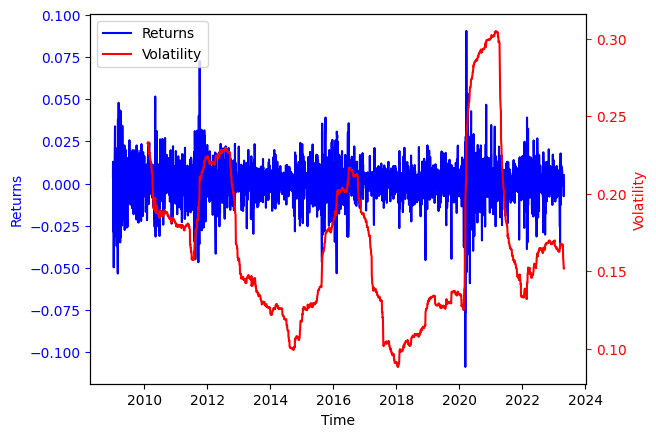

In [8]:
# Create a figure and axis
fig, ax1 = plt.subplots()
# Plot returns on the first y-axis (left)
ax1.plot(return_multiData['^FTSE'], color='b', label='Returns')
ax1.set_xlabel('Time')
ax1.set_ylabel('Returns', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis (right) for plotting volatility
ax2 = ax1.twinx()
ax2.plot(ann_vol_portfolio['^FTSE'], color='r', label='Volatility')
ax2.set_ylabel('Volatility', color='r')
ax2.tick_params('y', colors='r')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')



In [9]:
# Sharpe_ratio
sharpe_ratio = return_multiData.mean()/ann_vol_portfolio
sharpe_ratio.tail()

^FTSE     ^GSPC      ^HSI     ^NSEI       GLD   GOLD.AX
DateTime                                                              
2023-04-21  0.001478  0.002264  0.000561  0.003981  0.001780  0.000194
2023-04-24  0.001499  0.002264  0.000561  0.003982  0.001780  0.000194
2023-04-26  0.001537  0.002258  0.000563  0.004000  0.001789  0.000193
2023-04-27  0.001537  0.002267  0.000567  0.004045  0.001796  0.000194
2023-04-28  0.001536  0.002267  0.000567  0.004047  0.001822  0.000195

In [10]:
# Cumulative Returns
cumprod_daily_return = (1 + return_multiData).cumprod()
cumprod_daily_return.head()

^FTSE     ^GSPC      ^HSI     ^NSEI       GLD   GOLD.AX
DateTime                                                              
2009-01-05  1.003902  0.995332  1.034601  1.024518  0.979705  0.970321
2009-01-06  1.016901  1.003112  1.031025  1.021679  0.987243  0.950696
2009-01-07  0.988097  0.973009  0.996321  0.958530  0.959643  0.946352
2009-01-09  0.975163  0.955516  0.955768  0.942972  0.973211  0.961956
2009-01-12  0.970275  0.933956  0.928749  0.910183  0.936565  0.973458

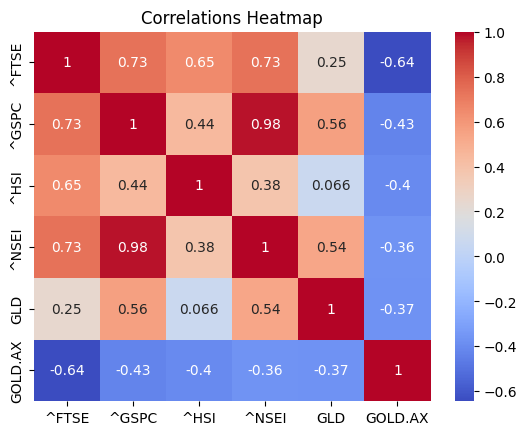

In [11]:
# heatmap of equity
sns.heatmap(multiData.corr(), cmap = 'coolwarm', annot = True)
plt.title('Correlations Heatmap')
plt.show()

Text(0.5, 1.0, 'Indices sharpe_ratio')

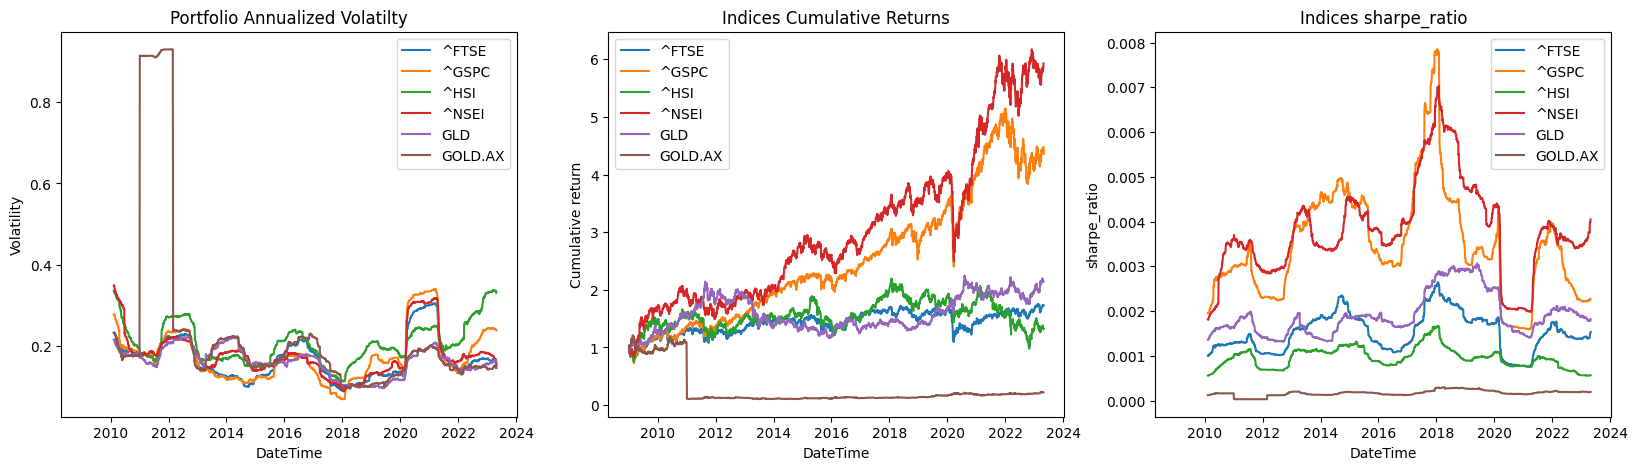

In [12]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,5))

sns.lineplot(data=ann_vol_portfolio, dashes=False, ax=axes[0])
axes[0].set_ylabel('Volatility')
axes[0].set_title('Portfolio Annualized Volatilty')


sns.lineplot(data=cumprod_daily_return, dashes=False, ax=axes[1])
axes[1].set_ylabel('Cumulative return')
axes[1].set_title('Indices Cumulative Returns')

sns.lineplot(data=sharpe_ratio, dashes=False, ax=axes[2])
axes[2].set_ylabel('sharpe_ratio')
axes[2].set_title('Indices sharpe_ratio')



#### Testing volatility Scenarios
We have converted historical volatility for simpler comprehension and binning for impletmentation of rules.

In [13]:
ann_vol_portfolio= (ann_vol_portfolio * 100).round()
ann_vol_portfolio.head()

^FTSE  ^GSPC  ^HSI  ^NSEI   GLD  GOLD.AX
DateTime                                            
2010-02-10   23.0   28.0  34.0   35.0  22.0     23.0
2010-02-11   23.0   28.0  33.0   35.0  21.0     23.0
2010-02-17   23.0   28.0  33.0   35.0  22.0     23.0
2010-02-18   23.0   28.0  33.0   34.0  21.0     23.0
2010-02-19   23.0   28.0  33.0   34.0  21.0     23.0

In [14]:
vol_bins = [0, 10, 20, 30, 40, 50, 60]
vol_labels = ['0-9','10-19','20-29','30-39','40-49','50-59']
ann_vol_portfolio_2=pd.DataFrame()
ann_vol_portfolio_2['ftse_group'] = pd.cut(ann_vol_portfolio['^FTSE'], bins=vol_bins, labels=vol_labels, right=False)
ann_vol_portfolio_2['gspc_group'] = pd.cut(ann_vol_portfolio['^GSPC'], bins=vol_bins, labels=vol_labels, right=False)
ann_vol_portfolio_2['hsi_group'] = pd.cut(ann_vol_portfolio['^HSI'], bins=vol_bins, labels=vol_labels, right=False)
ann_vol_portfolio_2['nsei_group'] = pd.cut(ann_vol_portfolio['^NSEI'], bins=vol_bins, labels=vol_labels, right=False)
ann_vol_portfolio_2['gld_group'] = pd.cut(ann_vol_portfolio['GLD'], bins=vol_bins, labels=vol_labels, right=False)
ann_vol_portfolio_2['gold.ax_group'] = pd.cut(ann_vol_portfolio['GOLD.AX'], bins=vol_bins, labels=vol_labels, right=False)
ann_vol_portfolio_2.tail()

ftse_group gspc_group hsi_group nsei_group gld_group gold.ax_group
DateTime                                                                     
2023-04-21      10-19      20-29     30-39      10-19     10-19         10-19
2023-04-24      10-19      20-29     30-39      10-19     10-19         10-19
2023-04-26      10-19      20-29     30-39      10-19     10-19         10-19
2023-04-27      10-19      20-29     30-39      10-19     10-19         10-19
2023-04-28      10-19      20-29     30-39      10-19     10-19         10-19

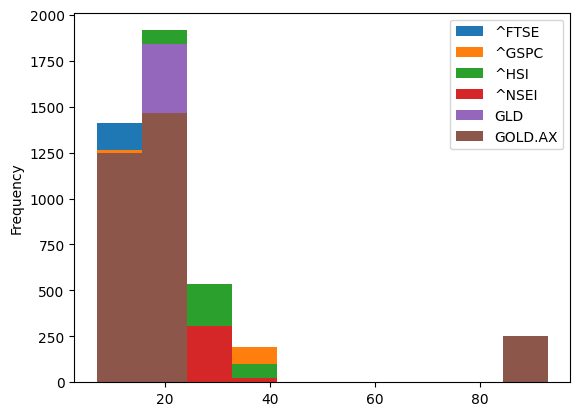

In [15]:
# Histogram of equity
ann_vol_portfolio.plot.hist(bins=10);

We have taken five scenarios where we define different volatility levels based on variance of historical volatility dataframe and check for condition where succesive days volatility has breached previous days volatilty by a particular margin.

Since these values are arbitrary, investors are free to define their volatility levels for switching.


In [16]:
# Count
count_df_1 = ((ann_vol_portfolio < 15) & (ann_vol_portfolio.diff() <10)).sum()
count_df_2 = (((20 > ann_vol_portfolio) & (ann_vol_portfolio >= 15)) | ((20 > ann_vol_portfolio.diff()) & (ann_vol_portfolio.diff() > 15))).sum()
count_df_3 = (((25 > ann_vol_portfolio) & (ann_vol_portfolio >= 20)) | ((30 > ann_vol_portfolio.diff()) & (ann_vol_portfolio.diff() > 20))).sum()
count_df_4 = (((27 > ann_vol_portfolio) & (ann_vol_portfolio >= 25)) | ((15 > ann_vol_portfolio.diff()) & (ann_vol_portfolio.diff() > 10))).sum()
count_df_5 = ((ann_vol_portfolio  >=  27) | (ann_vol_portfolio.diff() > 25)).sum()

The exihibit below shows number of times volatility has breached the above condtions in the given investment horizon.

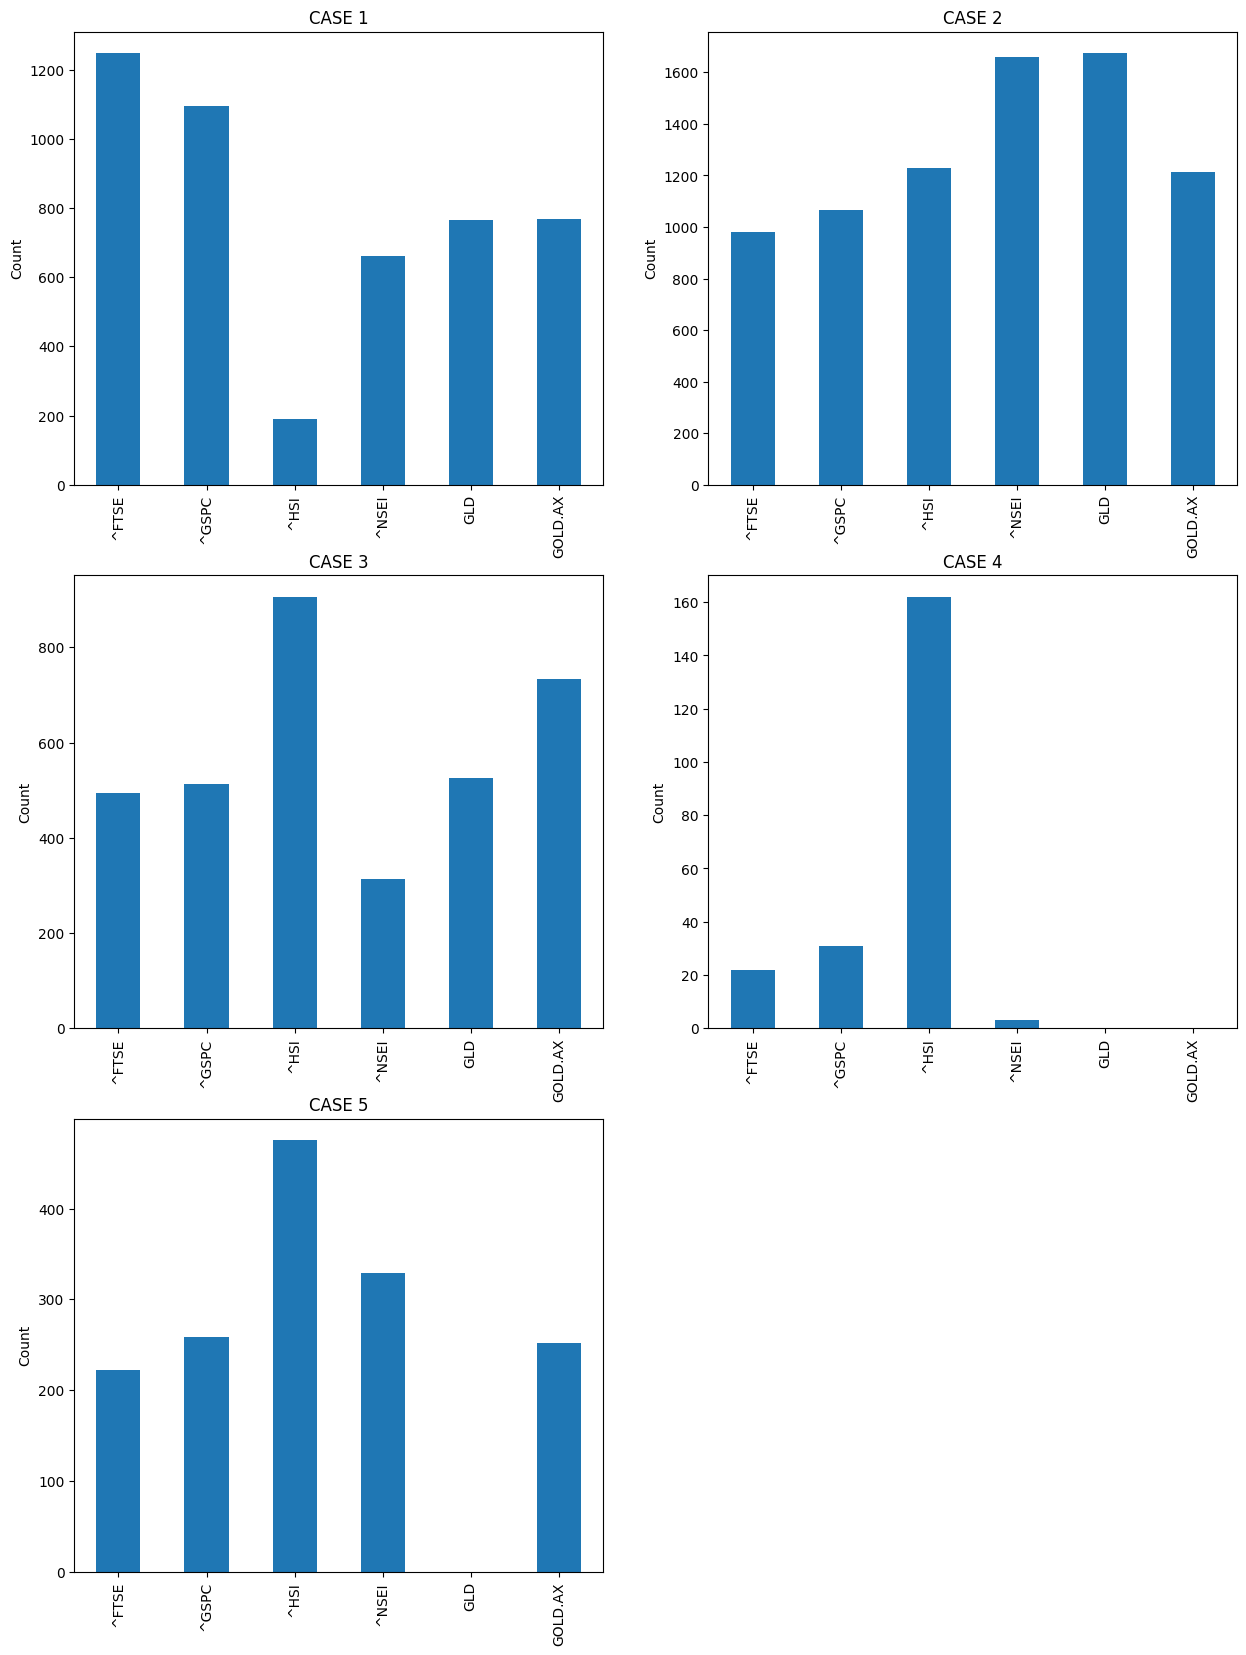

In [17]:
plt.figure(figsize=(15, 20))
plt.subplot(3,2,1)
count_df_1.plot.bar()
plt.ylabel('Count')
plt.title('CASE 1')

plt.subplot(3,2,2)
count_df_2.plot.bar()
plt.ylabel('Count')
plt.title('CASE 2')

plt.subplot(3,2,3)
count_df_3.plot.bar()
plt.ylabel('Count')
plt.title('CASE 3')

plt.subplot(3,2,4)
count_df_4.plot.bar()
plt.ylabel('Count')
plt.title('CASE 4')

plt.subplot(3,2,5)
count_df_5.plot.bar()
plt.ylabel('Count')
plt.title('CASE 5')

plt.show()

In [18]:
ann_vol_portfolio=ann_vol_portfolio.reset_index()
return_multiData=return_multiData.reset_index()

##  For ^FTSE

In [19]:
filtered_dates1 = ann_vol_portfolio[((ann_vol_portfolio['^FTSE'] < 15) & (ann_vol_portfolio['^FTSE'].diff() <10))]['DateTime']
filtered_dates4  = ann_vol_portfolio[(((27 > ann_vol_portfolio['^FTSE']) & (ann_vol_portfolio['^FTSE'] >= 25)) | ((15 > ann_vol_portfolio['^FTSE'].diff()) & (ann_vol_portfolio['^FTSE'].diff() > 10)))]['DateTime']
filtered_dates3  = ann_vol_portfolio[(((25 > ann_vol_portfolio['^FTSE']) & (ann_vol_portfolio['^FTSE'] >= 20)) | ((30 > ann_vol_portfolio['^FTSE'].diff()) & (ann_vol_portfolio['^FTSE'].diff() > 20)))]['DateTime']
filtered_dates2  = ann_vol_portfolio[(((20 > ann_vol_portfolio['^FTSE']) & (ann_vol_portfolio['^FTSE'] >= 15)) | ((20 > ann_vol_portfolio['^FTSE'].diff()) & (ann_vol_portfolio['^FTSE'].diff() > 15)))]['DateTime']
filtered_dates5  = ann_vol_portfolio[((ann_vol_portfolio['^FTSE']  >=  27) | (ann_vol_portfolio['^FTSE'].diff() >25))]['DateTime']

In [20]:
# Dates fullfilling the condition
def selected_returns_dataframe(filtered_dates):
  selected_returns = []
  for date in filtered_dates:
    return_value = return_multiData.loc[return_multiData['DateTime'] == date, '^FTSE'].values
    if len(return_value) > 0:
        selected_returns.append((date, return_value[0]))

  selected_return=pd.DataFrame(selected_returns)
  selected_return.set_axis(['Date', 'Portfolio_Return_ftse'], axis=1, inplace=True)
  return selected_return

In [21]:
def filtered_return_dataframe(selected_return_df):
  filtered_return_df = return_multiData[~return_multiData['DateTime'].isin(selected_return_df['Date'])]
  filtered_return_df1=pd.DataFrame()
  filtered_return_df1=filtered_return_df[['DateTime','^FTSE']]
  return filtered_return_df1

#### CASE 1

In [22]:
case1_ftse=selected_returns_dataframe(filtered_dates1)
case1_ftse.head()

Date  Portfolio_Return_ftse
0 2013-02-22               0.007025
1 2013-02-25               0.003109
2 2013-03-01               0.002798
3 2013-03-04              -0.005174
4 2013-03-06              -0.000684

In [23]:
# Comparing filtered dates with the main return dataframes dates and extract date and return from return dataframe which is not fulfilling condition
filt_case1_ftse= filtered_return_dataframe(case1_ftse)
filt_case1_ftse.head()

DateTime     ^FTSE
0 2009-01-05  0.003902
1 2009-01-06  0.012949
2 2009-01-07 -0.028326
3 2009-01-09 -0.013089
4 2009-01-12 -0.005013

In [24]:
# cumulative product of return which is not satisfied the condition 1
filt_case1_ftse=filt_case1_ftse.set_index('DateTime')
filt_case1_ftse_cumpro=(1+filt_case1_ftse).cumprod()
filt_case1_ftse_cumpro.head()

^FTSE
DateTime            
2009-01-05  1.003902
2009-01-06  1.016901
2009-01-07  0.988097
2009-01-09  0.975163
2009-01-12  0.970275

<Axes: ylabel='Frequency'>

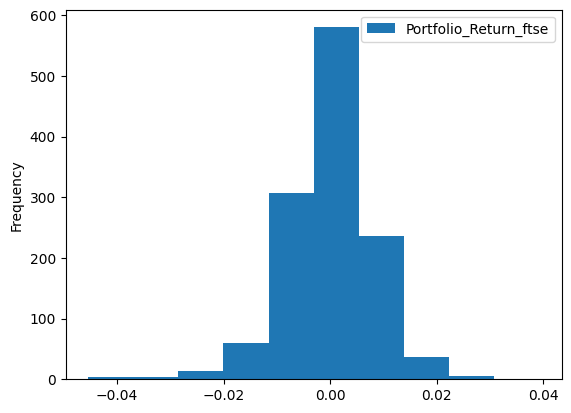

In [25]:
case1_ftse.plot.hist()

In [26]:
selected_return1_ftse=case1_ftse.set_index('Date')


In [27]:
def price_parameters(df_ser):
    return round(df_ser.mean(),2),round(df_ser.std(),2),round(df_ser.skew(),2),round(df_ser.kurtosis(),2)

#Plot distribution of series
def plot_dist(df):
    figure, axis = plt.subplots(1, 2)
    figure.set_figheight(10)
    figure.set_figwidth(20)
    mean,std,skew,kurt=price_parameters(df['Portfolio_Return_ftse']*100)
    sns.lineplot(data=df['Portfolio_Return_ftse']*100,ax=axis[0])
    axis[0].axhline(mean,color='r',ls='--')
    axis[0].set_title('Daily return chart(%), Total Returns:'+str(round(np.product(1+df['Portfolio_Return_ftse'])-1,2)*100)+'% Std-dev:'+str(std)+'%')
    sns.distplot(df['Portfolio_Return_ftse']*100,bins=50,ax=axis[1])
    x_axis=np.arange(min(df['Portfolio_Return_ftse']*100),max(df['Portfolio_Return_ftse']*100),0.0001)
    axis[1].axvline(mean,color='r',ls='--')
    axis[1].axvline(norm.ppf(0.05, loc=mean, scale=std),ls='--',color='r')
    axis[1].axvline(norm.ppf(0.95, loc=mean, scale=std),ls='--',color='r')
    axis[1].plot(x_axis,norm.pdf(x_axis, loc=mean, scale=std),ls='--',color='r')
    axis[1].set_title('Returns distribution, Mean:'+str(mean)+' std-dev:'+str(std)+' Skew:'+str(skew)+' Kurtosis:'+str(kurt))

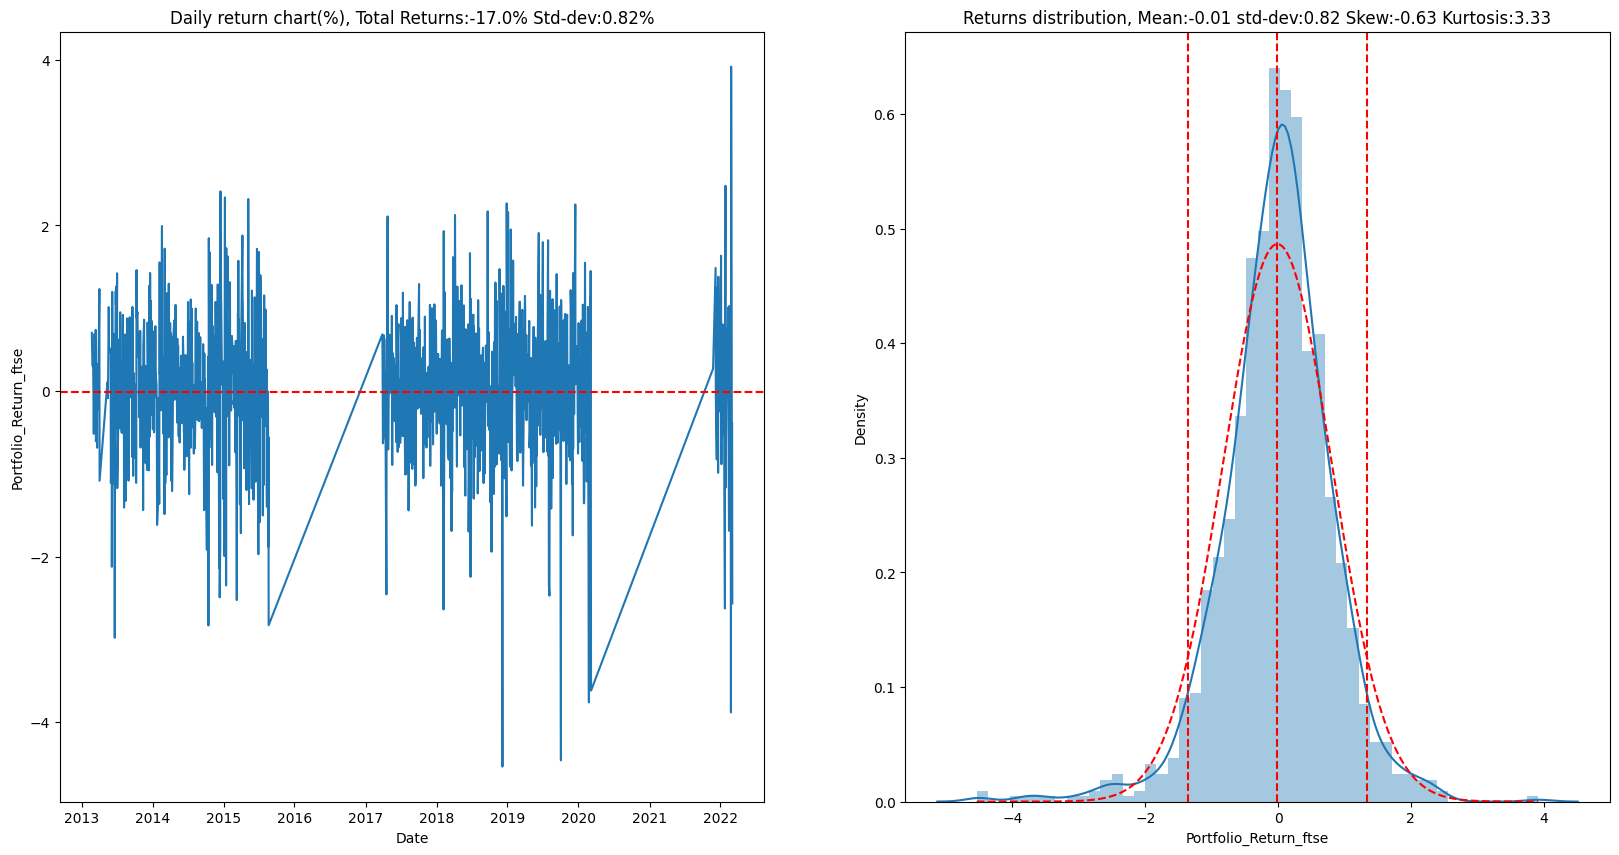

In [28]:
plot_dist(selected_return1_ftse)

#### *CASE* 2

In [29]:
case2_ftse= selected_returns_dataframe(filtered_dates2)
case2_ftse.head()

Date  Portfolio_Return_ftse
0 2010-04-20               0.009742
1 2010-04-21              -0.010426
2 2010-04-22              -0.010151
3 2010-04-23               0.010308
4 2010-04-27              -0.021000

In [30]:
filt_case2_ftse= filtered_return_dataframe(case2_ftse)
filt_case2_ftse.head()

DateTime     ^FTSE
0 2009-01-05  0.003902
1 2009-01-06  0.012949
2 2009-01-07 -0.028326
3 2009-01-09 -0.013089
4 2009-01-12 -0.005013

In [31]:
# cumulative product of return which is not satisfied the condition 2
filt_case2_ftse=filt_case2_ftse.set_index('DateTime')
filt_case2_ftse_cumpro=(1+filt_case2_ftse).cumprod()
filt_case2_ftse_cumpro.head()

^FTSE
DateTime            
2009-01-05  1.003902
2009-01-06  1.016901
2009-01-07  0.988097
2009-01-09  0.975163
2009-01-12  0.970275

<Axes: ylabel='Frequency'>

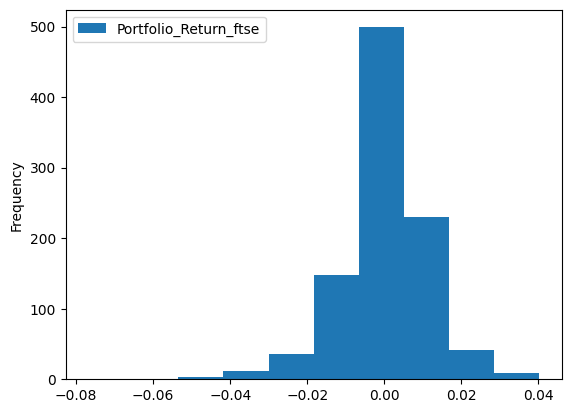

In [32]:
# Histogram of ftse
case2_ftse.plot.hist()

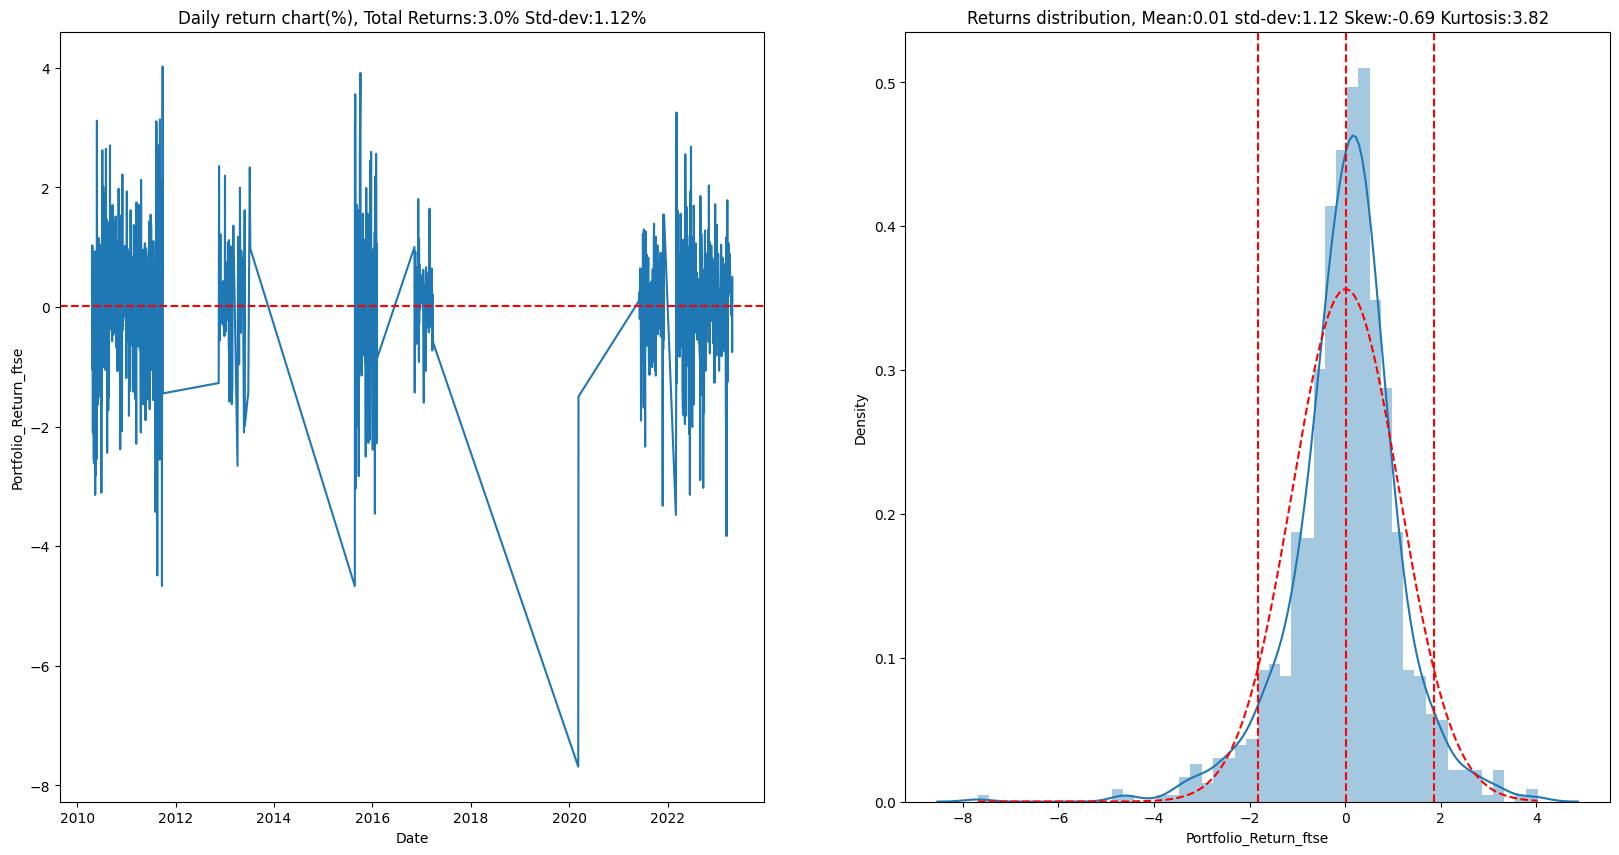

In [33]:
selected_return2_ftse=case2_ftse.set_index('Date')
plot_dist(selected_return2_ftse)

#### CASE 3

In [34]:
case3_ftse= selected_returns_dataframe(filtered_dates3)
case3_ftse.head()

Date  Portfolio_Return_ftse
0 2010-02-10               0.003952
1 2010-02-11               0.005748
2 2010-02-17               0.022300
3 2010-02-18               0.009192
4 2010-02-19               0.006216

In [35]:
filt_case3_ftse= filtered_return_dataframe(case3_ftse)
filt_case3_ftse.head()

DateTime     ^FTSE
0 2009-01-05  0.003902
1 2009-01-06  0.012949
2 2009-01-07 -0.028326
3 2009-01-09 -0.013089
4 2009-01-12 -0.005013

In [36]:
# cumulative product of return which is not satisfied the condition 3
filt_case3_ftse=filt_case3_ftse.set_index('DateTime')
filt_case3_ftse_cumpro=(1+filt_case3_ftse).cumprod()
filt_case3_ftse_cumpro.head()

^FTSE
DateTime            
2009-01-05  1.003902
2009-01-06  1.016901
2009-01-07  0.988097
2009-01-09  0.975163
2009-01-12  0.970275

<Axes: ylabel='Frequency'>

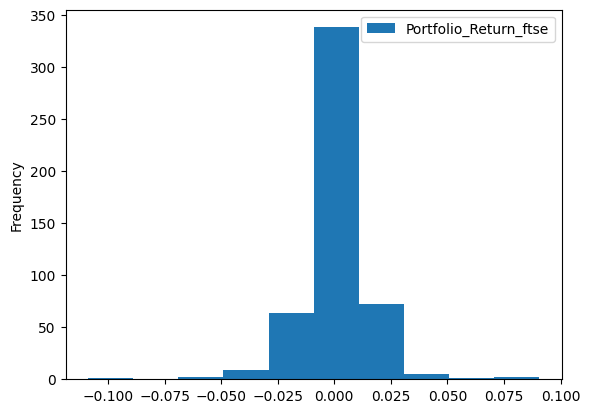

In [37]:
# Histogram of ftse
case3_ftse.plot.hist()

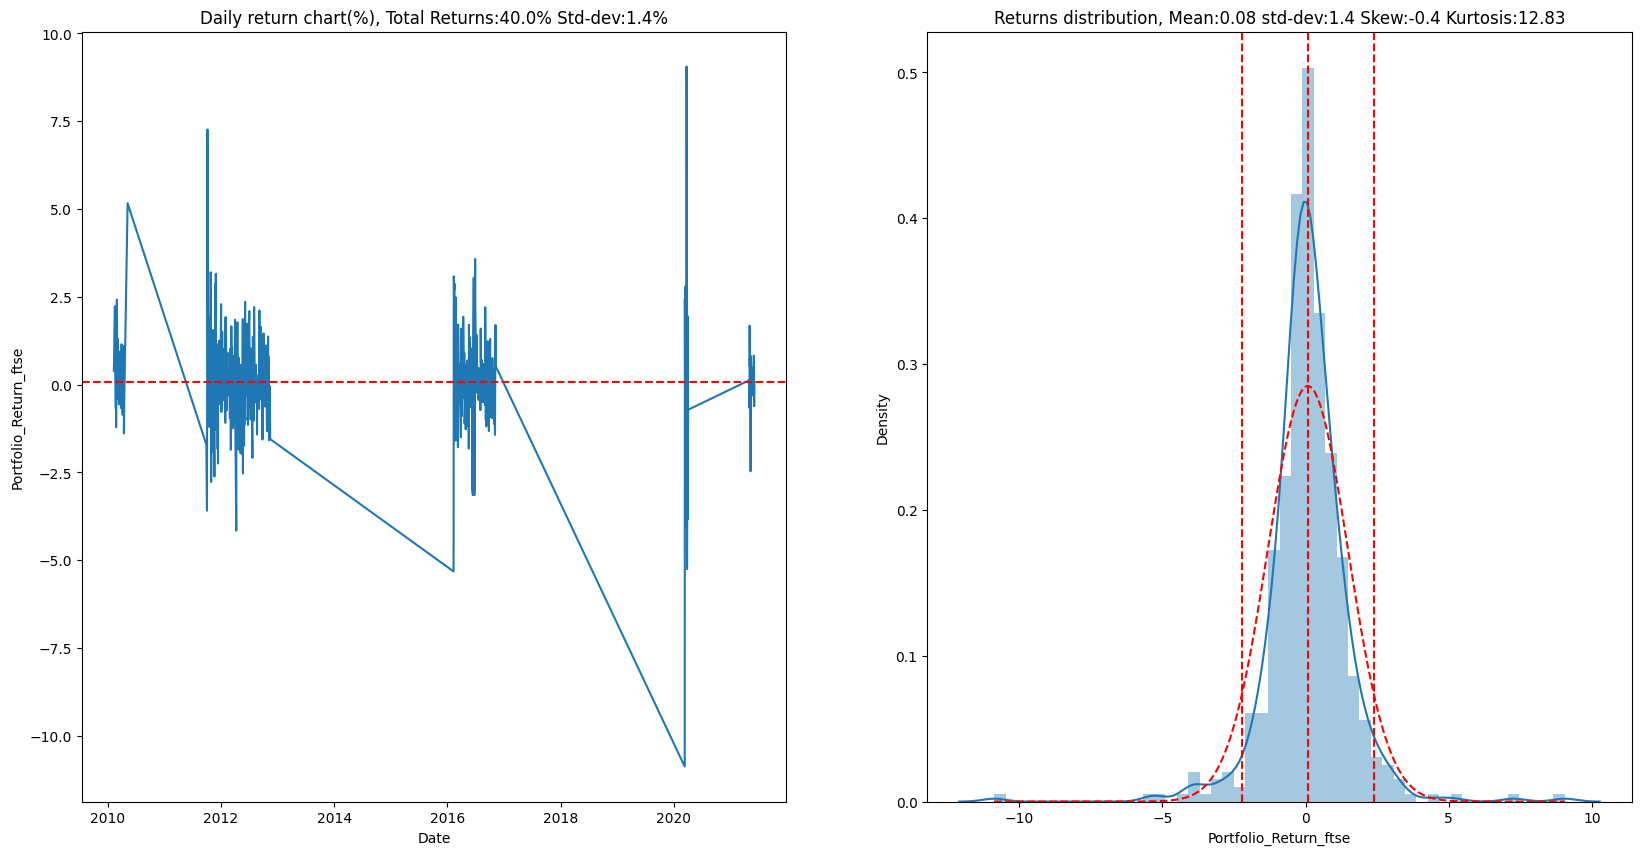

In [38]:
selected_return3_ftse=case3_ftse.set_index('Date')
plot_dist(selected_return3_ftse)

#### CASE 4

In [39]:
case4_ftse= selected_returns_dataframe(filtered_dates4)
case4_ftse.head()

Date  Portfolio_Return_ftse
0 2020-04-07               0.053365
1 2020-04-08              -0.004698
2 2020-04-09               0.029061
3 2020-04-15              -0.041933
4 2020-04-16               0.005484

In [40]:
filt_case4_ftse= filtered_return_dataframe(case4_ftse)
filt_case4_ftse.head()

DateTime     ^FTSE
0 2009-01-05  0.003902
1 2009-01-06  0.012949
2 2009-01-07 -0.028326
3 2009-01-09 -0.013089
4 2009-01-12 -0.005013

In [41]:
# cumulative product of return which is not satisfied the condition 4
filt_case4_ftse=filt_case4_ftse.set_index('DateTime')
filt_case4_ftse_cumpro=(1+filt_case4_ftse).cumprod()
filt_case4_ftse_cumpro.head()

^FTSE
DateTime            
2009-01-05  1.003902
2009-01-06  1.016901
2009-01-07  0.988097
2009-01-09  0.975163
2009-01-12  0.970275

<Axes: ylabel='Frequency'>

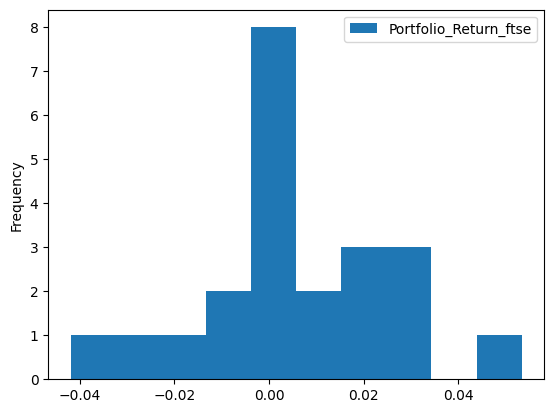

In [42]:
# Histogram of ftse
case4_ftse.plot.hist()

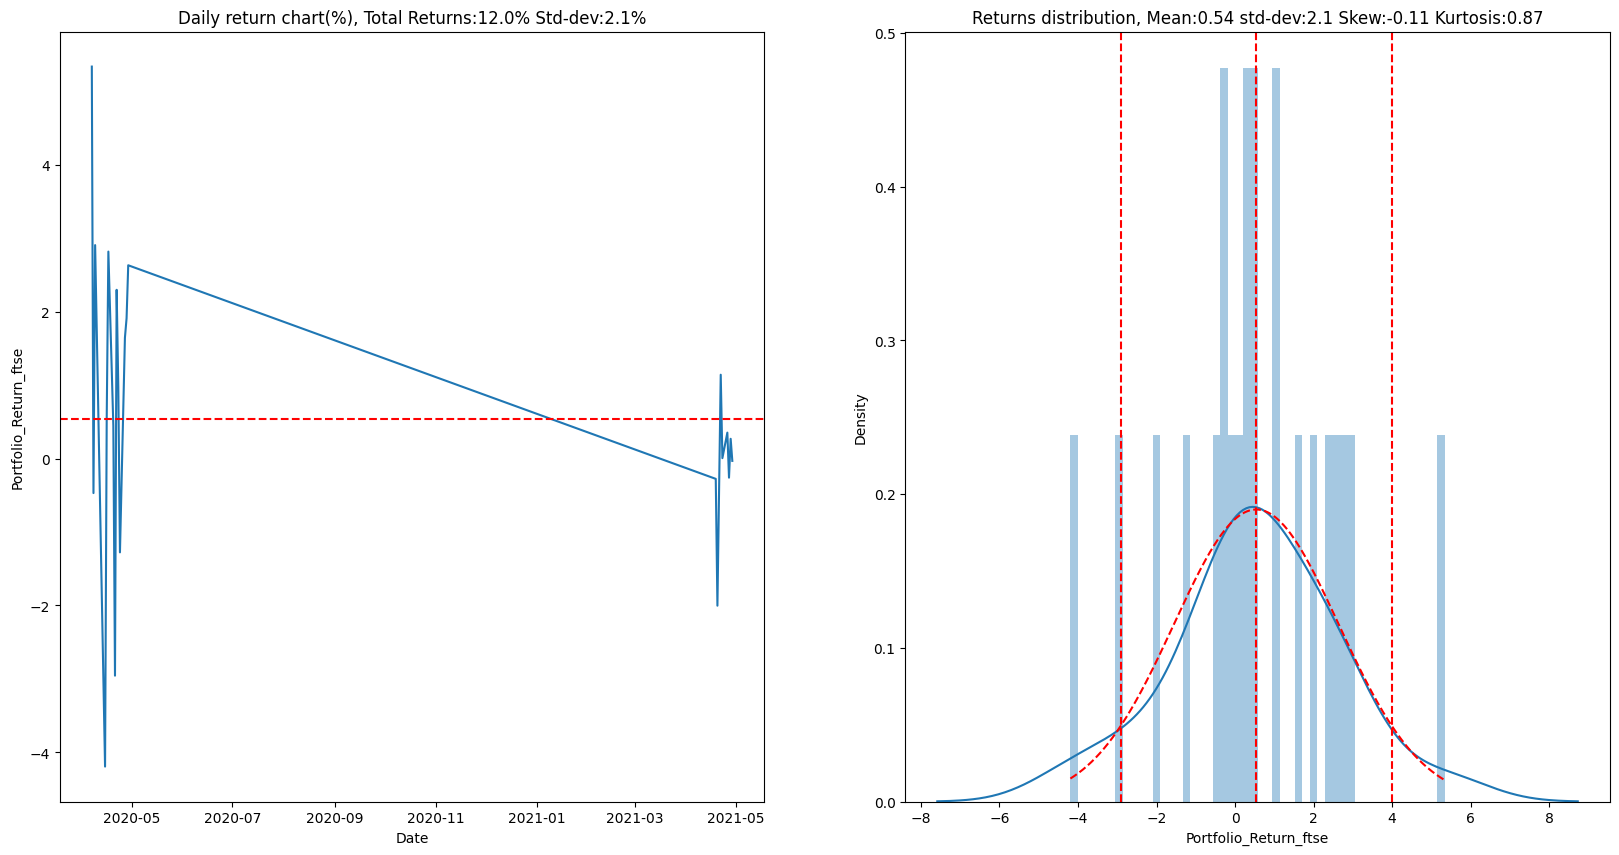

In [43]:
selected_return4_ftse=case4_ftse.set_index('Date')
plot_dist(selected_return4_ftse)

#### CASE 5

In [44]:
case5_ftse= selected_returns_dataframe(filtered_dates5)
case5_ftse.head()

Date  Portfolio_Return_ftse
0 2020-05-04              -0.059114
1 2020-05-05               0.016615
2 2020-05-06               0.000752
3 2020-05-07               0.014042
4 2020-05-11               0.000623

In [45]:
filt_case5_ftse= filtered_return_dataframe(case5_ftse)
filt_case5_ftse.head()

DateTime     ^FTSE
0 2009-01-05  0.003902
1 2009-01-06  0.012949
2 2009-01-07 -0.028326
3 2009-01-09 -0.013089
4 2009-01-12 -0.005013

In [46]:
# cumulative product of return which is not satisfied the condition 5
filt_case5_ftse=filt_case5_ftse.set_index('DateTime')
filt_case5_ftse_cumpro=(1+filt_case5_ftse).cumprod()
filt_case5_ftse_cumpro.head()

^FTSE
DateTime            
2009-01-05  1.003902
2009-01-06  1.016901
2009-01-07  0.988097
2009-01-09  0.975163
2009-01-12  0.970275

<Axes: ylabel='Frequency'>

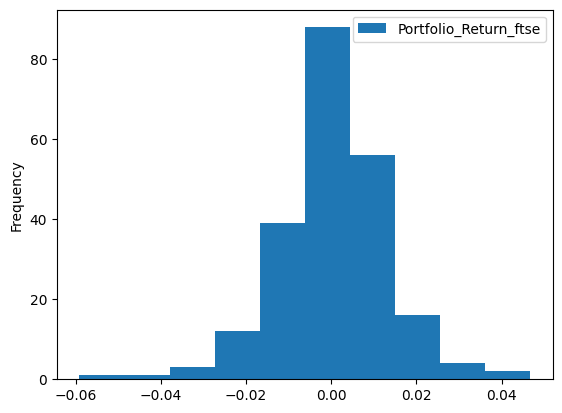

In [47]:
# Histogram of ftse
case5_ftse.plot.hist()

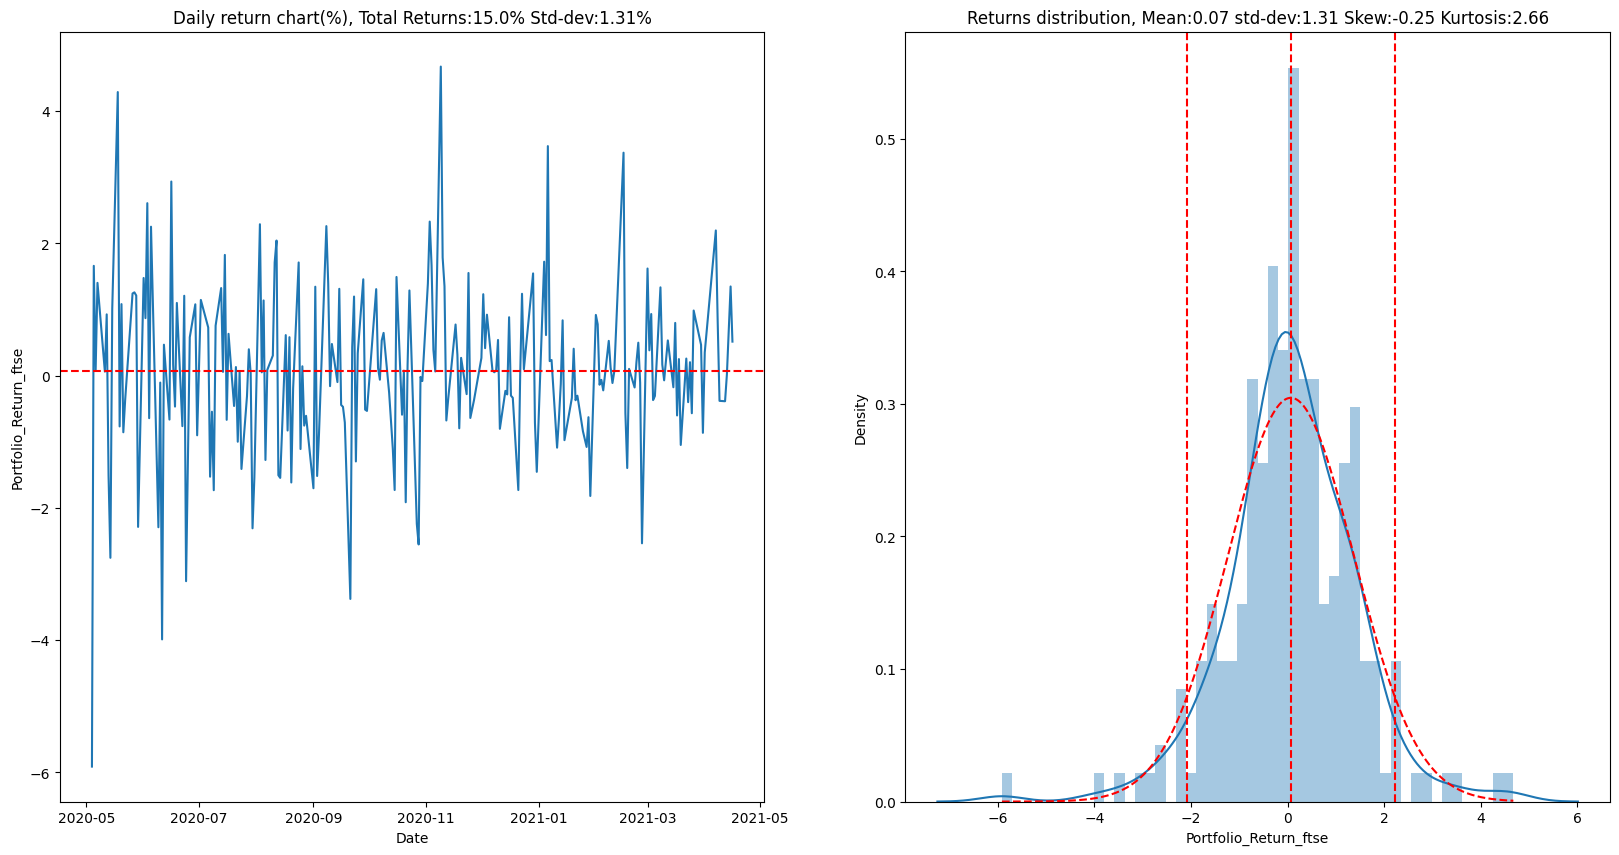

In [48]:
selected_return5_ftse=case5_ftse.set_index('Date')
plot_dist(selected_return5_ftse)

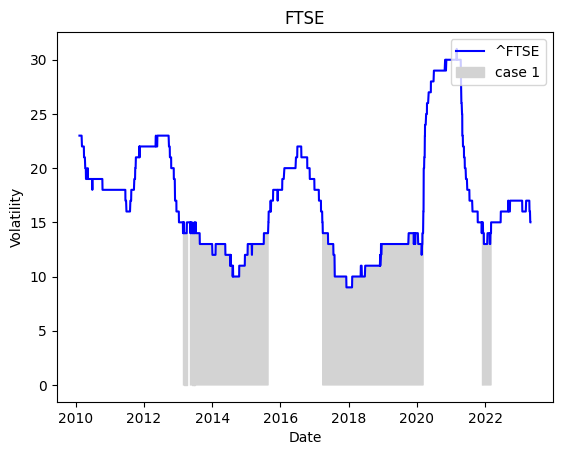

In [49]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^FTSE'], color='blue', label='^FTSE')


# Create a mask for the condition
mask1 = (ann_vol_portfolio['^FTSE'] < 15) & (ann_vol_portfolio['^FTSE'].diff() <10)

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^FTSE'], where=mask1, color='lightgray',label='case 1')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('FTSE')
ax.legend(loc='upper right')

# Show the plot
plt.show()

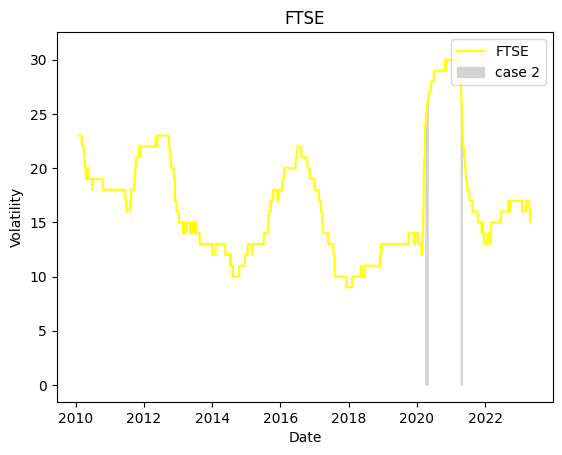

In [50]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^FTSE'], color='yellow', label='FTSE')


# Create a mask for the condition
mask2 = (((27 > ann_vol_portfolio['^FTSE']) & (ann_vol_portfolio['^FTSE'] >= 25)) | ((15 > ann_vol_portfolio['^FTSE'].diff()) & (ann_vol_portfolio['^FTSE'].diff() > 10)))

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^FTSE'], where=mask2, color='lightgray',label='case 2')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('FTSE')
ax.legend(loc='upper right')

# Show the plot
plt.show()

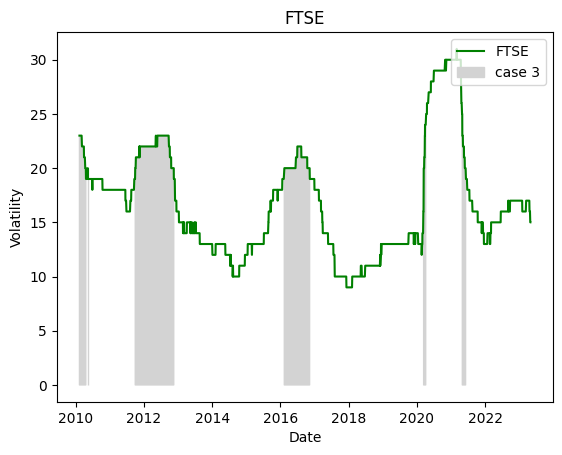

In [51]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^FTSE'], color='green', label='FTSE')


# Create a mask for the condition
mask3 = (((25 > ann_vol_portfolio['^FTSE']) & (ann_vol_portfolio['^FTSE'] >= 20)) | ((30 > ann_vol_portfolio['^FTSE'].diff()) & (ann_vol_portfolio['^FTSE'].diff() > 20)))

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^FTSE'], where=mask3, color='lightgray',label='case 3')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('FTSE')
ax.legend(loc='upper right')

# Show the plot
plt.show()

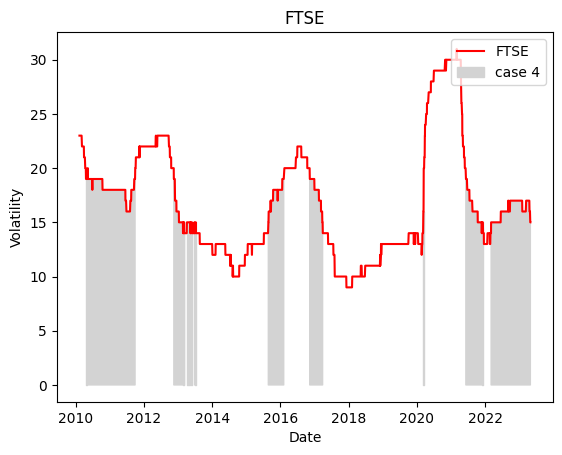

In [52]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^FTSE'], color='red', label='FTSE')


# Create a mask for the condition
mask4 = (((20 > ann_vol_portfolio['^FTSE']) & (ann_vol_portfolio['^FTSE'] >= 15)) | ((20 > ann_vol_portfolio['^FTSE'].diff()) & (ann_vol_portfolio['^FTSE'].diff() > 15)))

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^FTSE'], where=mask4, color='lightgray',label='case 4')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('FTSE')
ax.legend(loc='upper right')

# Show the plot
plt.show()

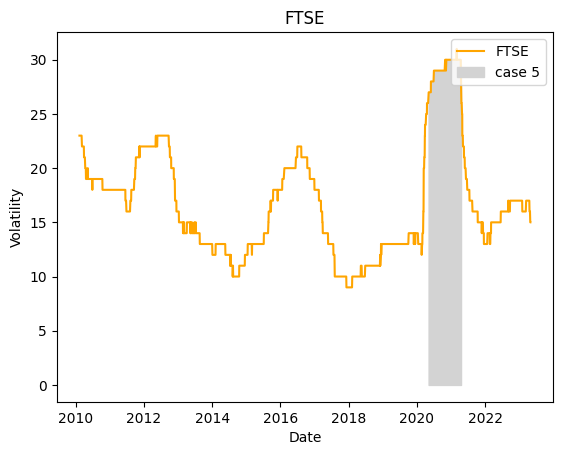

In [53]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^FTSE'], color='orange', label='FTSE')


# Create a mask for the condition
mask5 = (ann_vol_portfolio['^FTSE'] >= 27) | (ann_vol_portfolio['^FTSE'].diff() > 25)

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^FTSE'], where=mask5, color='lightgray',label='case 5')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('FTSE')
ax.legend(loc='upper right')

# Show the plot
plt.show()



## FOR ^GSPC

In [54]:
#Plot distribution of series
def plot_dist(df):
    figure, axis = plt.subplots(1, 2)
    figure.set_figheight(10)
    figure.set_figwidth(20)
    mean,std,skew,kurt=price_parameters(df['Portfolio_Return_gspc']*100)
    sns.lineplot(data=df['Portfolio_Return_gspc']*100,ax=axis[0])
    axis[0].axhline(mean,color='r',ls='--')
    axis[0].set_title('Daily return chart(%), Total Returns:'+str(round(np.product(1+df['Portfolio_Return_gspc'])-1,2)*100)+'% Std-dev:'+str(std)+'%')
    sns.distplot(df['Portfolio_Return_gspc']*100,bins=50,ax=axis[1])
    x_axis=np.arange(min(df['Portfolio_Return_gspc']*100),max(df['Portfolio_Return_gspc']*100),0.0001)
    axis[1].axvline(mean,color='r',ls='--')
    axis[1].axvline(norm.ppf(0.05, loc=mean, scale=std),ls='--',color='r')
    axis[1].axvline(norm.ppf(0.95, loc=mean, scale=std),ls='--',color='r')
    axis[1].plot(x_axis,norm.pdf(x_axis, loc=mean, scale=std),ls='--',color='r')
    axis[1].set_title('Returns distribution, Mean:'+str(mean)+' std-dev:'+str(std)+' Skew:'+str(skew)+' Kurtosis:'+str(kurt))

In [55]:
filtered_dates1 = ann_vol_portfolio[((ann_vol_portfolio['^GSPC'] < 15) & (ann_vol_portfolio['^GSPC'].diff() <10))]['DateTime']
filtered_dates4  = ann_vol_portfolio[(((27 > ann_vol_portfolio['^GSPC']) & (ann_vol_portfolio['^GSPC'] >= 25)) | ((15 > ann_vol_portfolio['^GSPC'].diff()) & (ann_vol_portfolio['^GSPC'].diff() > 10)))]['DateTime']
filtered_dates3  = ann_vol_portfolio[(((25 > ann_vol_portfolio['^GSPC']) & (ann_vol_portfolio['^GSPC'] >= 20)) | ((30 > ann_vol_portfolio['^GSPC'].diff()) & (ann_vol_portfolio['^GSPC'].diff() > 20)))]['DateTime']
filtered_dates2  = ann_vol_portfolio[(((20 > ann_vol_portfolio['^GSPC']) & (ann_vol_portfolio['^GSPC'] >= 15)) | ((20 > ann_vol_portfolio['^GSPC'].diff()) & (ann_vol_portfolio['^GSPC'].diff() > 15)))]['DateTime']
filtered_dates5  = ann_vol_portfolio[((ann_vol_portfolio['^GSPC']  >=  27) | (ann_vol_portfolio['^GSPC'].diff() >25))]['DateTime']

In [56]:
# Dates fullfilling the condition
def selected_returns_dataframe(filtered_dates):
  selected_returns = []
  for date in filtered_dates:
    return_value = return_multiData.loc[return_multiData['DateTime'] == date, '^GSPC'].values
    if len(return_value) > 0:
        selected_returns.append((date, return_value[0]))

  selected_return=pd.DataFrame(selected_returns)
  selected_return.set_axis(['Date', 'Portfolio_Return_gspc'], axis=1, inplace=True)
  return selected_return

In [57]:
def filtered_return_dataframe(selected_return_df):
  filtered_return_df = return_multiData[~return_multiData['DateTime'].isin(selected_return_df['Date'])]
  filtered_return_df1=pd.DataFrame()
  filtered_return_df1=filtered_return_df[['DateTime','^GSPC']]
  return filtered_return_df1

#### CASE 1

In [58]:
case1_gspc=selected_returns_dataframe(filtered_dates1)
case1_gspc.head()

Date  Portfolio_Return_gspc
0 2013-01-23               0.001507
1 2013-01-24               0.000007
2 2013-01-25               0.005445
3 2013-01-29               0.003247
4 2013-01-30              -0.003900

In [59]:
# Comparing filtered dates with the main return dataframes dates and extract date and return from return dataframe which is not fulfilling condition

filt_case1_gspc= filtered_return_dataframe(case1_gspc)
filt_case1_gspc.head()

DateTime     ^GSPC
0 2009-01-05 -0.004668
1 2009-01-06  0.007817
2 2009-01-07 -0.030010
3 2009-01-09 -0.017978
4 2009-01-12 -0.022564

In [60]:
# cumulative product of return which is not satisfied the condition 1
filt_case1_gspc=filt_case1_gspc.set_index('DateTime')
filt_case1_gspc_cumpro=(1+filt_case1_gspc).cumprod()
filt_case1_gspc_cumpro.head()

^GSPC
DateTime            
2009-01-05  0.995332
2009-01-06  1.003112
2009-01-07  0.973009
2009-01-09  0.955516
2009-01-12  0.933956

<Axes: ylabel='Frequency'>

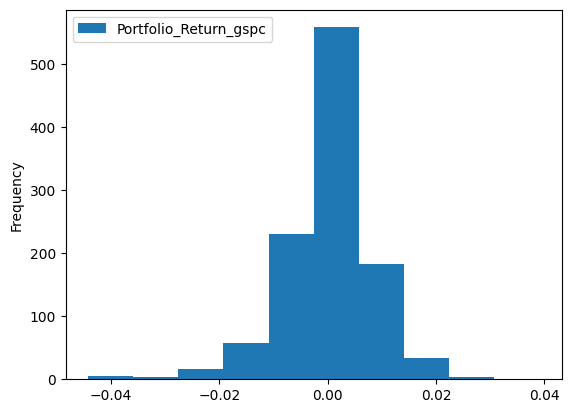

In [61]:
case1_gspc.plot.hist()

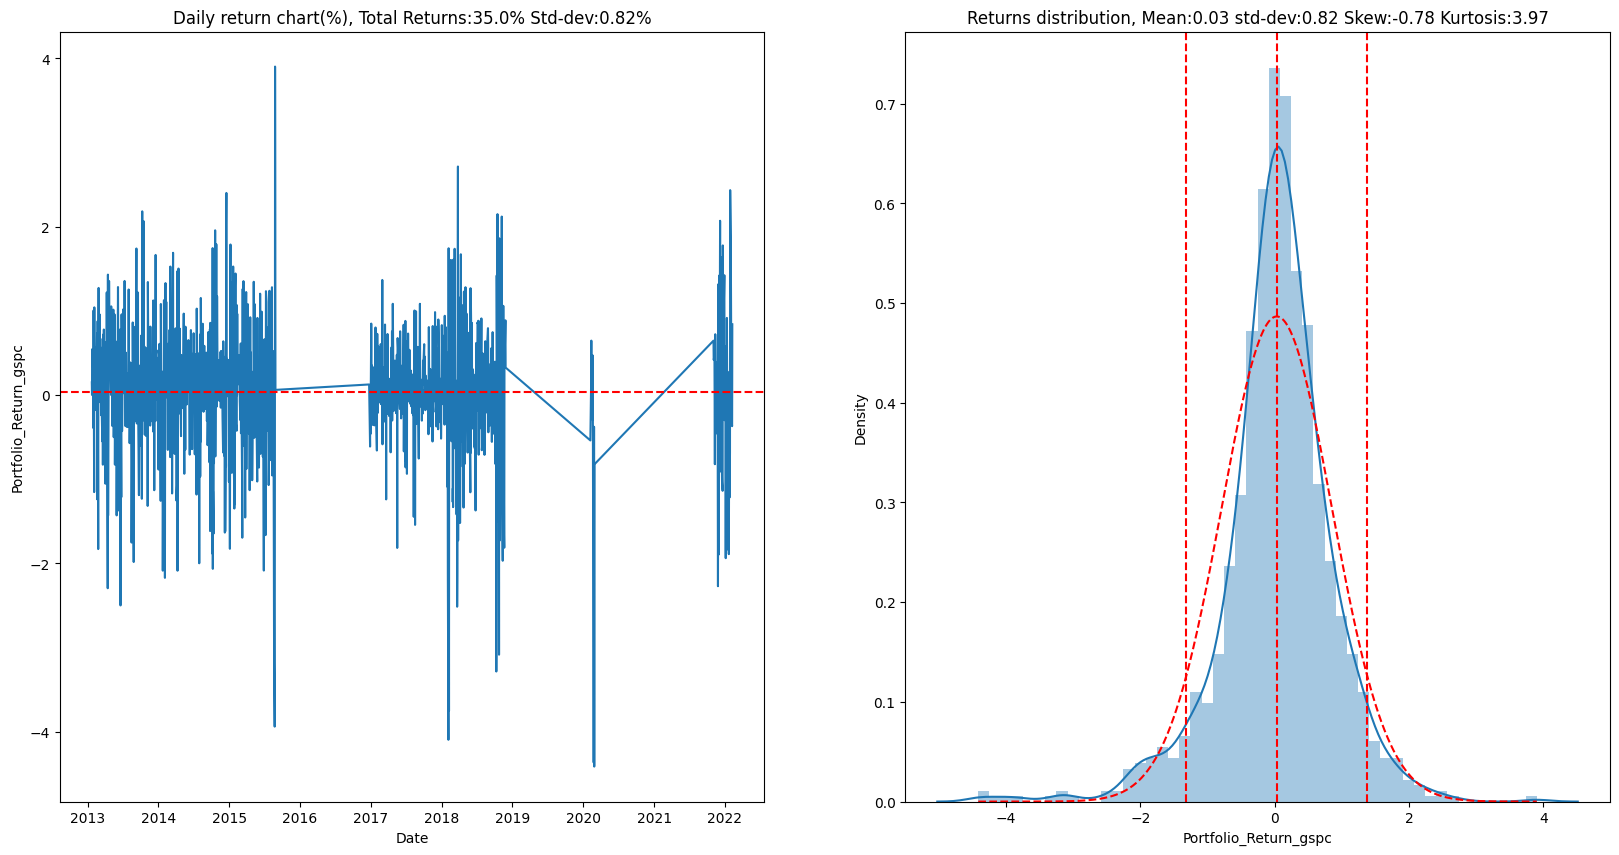

In [62]:
selected_return1_gspc=case1_gspc.set_index('Date')
plot_dist(selected_return1_gspc)

#### *CASE* 2

In [63]:
case2_gspc= selected_returns_dataframe(filtered_dates2)
case2_gspc.head()

Date  Portfolio_Return_gspc
0 2010-06-23              -0.002985
1 2010-06-28              -0.002034
2 2010-07-02              -0.007888
3 2010-07-06               0.005359
4 2010-07-07               0.031331

In [64]:
filt_case2_gspc= filtered_return_dataframe(case2_gspc)
filt_case2_gspc.head()

DateTime     ^GSPC
0 2009-01-05 -0.004668
1 2009-01-06  0.007817
2 2009-01-07 -0.030010
3 2009-01-09 -0.017978
4 2009-01-12 -0.022564

In [65]:
# cumulative product of return which is not satisfied the condition 2
filt_case2_gspc=filt_case2_gspc.set_index('DateTime')
filt_case2_gspc_cumpro=(1+filt_case2_gspc).cumprod()
filt_case2_gspc_cumpro.head()

^GSPC
DateTime            
2009-01-05  0.995332
2009-01-06  1.003112
2009-01-07  0.973009
2009-01-09  0.955516
2009-01-12  0.933956

<Axes: ylabel='Frequency'>

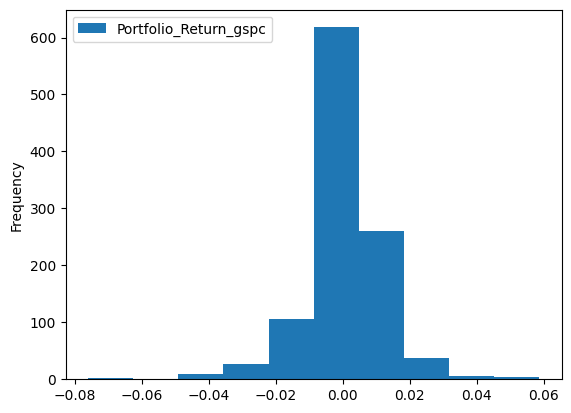

In [66]:
# Histogram of gspc
case2_gspc.plot.hist()

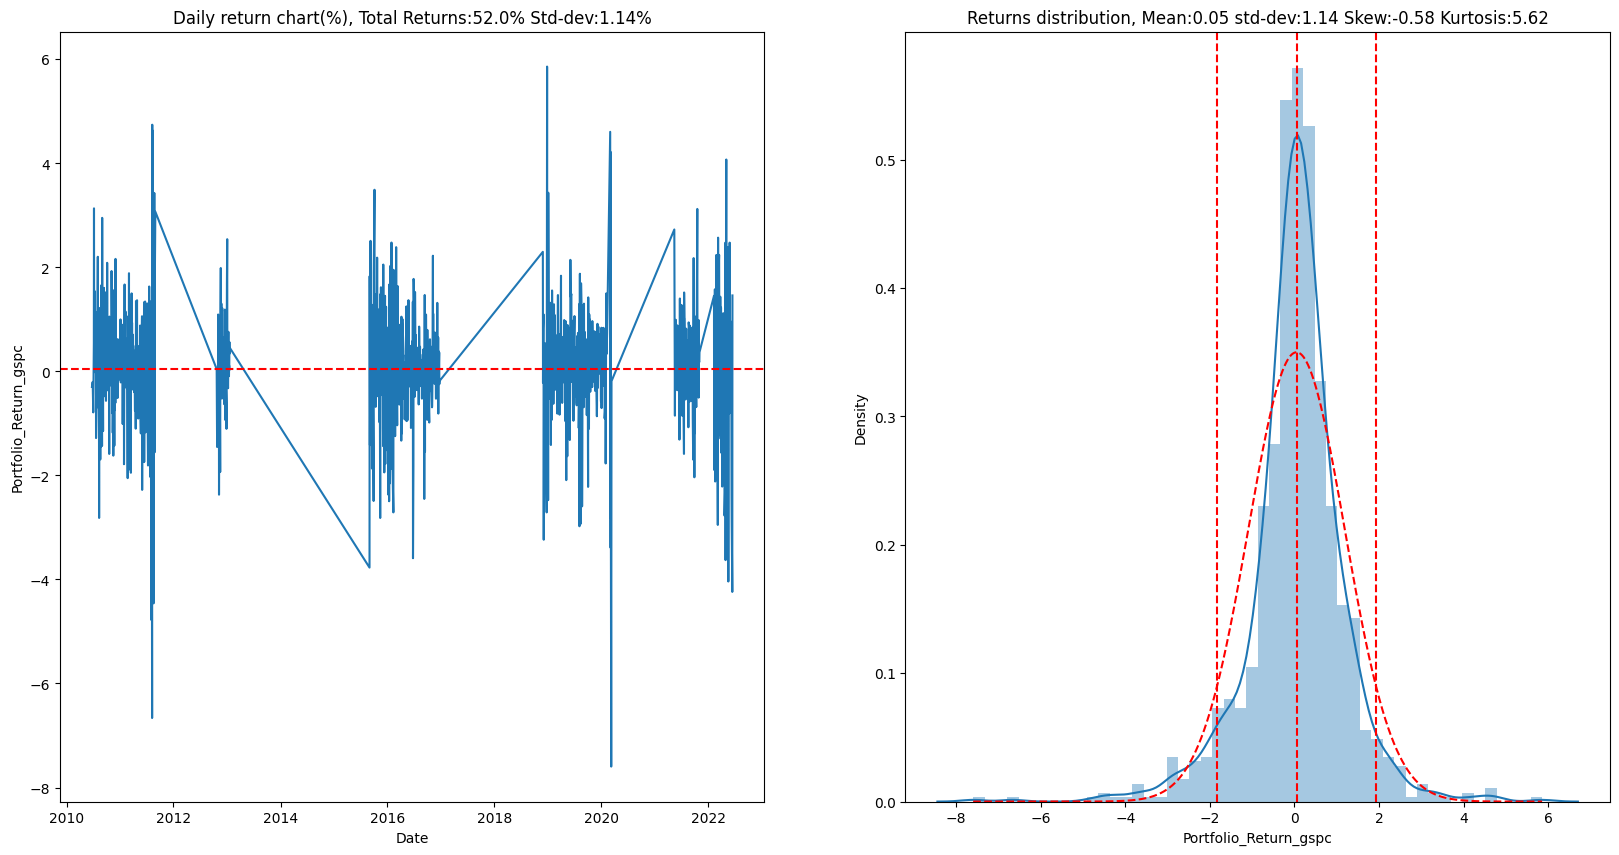

In [67]:
selected_return2_gspc=case2_gspc.set_index('Date')
plot_dist(selected_return2_gspc)

#### CASE 3

In [68]:
case3_gspc= selected_returns_dataframe(filtered_dates3)
case3_gspc.head()

Date  Portfolio_Return_gspc
0 2010-04-09               0.006684
1 2010-04-12               0.001767
2 2010-04-13               0.000685
3 2010-04-15               0.012002
4 2010-04-16              -0.016127

In [69]:
filt_case3_gspc= filtered_return_dataframe(case3_gspc)
filt_case3_gspc.head()

DateTime     ^GSPC
0 2009-01-05 -0.004668
1 2009-01-06  0.007817
2 2009-01-07 -0.030010
3 2009-01-09 -0.017978
4 2009-01-12 -0.022564

In [70]:
# cumulative product of return which is not satisfied the condition 3
filt_case3_gspc=filt_case3_gspc.set_index('DateTime')
filt_case3_gspc_cumpro=(1+filt_case3_gspc).cumprod()
filt_case3_gspc_cumpro.head()

^GSPC
DateTime            
2009-01-05  0.995332
2009-01-06  1.003112
2009-01-07  0.973009
2009-01-09  0.955516
2009-01-12  0.933956

<Axes: ylabel='Frequency'>

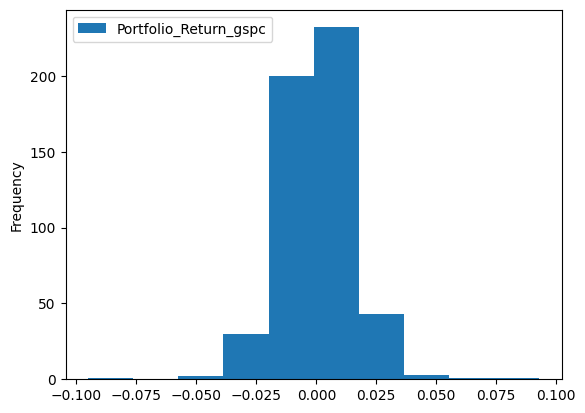

In [71]:
# Histogram of gspc
case3_gspc.plot.hist()

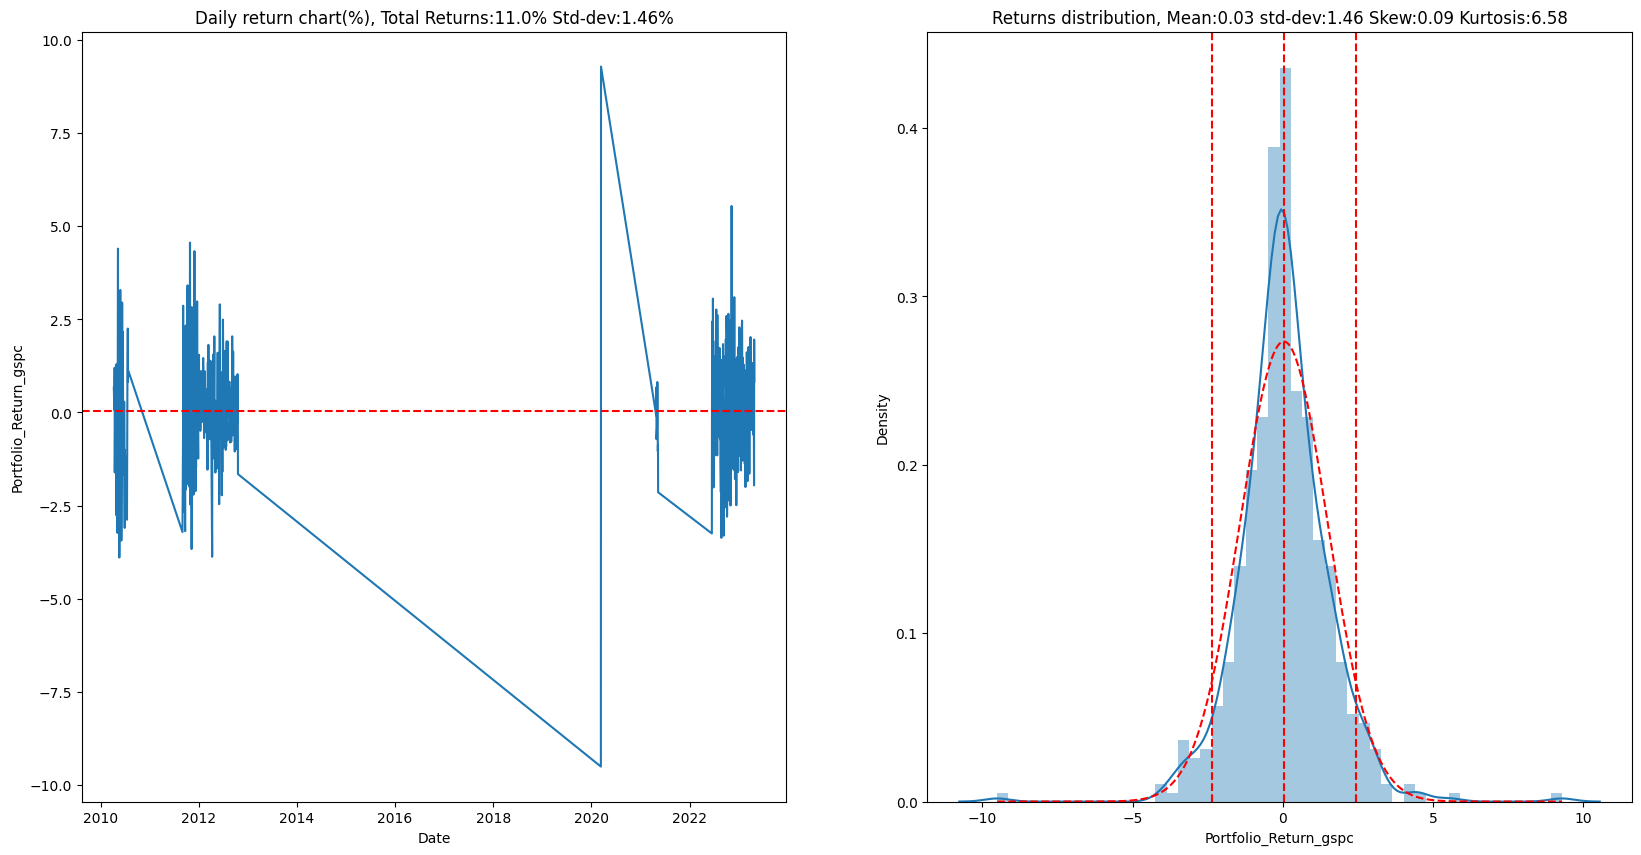

In [72]:
selected_return3_gspc=case3_gspc.set_index('Date')
plot_dist(selected_return3_gspc)

#### CASE 4

In [73]:
case4_gspc= selected_returns_dataframe(filtered_dates4)
case4_gspc.head()

Date  Portfolio_Return_gspc
0 2010-03-03               0.000429
1 2010-03-04               0.003736
2 2010-03-05               0.014007
3 2010-03-08              -0.000176
4 2010-03-09               0.001713

In [74]:
filt_case4_gspc= filtered_return_dataframe(case4_gspc)
filt_case4_gspc.head()

DateTime     ^GSPC
0 2009-01-05 -0.004668
1 2009-01-06  0.007817
2 2009-01-07 -0.030010
3 2009-01-09 -0.017978
4 2009-01-12 -0.022564

In [75]:
# cumulative product of return which is not satisfied the condition 4
filt_case4_gspc=filt_case4_gspc.set_index('DateTime')
filt_case4_gspc_cumpro=(1+filt_case4_gspc).cumprod()
filt_case4_gspc_cumpro.head()

^GSPC
DateTime            
2009-01-05  0.995332
2009-01-06  1.003112
2009-01-07  0.973009
2009-01-09  0.955516
2009-01-12  0.933956

<Axes: ylabel='Frequency'>

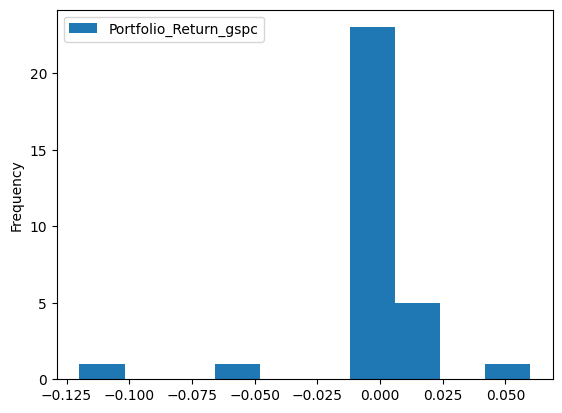

In [76]:
# Histogram of gspc
case4_gspc.plot.hist()

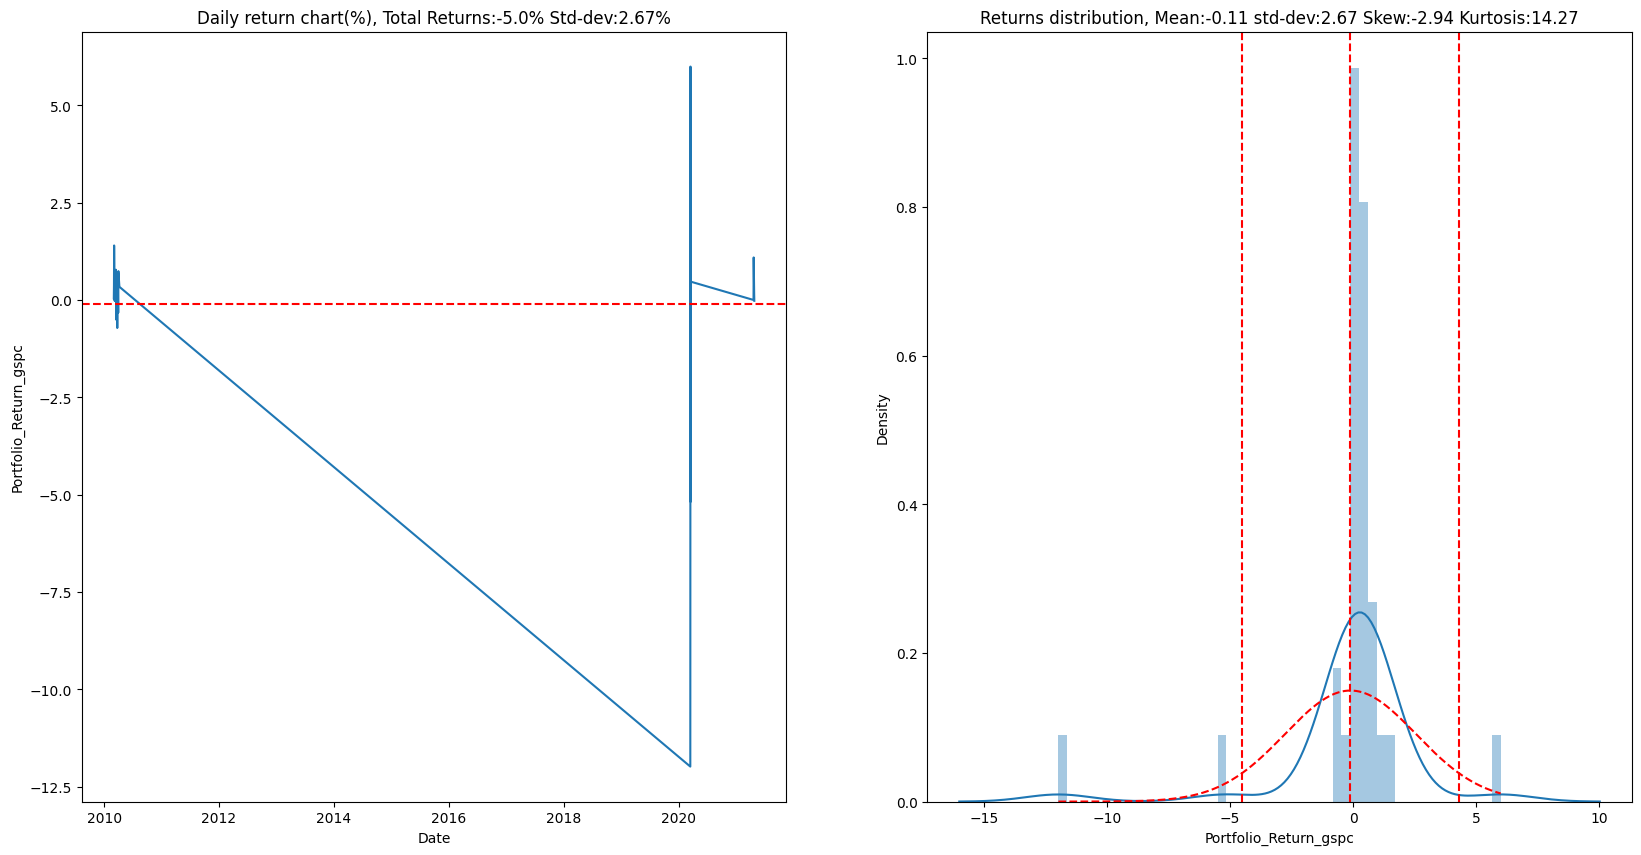

In [77]:
selected_return4_gspc=case4_gspc.set_index('Date')
plot_dist(selected_return4_gspc)

#### CASE 5

In [78]:
case5_gspc= selected_returns_dataframe(filtered_dates5)
case5_gspc.head()

Date  Portfolio_Return_gspc
0 2010-02-10              -0.002233
1 2010-02-11               0.009680
2 2010-02-17               0.019509
3 2010-02-18               0.006585
4 2010-02-19               0.002187

In [79]:
filt_case5_gspc= filtered_return_dataframe(case5_gspc)
filt_case5_gspc.head()

DateTime     ^GSPC
0 2009-01-05 -0.004668
1 2009-01-06  0.007817
2 2009-01-07 -0.030010
3 2009-01-09 -0.017978
4 2009-01-12 -0.022564

In [80]:
# cumulative product of return which is not satisfied the condition 5
filt_case5_gspc=filt_case5_gspc.set_index('DateTime')
filt_case5_gspc_cumpro=(1+filt_case5_gspc).cumprod()
filt_case5_gspc_cumpro.head()

^GSPC
DateTime            
2009-01-05  0.995332
2009-01-06  1.003112
2009-01-07  0.973009
2009-01-09  0.955516
2009-01-12  0.933956

<Axes: ylabel='Frequency'>

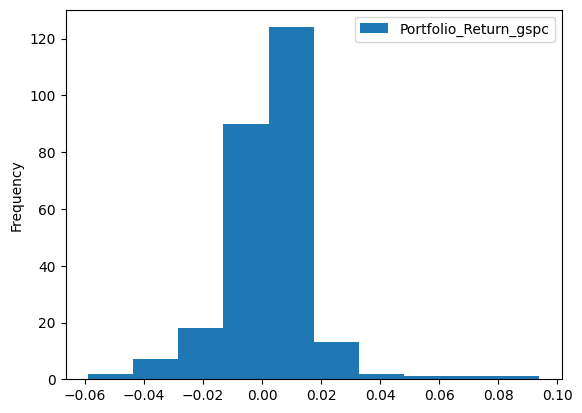

In [81]:
# Histogram of gspc
case5_gspc.plot.hist()

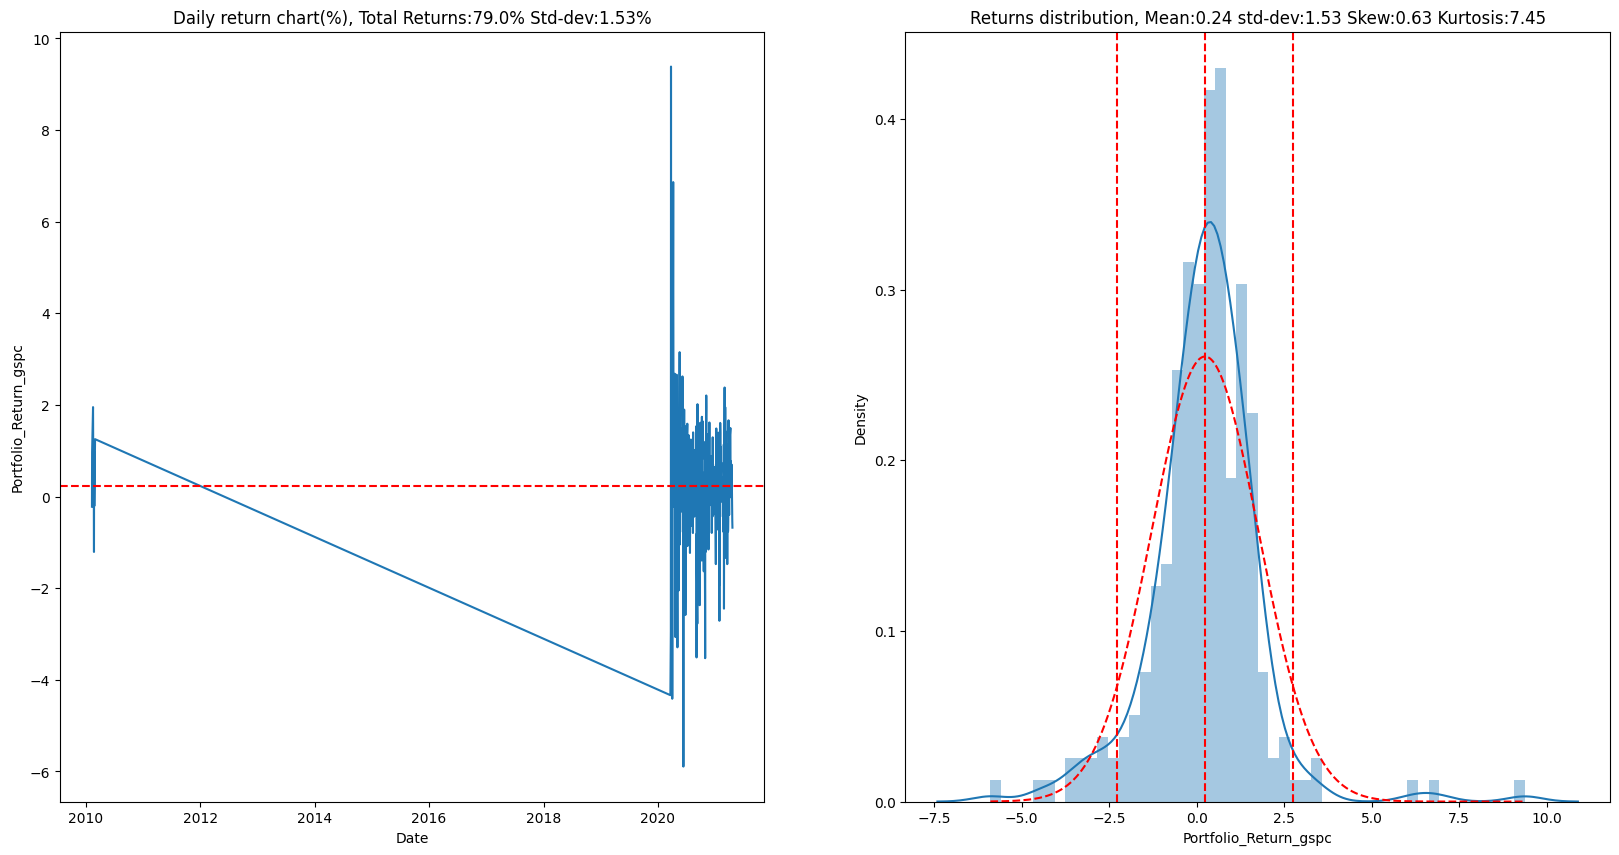

In [82]:
selected_return5_gspc=case5_gspc.set_index('Date')
plot_dist(selected_return5_gspc)

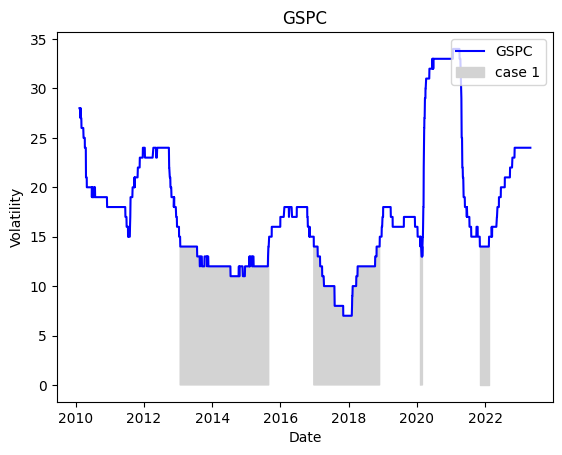

In [83]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the entire '^GSPC' column
ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^GSPC'], color='blue', label='GSPC')


# Create a mask for the condition
mask1 = (ann_vol_portfolio['^GSPC'] < 15) & (ann_vol_portfolio['^GSPC'].diff() <10)

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^GSPC'], where=mask1, color='lightgray',label='case 1')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('GSPC')
ax.legend(loc='upper right')

# Show the plot
plt.show()

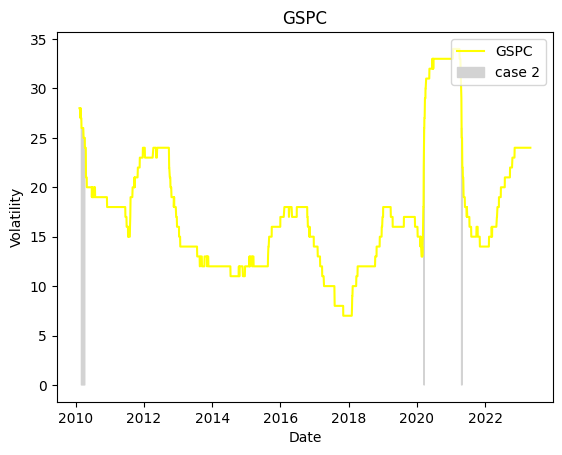

In [84]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the entire '^GSPC' column
ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^GSPC'], color='yellow', label='GSPC')


# Create a mask for the condition
mask2 = (((27 > ann_vol_portfolio['^GSPC']) & (ann_vol_portfolio['^GSPC'] >= 25)) | ((15 > ann_vol_portfolio['^GSPC'].diff()) & (ann_vol_portfolio['^GSPC'].diff() > 10)))

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^GSPC'], where=mask2, color='lightgray',label='case 2')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('GSPC')
ax.legend(loc='upper right')

# Show the plot
plt.show()

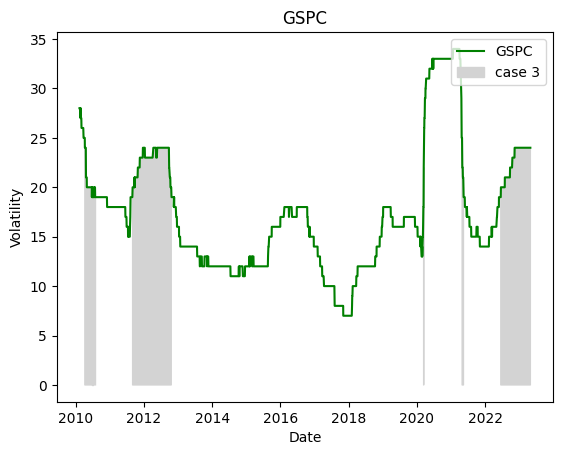

In [85]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the entire '^GSPC' column
ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^GSPC'], color='green', label='GSPC')


# Create a mask for the condition
mask3 = (((25 > ann_vol_portfolio['^GSPC']) & (ann_vol_portfolio['^GSPC'] >= 20)) | ((30 > ann_vol_portfolio['^GSPC'].diff()) & (ann_vol_portfolio['^GSPC'].diff() > 20)))

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^GSPC'], where=mask3, color='lightgray',label='case 3')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('GSPC')
ax.legend(loc='upper right')

# Show the plot
plt.show()

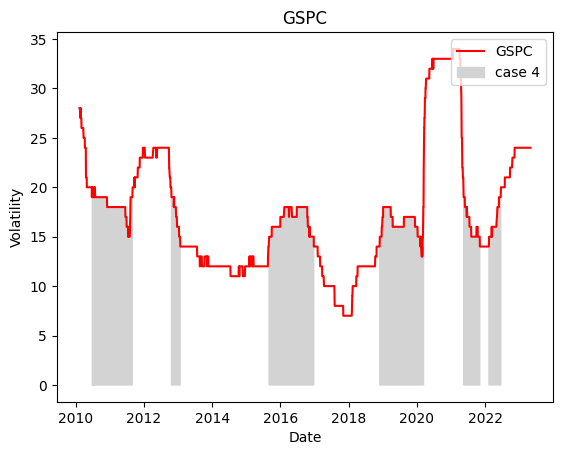

In [86]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the entire '^GSPC' column
ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^GSPC'], color='red', label='GSPC')


# Create a mask for the condition
mask4 = (((20 > ann_vol_portfolio['^GSPC']) & (ann_vol_portfolio['^GSPC'] >= 15)) | ((20 > ann_vol_portfolio['^GSPC'].diff()) & (ann_vol_portfolio['^GSPC'].diff() > 15)))

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^GSPC'], where=mask4, color='lightgray',label='case 4')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('GSPC')
ax.legend(loc='upper right')

# Show the plot
plt.show()

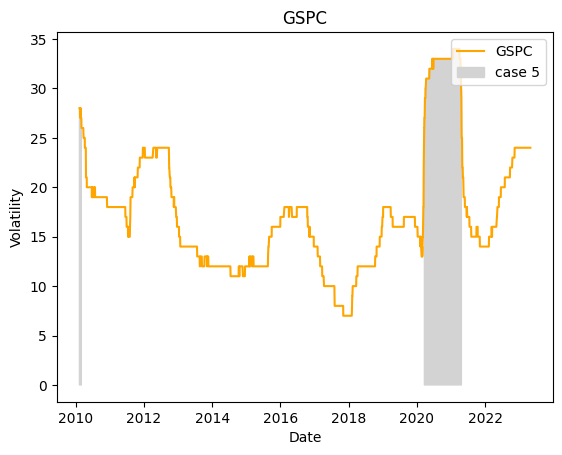

In [87]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the entire '^GSPC' column
ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^GSPC'], color='orange', label='GSPC')


# Create a mask for the condition
mask5 = (ann_vol_portfolio['^GSPC'] >= 27) | (ann_vol_portfolio['^GSPC'].diff() > 25)

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^GSPC'], where=mask5, color='lightgray',label='case 5')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('GSPC')
ax.legend(loc='upper right')

# Show the plot
plt.show()



## FOR ^HSI

In [88]:
#Plot distribution of series
def plot_dist(df):
    figure, axis = plt.subplots(1, 2)
    figure.set_figheight(10)
    figure.set_figwidth(20)
    mean,std,skew,kurt=price_parameters(df['Portfolio_Return_hsi']*100)
    sns.lineplot(data=df['Portfolio_Return_hsi']*100,ax=axis[0])
    axis[0].axhline(mean,color='r',ls='--')
    axis[0].set_title('Daily return chart(%), Total Returns:'+str(round(np.product(1+df['Portfolio_Return_hsi'])-1,2)*100)+'% Std-dev:'+str(std)+'%')
    sns.distplot(df['Portfolio_Return_hsi']*100,bins=50,ax=axis[1])
    x_axis=np.arange(min(df['Portfolio_Return_hsi']*100),max(df['Portfolio_Return_hsi']*100),0.0001)
    axis[1].axvline(mean,color='r',ls='--')
    axis[1].axvline(norm.ppf(0.05, loc=mean, scale=std),ls='--',color='r')
    axis[1].axvline(norm.ppf(0.95, loc=mean, scale=std),ls='--',color='r')
    axis[1].plot(x_axis,norm.pdf(x_axis, loc=mean, scale=std),ls='--',color='r')
    axis[1].set_title('Returns distribution, Mean:'+str(mean)+' std-dev:'+str(std)+' Skew:'+str(skew)+' Kurtosis:'+str(kurt))

In [89]:
filtered_dates1 = ann_vol_portfolio[((ann_vol_portfolio['^HSI'] < 15) & (ann_vol_portfolio['^HSI'].diff() <10))]['DateTime']
filtered_dates4  = ann_vol_portfolio[(((27 > ann_vol_portfolio['^HSI']) & (ann_vol_portfolio['^HSI'] >= 25)) | ((15 > ann_vol_portfolio['^HSI'].diff()) & (ann_vol_portfolio['^HSI'].diff() > 10)))]['DateTime']
filtered_dates3  = ann_vol_portfolio[(((25 > ann_vol_portfolio['^HSI']) & (ann_vol_portfolio['^HSI'] >= 20)) | ((30 > ann_vol_portfolio['^HSI'].diff()) & (ann_vol_portfolio['^HSI'].diff() > 20)))]['DateTime']
filtered_dates2  = ann_vol_portfolio[(((20 > ann_vol_portfolio['^HSI']) & (ann_vol_portfolio['^HSI'] >= 15)) | ((20 > ann_vol_portfolio['^HSI'].diff()) & (ann_vol_portfolio['^HSI'].diff() > 15)))]['DateTime']
filtered_dates5  = ann_vol_portfolio[((ann_vol_portfolio['^HSI']  >=  27) | (ann_vol_portfolio['^HSI'].diff() >25))]['DateTime']

In [90]:
# Dates fullfilling the condition
def selected_returns_dataframe(filtered_dates):
  selected_returns = []
  for date in filtered_dates:
    return_value = return_multiData.loc[return_multiData['DateTime'] == date, '^HSI'].values
    if len(return_value) > 0:
        selected_returns.append((date, return_value[0]))

  selected_return=pd.DataFrame(selected_returns)
  selected_return.set_axis(['Date', 'Portfolio_Return_hsi'], axis=1, inplace=True)
  return selected_return

In [91]:
def filtered_return_dataframe(selected_return_df):
  filtered_return_df = return_multiData[~return_multiData['DateTime'].isin(selected_return_df['Date'])]
  filtered_return_df1=pd.DataFrame()
  filtered_return_df1=filtered_return_df[['DateTime','^HSI']]
  return filtered_return_df1

#### CASE 1

In [92]:
case1_hsi=selected_returns_dataframe(filtered_dates1)
case1_hsi.head()

Date  Portfolio_Return_hsi
0 2015-03-20             -0.003827
1 2015-03-23              0.004893
2 2015-03-24             -0.003875
3 2015-03-25              0.005272
4 2015-03-26             -0.001270

In [93]:
# Comparing filtered dates with the main return dataframes dates and extract date and return from return dataframe which is not fulfilling condition

filt_case1_hsi= filtered_return_dataframe(case1_hsi)
filt_case1_hsi.head()

DateTime      ^HSI
0 2009-01-05  0.034601
1 2009-01-06 -0.003457
2 2009-01-07 -0.033660
3 2009-01-09 -0.040702
4 2009-01-12 -0.028269

In [94]:
# cumulative product of return which is not satisfied the condition 1
filt_case1_hsi=filt_case1_hsi.set_index('DateTime')
filt_case1_hsi_cumpro=(1+filt_case1_hsi).cumprod()
filt_case1_hsi_cumpro.head()

^HSI
DateTime            
2009-01-05  1.034601
2009-01-06  1.031025
2009-01-07  0.996321
2009-01-09  0.955768
2009-01-12  0.928749

<Axes: ylabel='Frequency'>

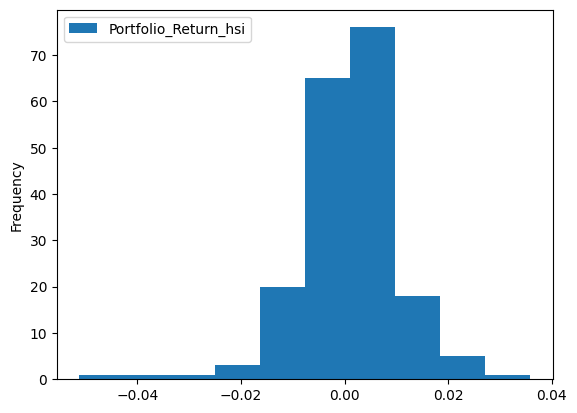

In [95]:
case1_hsi.plot.hist()

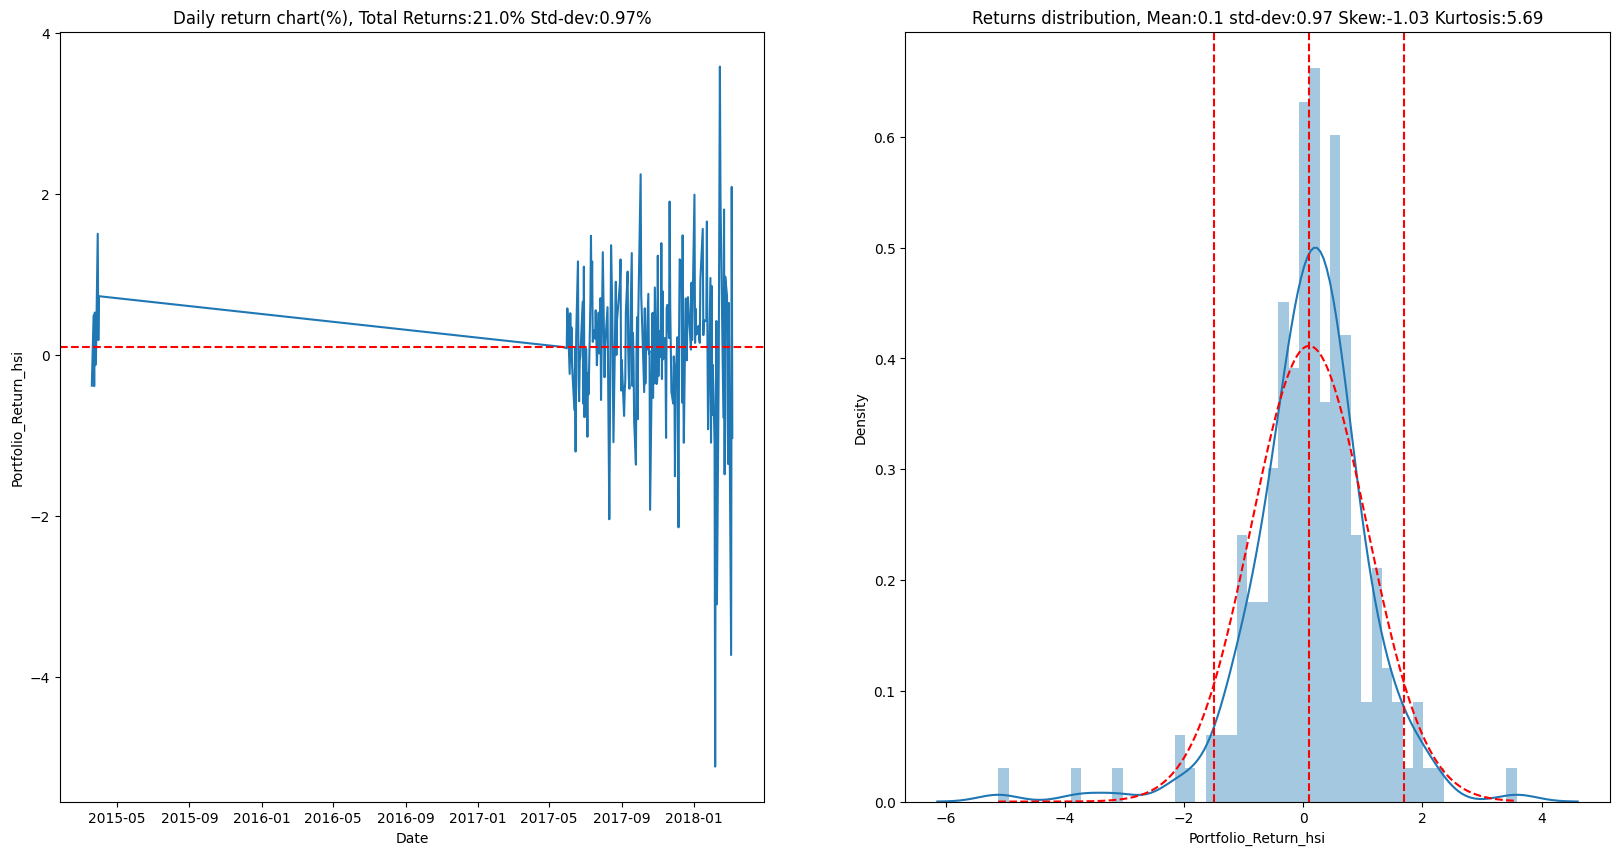

In [96]:
selected_return1_hsi=case1_hsi.set_index('Date')
plot_dist(selected_return1_hsi)

#### *CASE* 2

In [97]:
case2_hsi= selected_returns_dataframe(filtered_dates2)
case2_hsi.head()

Date  Portfolio_Return_hsi
0 2010-12-31              0.001570
1 2011-01-04              0.027481
2 2011-01-05              0.003775
3 2011-01-06              0.001199
4 2011-01-07             -0.004190

In [98]:
filt_case2_hsi= filtered_return_dataframe(case2_hsi)
filt_case2_hsi.head()

DateTime      ^HSI
0 2009-01-05  0.034601
1 2009-01-06 -0.003457
2 2009-01-07 -0.033660
3 2009-01-09 -0.040702
4 2009-01-12 -0.028269

In [99]:
# cumulative product of return which is not satisfied the condition 2
filt_case2_hsi=filt_case2_hsi.set_index('DateTime')
filt_case2_hsi_cumpro=(1+filt_case2_hsi).cumprod()
filt_case2_hsi_cumpro.head()

^HSI
DateTime            
2009-01-05  1.034601
2009-01-06  1.031025
2009-01-07  0.996321
2009-01-09  0.955768
2009-01-12  0.928749

<Axes: ylabel='Frequency'>

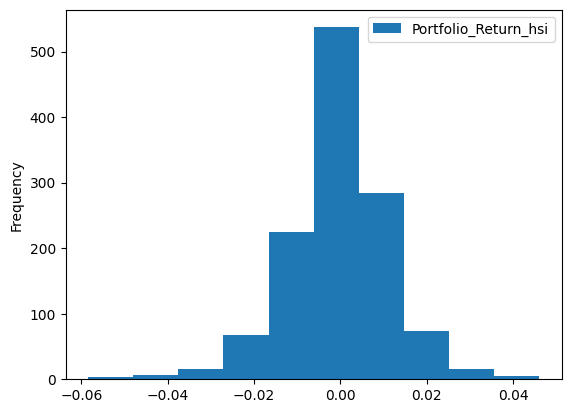

In [100]:
# Histogram of hsi
case2_hsi.plot.hist()

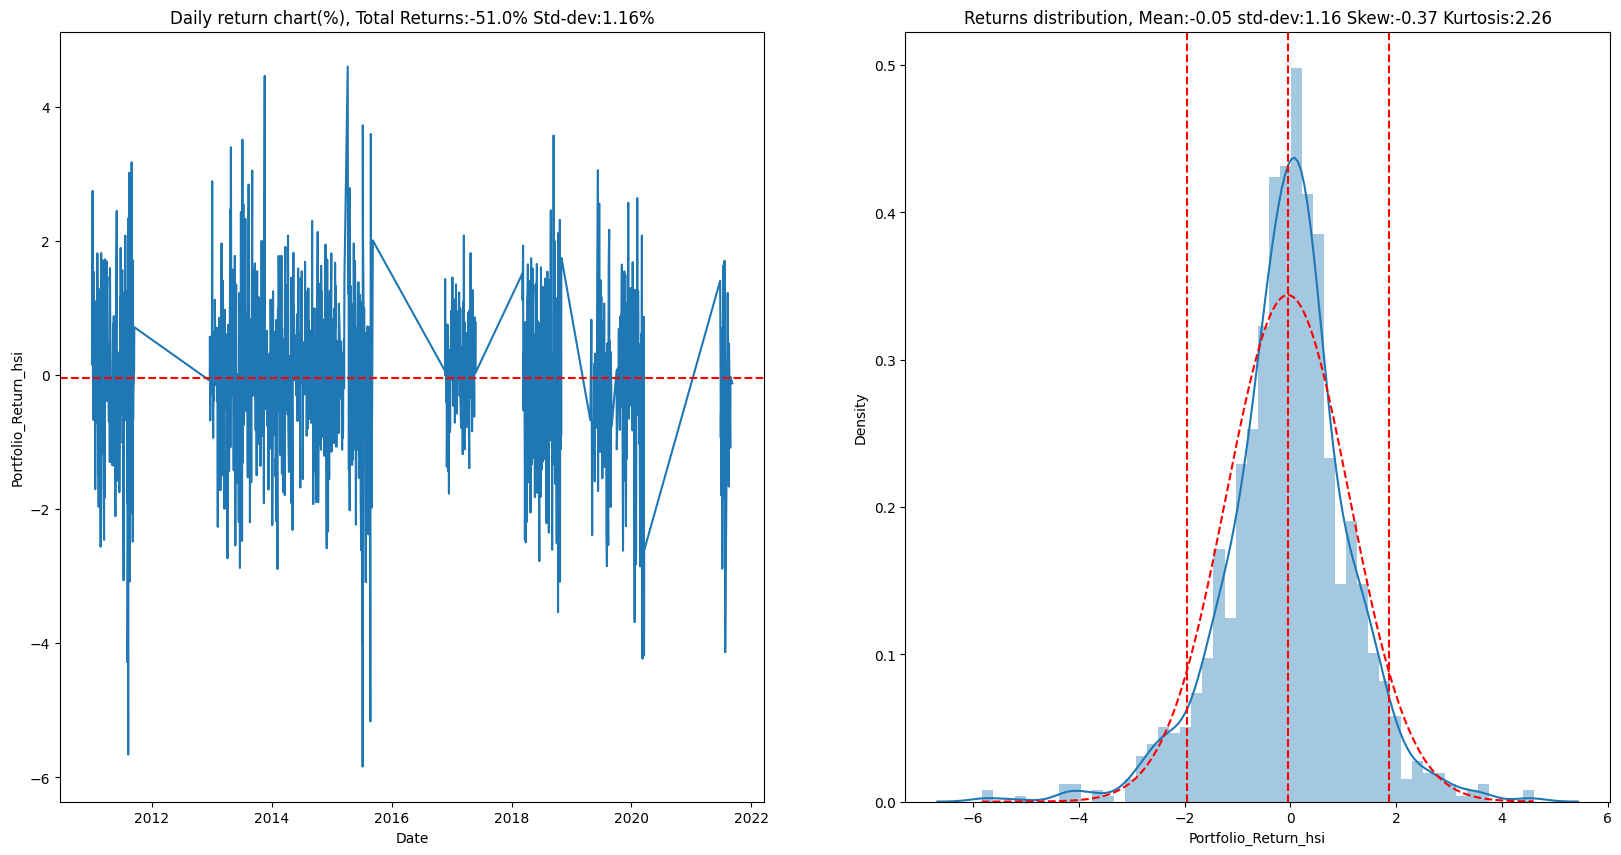

In [101]:
selected_return2_hsi=case2_hsi.set_index('Date')
plot_dist(selected_return2_hsi)

#### CASE 3

In [102]:
case3_hsi= selected_returns_dataframe(filtered_dates3)
case3_hsi.head()

Date  Portfolio_Return_hsi
0 2010-07-07             -0.011305
1 2010-07-08              0.009744
2 2010-07-09              0.016364
3 2010-07-12              0.004356
4 2010-07-13             -0.001777

In [103]:
filt_case3_hsi= filtered_return_dataframe(case3_hsi)
filt_case3_hsi.head()

DateTime      ^HSI
0 2009-01-05  0.034601
1 2009-01-06 -0.003457
2 2009-01-07 -0.033660
3 2009-01-09 -0.040702
4 2009-01-12 -0.028269

In [104]:
# cumulative product of return which is not satisfied the condition 3
filt_case3_hsi=filt_case3_hsi.set_index('DateTime')
filt_case3_hsi_cumpro=(1+filt_case3_hsi).cumprod()
filt_case3_hsi_cumpro.head()

^HSI
DateTime            
2009-01-05  1.034601
2009-01-06  1.031025
2009-01-07  0.996321
2009-01-09  0.955768
2009-01-12  0.928749

<Axes: ylabel='Frequency'>

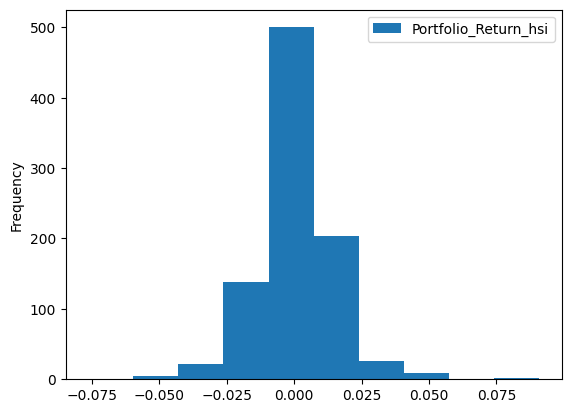

In [105]:
# Histogram of hsi
case3_hsi.plot.hist()

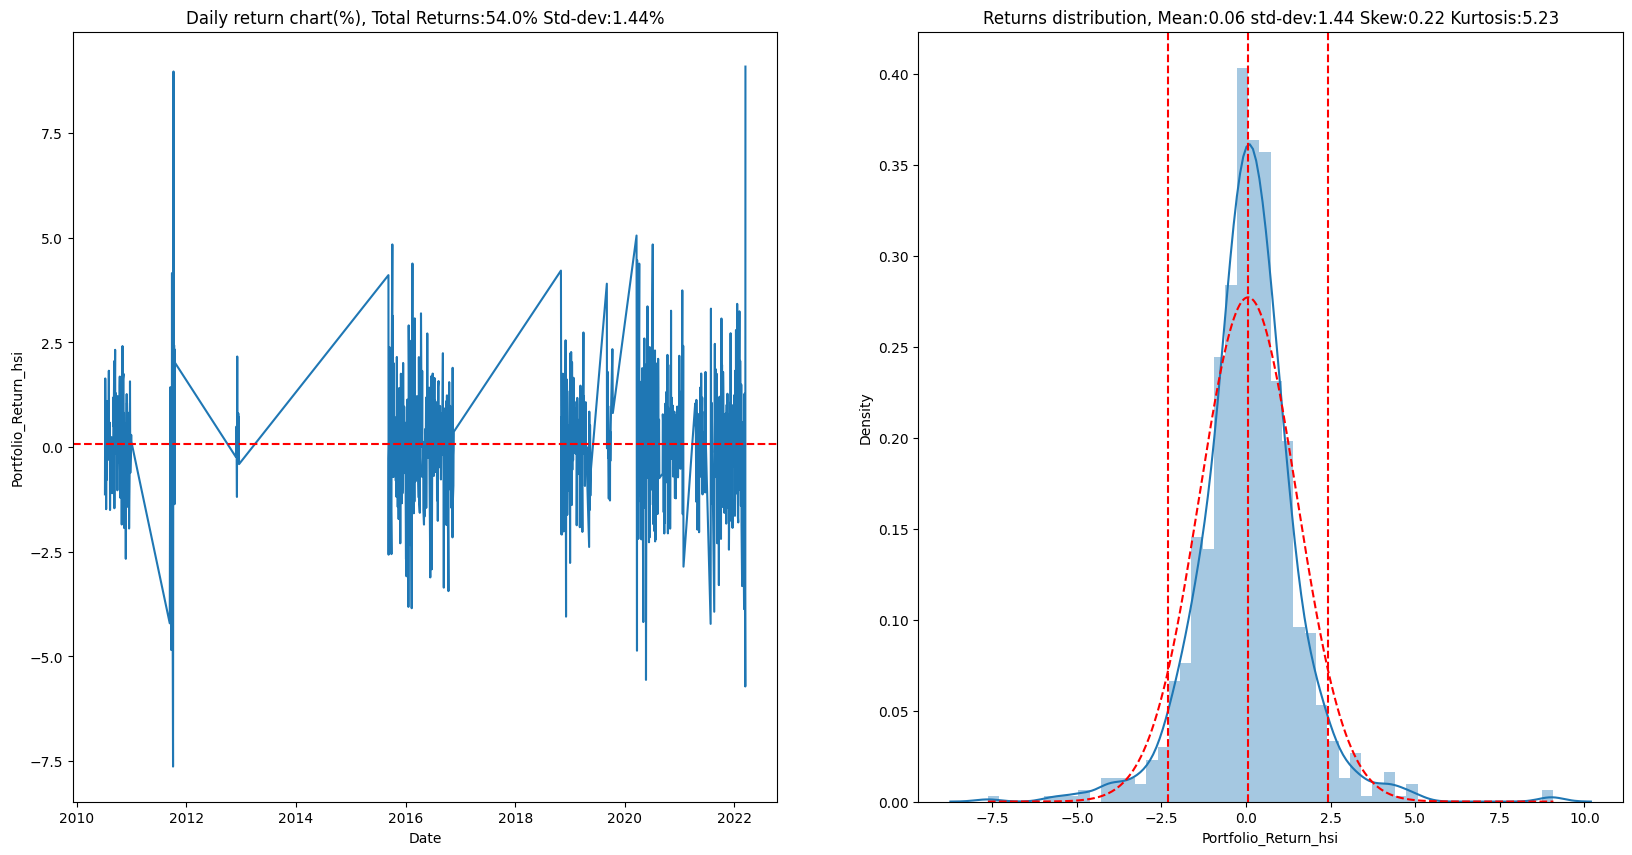

In [106]:
selected_return3_hsi=case3_hsi.set_index('Date')
plot_dist(selected_return3_hsi)

#### CASE 4

In [107]:
case4_hsi= selected_returns_dataframe(filtered_dates4)
case4_hsi.head()

Date  Portfolio_Return_hsi
0 2010-06-07             -0.020319
1 2010-06-08              0.005642
2 2010-06-09              0.006864
3 2010-06-10              0.000584
4 2010-06-11              0.012208

In [108]:
filt_case4_hsi= filtered_return_dataframe(case4_hsi)
filt_case4_hsi.head()

DateTime      ^HSI
0 2009-01-05  0.034601
1 2009-01-06 -0.003457
2 2009-01-07 -0.033660
3 2009-01-09 -0.040702
4 2009-01-12 -0.028269

In [109]:
# cumulative product of return which is not satisfied the condition 4
filt_case4_hsi=filt_case4_hsi.set_index('DateTime')
filt_case4_hsi_cumpro=(1+filt_case4_hsi).cumprod()
filt_case4_hsi_cumpro.head()

^HSI
DateTime            
2009-01-05  1.034601
2009-01-06  1.031025
2009-01-07  0.996321
2009-01-09  0.955768
2009-01-12  0.928749

<Axes: ylabel='Frequency'>

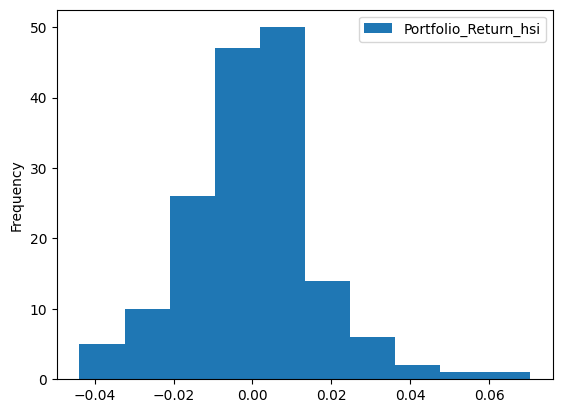

In [110]:
# Histogram of hsi
case4_hsi.plot.hist()

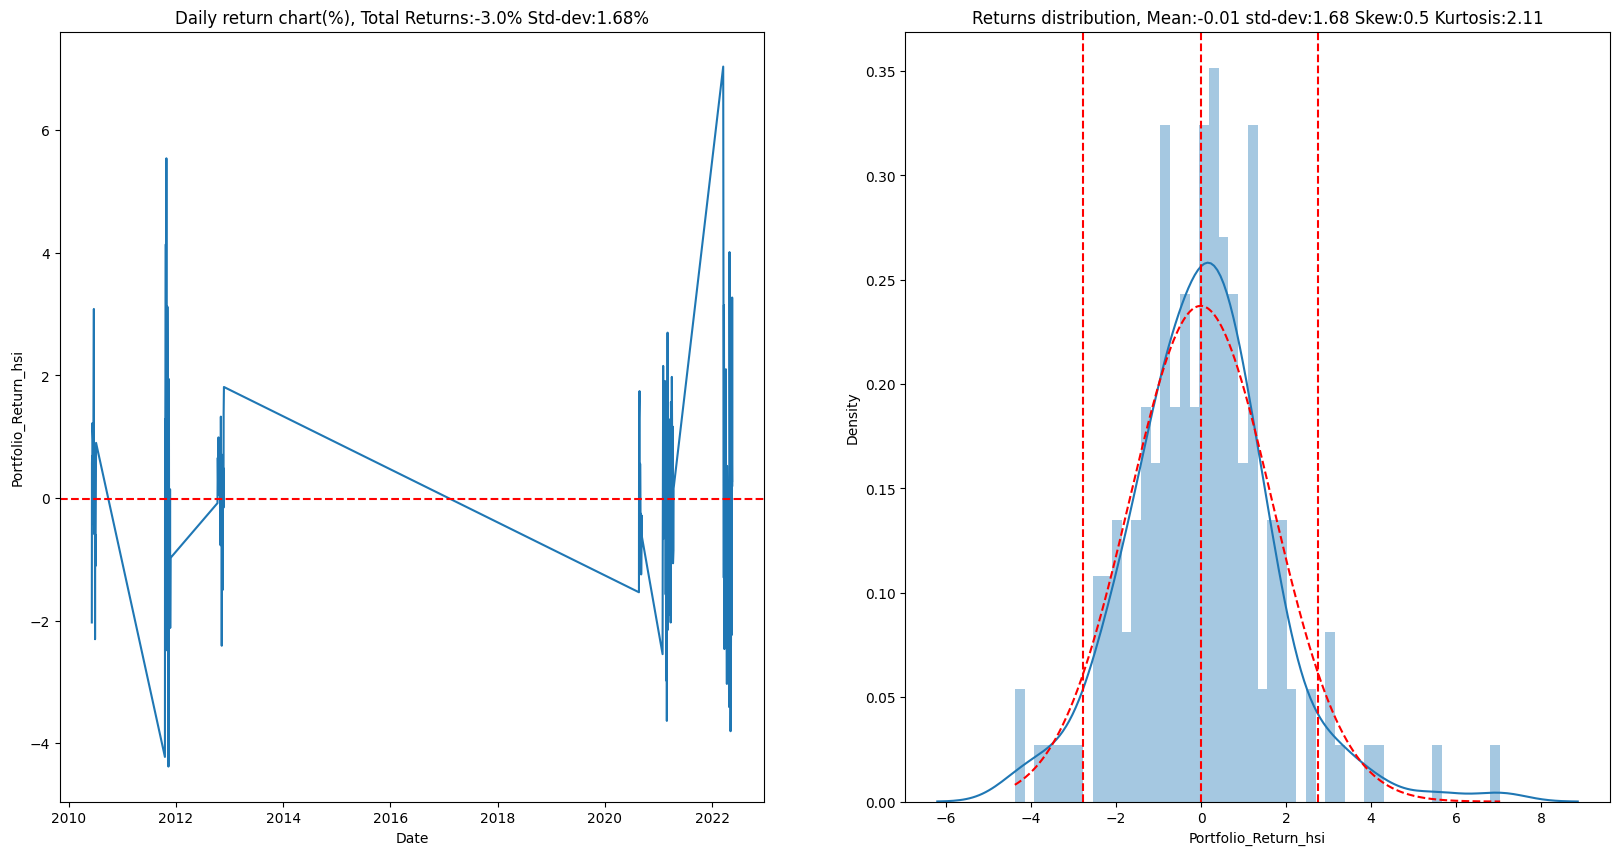

In [111]:
selected_return4_hsi=case4_hsi.set_index('Date')
plot_dist(selected_return4_hsi)

#### CASE 5

In [112]:
case5_hsi= selected_returns_dataframe(filtered_dates5)
case5_hsi.head()

Date  Portfolio_Return_hsi
0 2010-02-10              0.006667
1 2010-02-11              0.018495
2 2010-02-17              0.011992
3 2010-02-18             -0.005448
4 2010-02-19             -0.025861

In [113]:
filt_case5_hsi= filtered_return_dataframe(case5_hsi)
filt_case5_hsi.head()

DateTime      ^HSI
0 2009-01-05  0.034601
1 2009-01-06 -0.003457
2 2009-01-07 -0.033660
3 2009-01-09 -0.040702
4 2009-01-12 -0.028269

In [114]:
# cumulative product of return which is not satisfied the condition 5
filt_case5_hsi=filt_case5_hsi.set_index('DateTime')
filt_case5_hsi_cumpro=(1+filt_case5_hsi).cumprod()
filt_case5_hsi_cumpro.head()

^HSI
DateTime            
2009-01-05  1.034601
2009-01-06  1.031025
2009-01-07  0.996321
2009-01-09  0.955768
2009-01-12  0.928749

<Axes: ylabel='Frequency'>

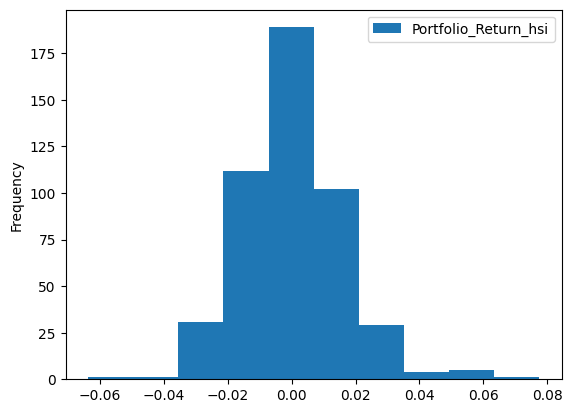

In [115]:
# Histogram of hsi
case5_hsi.plot.hist()

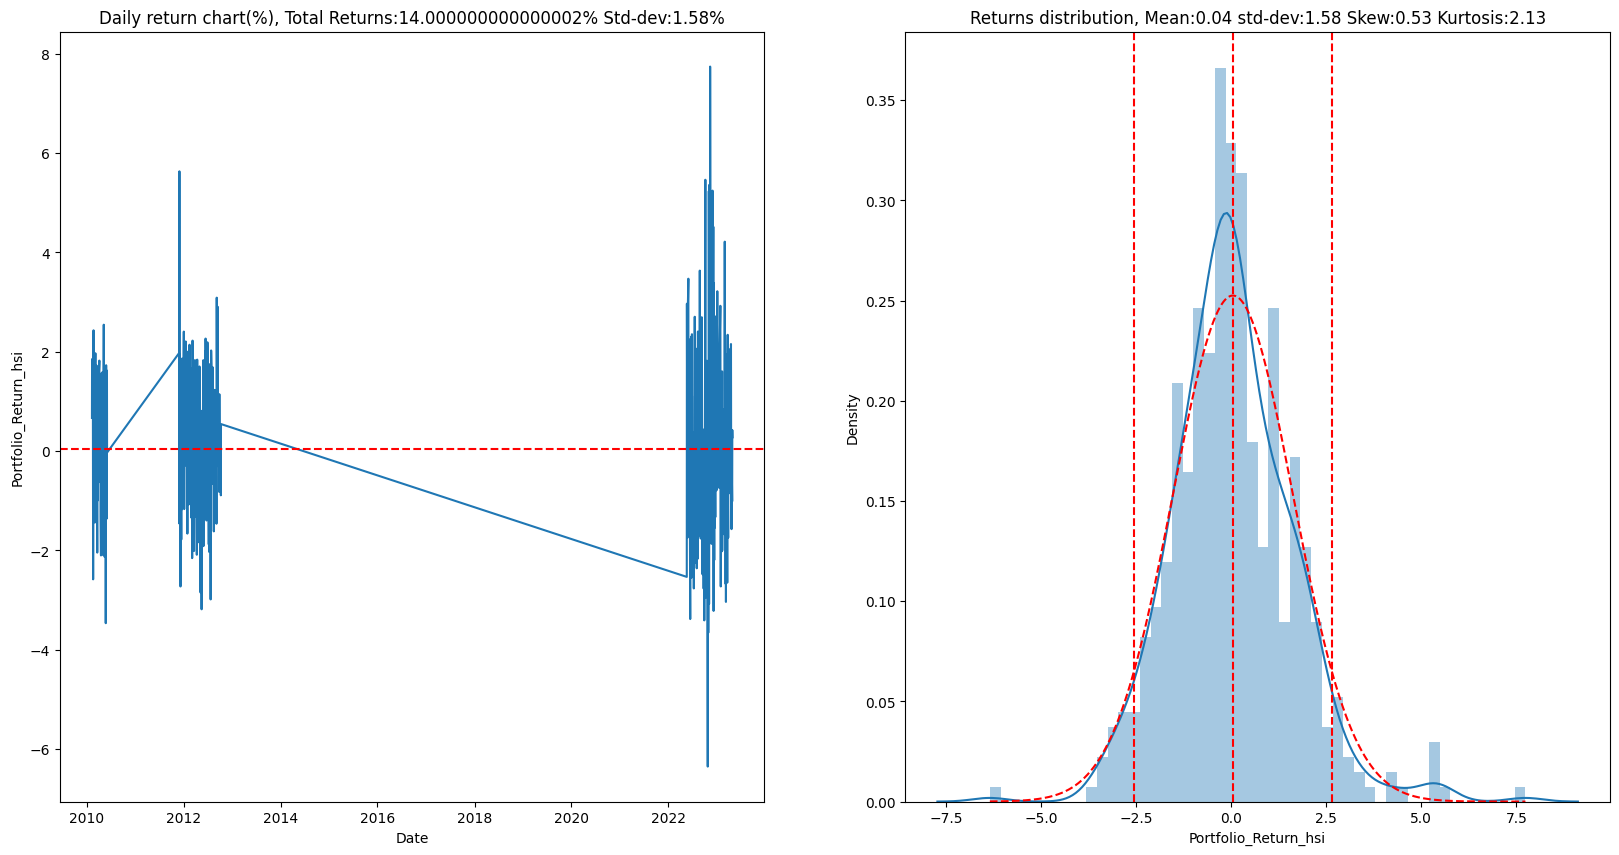

In [116]:
selected_return5_hsi=case5_hsi.set_index('Date')
plot_dist(selected_return5_hsi)

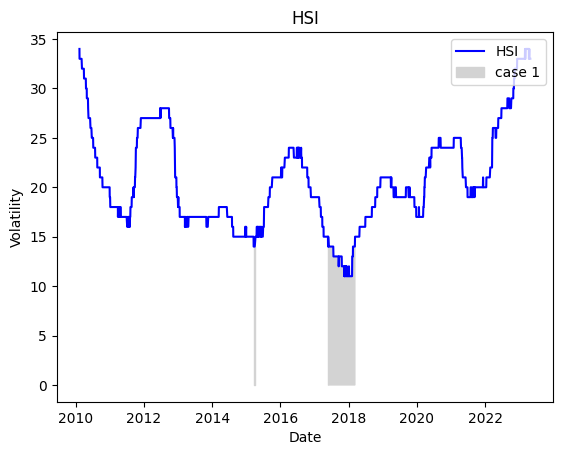

In [117]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^HSI'], color='blue', label='HSI')


# Create a mask for the condition
mask1 = (ann_vol_portfolio['^HSI'] < 15) & (ann_vol_portfolio['^HSI'].diff() <10)

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^HSI'], where=mask1, color='lightgray',label='case 1')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('HSI')
ax.legend(loc='upper right')

# Show the plot
plt.show()

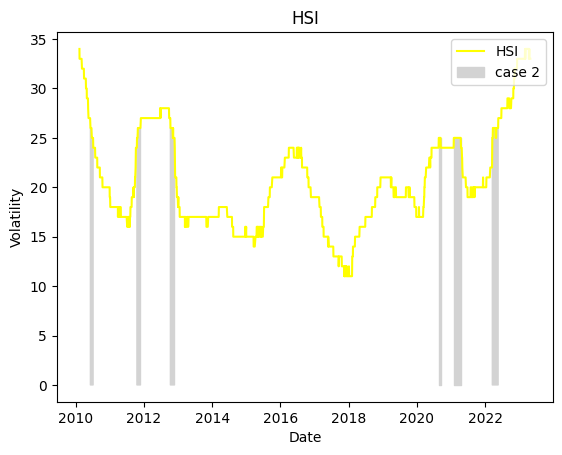

In [118]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^HSI'], color='yellow', label='HSI')


# Create a mask for the condition
mask2 = (((27 > ann_vol_portfolio['^HSI']) & (ann_vol_portfolio['^HSI'] >= 25)) | ((15 > ann_vol_portfolio['^HSI'].diff()) & (ann_vol_portfolio['^HSI'].diff() > 10)))

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^HSI'], where=mask2, color='lightgray',label='case 2')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('HSI')
ax.legend(loc='upper right')

# Show the plot
plt.show()

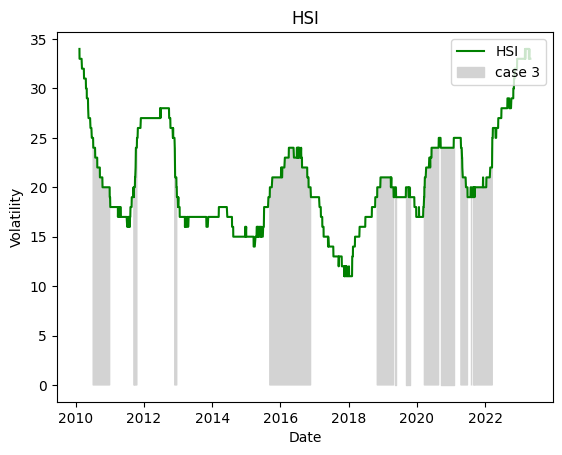

In [119]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^HSI'], color='green', label='HSI')


# Create a mask for the condition
mask3 = (((25 > ann_vol_portfolio['^HSI']) & (ann_vol_portfolio['^HSI'] >= 20)) | ((30 > ann_vol_portfolio['^HSI'].diff()) & (ann_vol_portfolio['^HSI'].diff() > 20)))

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^HSI'], where=mask3, color='lightgray',label='case 3')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('HSI')
ax.legend(loc='upper right')

# Show the plot
plt.show()

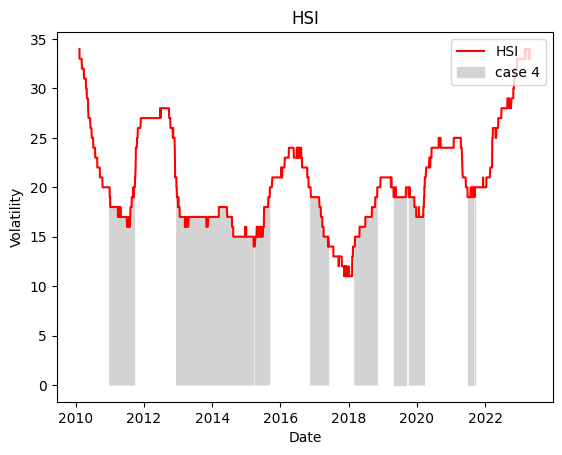

In [120]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^HSI'], color='red', label='HSI')


# Create a mask for the condition
mask4 = (((20 > ann_vol_portfolio['^HSI']) & (ann_vol_portfolio['^HSI'] >= 15)) | ((20 > ann_vol_portfolio['^HSI'].diff()) & (ann_vol_portfolio['^HSI'].diff() > 15)))

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^HSI'], where=mask4, color='lightgray',label='case 4')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('HSI')
ax.legend(loc='upper right')

# Show the plot
plt.show()

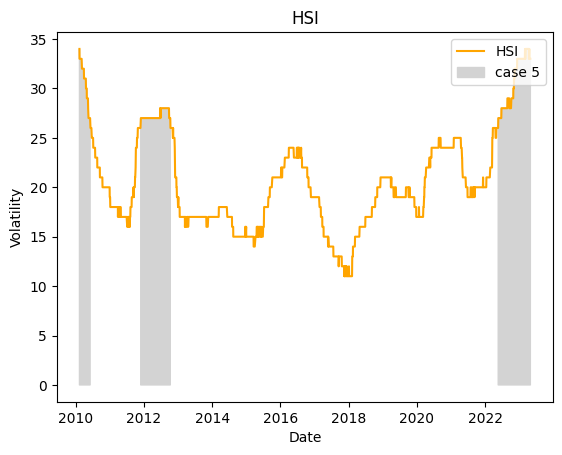

In [121]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^HSI'], color='orange', label='HSI')


# Create a mask for the condition
mask5 = (ann_vol_portfolio['^HSI'] >= 27) | (ann_vol_portfolio['^HSI'].diff() > 25)

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^HSI'], where=mask5, color='lightgray',label='case 5')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('HSI')
ax.legend(loc='upper right')

# Show the plot
plt.show()



## FOR ^NSEI

In [122]:
#Plot distribution of series
def plot_dist(df):
    figure, axis = plt.subplots(1, 2)
    figure.set_figheight(10)
    figure.set_figwidth(20)
    mean,std,skew,kurt=price_parameters(df['Portfolio_Return_nsei']*100)
    sns.lineplot(data=df['Portfolio_Return_nsei']*100,ax=axis[0])
    axis[0].axhline(mean,color='r',ls='--')
    axis[0].set_title('Daily return chart(%), Total Returns:'+str(round(np.product(1+df['Portfolio_Return_nsei'])-1,2)*100)+'% Std-dev:'+str(std)+'%')
    sns.distplot(df['Portfolio_Return_nsei']*100,bins=50,ax=axis[1])
    x_axis=np.arange(min(df['Portfolio_Return_nsei']*100),max(df['Portfolio_Return_nsei']*100),0.0001)
    axis[1].axvline(mean,color='r',ls='--')
    axis[1].axvline(norm.ppf(0.05, loc=mean, scale=std),ls='--',color='r')
    axis[1].axvline(norm.ppf(0.95, loc=mean, scale=std),ls='--',color='r')
    axis[1].plot(x_axis,norm.pdf(x_axis, loc=mean, scale=std),ls='--',color='r')
    axis[1].set_title('Returns distribution, Mean:'+str(mean)+' std-dev:'+str(std)+' Skew:'+str(skew)+' Kurtosis:'+str(kurt))

In [123]:
filtered_dates1 = ann_vol_portfolio[((ann_vol_portfolio['^NSEI'] < 15) & (ann_vol_portfolio['^NSEI'].diff() <10))]['DateTime']
filtered_dates4  = ann_vol_portfolio[(((27 > ann_vol_portfolio['^NSEI']) & (ann_vol_portfolio['^NSEI'] >= 25)) | ((15 > ann_vol_portfolio['^NSEI'].diff()) & (ann_vol_portfolio['^NSEI'].diff() > 10)))]['DateTime']
filtered_dates3  = ann_vol_portfolio[(((25 > ann_vol_portfolio['^NSEI']) & (ann_vol_portfolio['^NSEI'] >= 20)) | ((30 > ann_vol_portfolio['^NSEI'].diff()) & (ann_vol_portfolio['^NSEI'].diff() > 20)))]['DateTime']
filtered_dates2  = ann_vol_portfolio[(((20 > ann_vol_portfolio['^NSEI']) & (ann_vol_portfolio['^NSEI'] >= 15)) | ((20 > ann_vol_portfolio['^NSEI'].diff()) & (ann_vol_portfolio['^NSEI'].diff() > 15)))]['DateTime']
filtered_dates5  = ann_vol_portfolio[((ann_vol_portfolio['^NSEI']  >=  27) | (ann_vol_portfolio['^NSEI'].diff() >25))]['DateTime']

In [124]:
# Dates fullfilling the condition
def selected_returns_dataframe(filtered_dates):
  selected_returns = []
  for date in filtered_dates:
    return_value = return_multiData.loc[return_multiData['DateTime'] == date, '^NSEI'].values
    if len(return_value) > 0:
        selected_returns.append((date, return_value[0]))

  selected_return=pd.DataFrame(selected_returns)
  selected_return.set_axis(['Date', 'Portfolio_Return_nsei'], axis=1, inplace=True)
  return selected_return

In [125]:
def filtered_return_dataframe(selected_return_df):
  filtered_return_df = return_multiData[~return_multiData['DateTime'].isin(selected_return_df['Date'])]
  filtered_return_df1=pd.DataFrame()
  filtered_return_df1=filtered_return_df[['DateTime','^NSEI']]
  return filtered_return_df1

#### CASE 1

In [126]:
case1_nsei=selected_returns_dataframe(filtered_dates1)
case1_nsei.head()

Date  Portfolio_Return_nsei
0 2014-11-11               0.002205
1 2014-11-12               0.002469
2 2014-11-13              -0.003036
3 2014-11-14               0.003835
4 2014-11-17               0.004869

In [127]:
# Comparing filtered dates with the main return dataframes dates and extract date and return from return dataframe which is not fulfilling condition

filt_case1_nsei= filtered_return_dataframe(case1_nsei)
filt_case1_nsei.head()

DateTime     ^NSEI
0 2009-01-05  0.024518
1 2009-01-06 -0.002771
2 2009-01-07 -0.061809
3 2009-01-09 -0.016231
4 2009-01-12 -0.034772

In [128]:
# cumulative product of return which is not satisfied the condition 1
filt_case1_nsei=filt_case1_nsei.set_index('DateTime')
filt_case1_nsei_cumpro=(1+filt_case1_nsei).cumprod()
filt_case1_nsei_cumpro.head()

^NSEI
DateTime            
2009-01-05  1.024518
2009-01-06  1.021679
2009-01-07  0.958530
2009-01-09  0.942972
2009-01-12  0.910183

<Axes: ylabel='Frequency'>

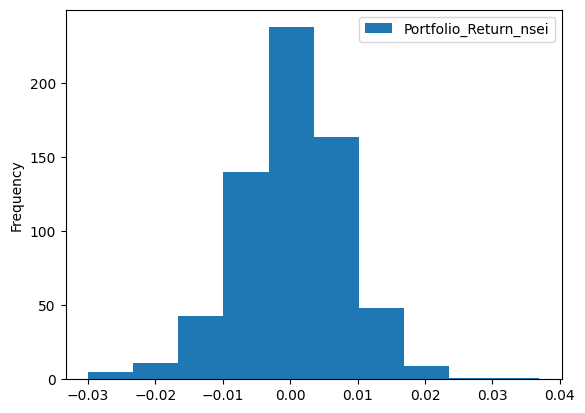

In [129]:
case1_nsei.plot.hist()

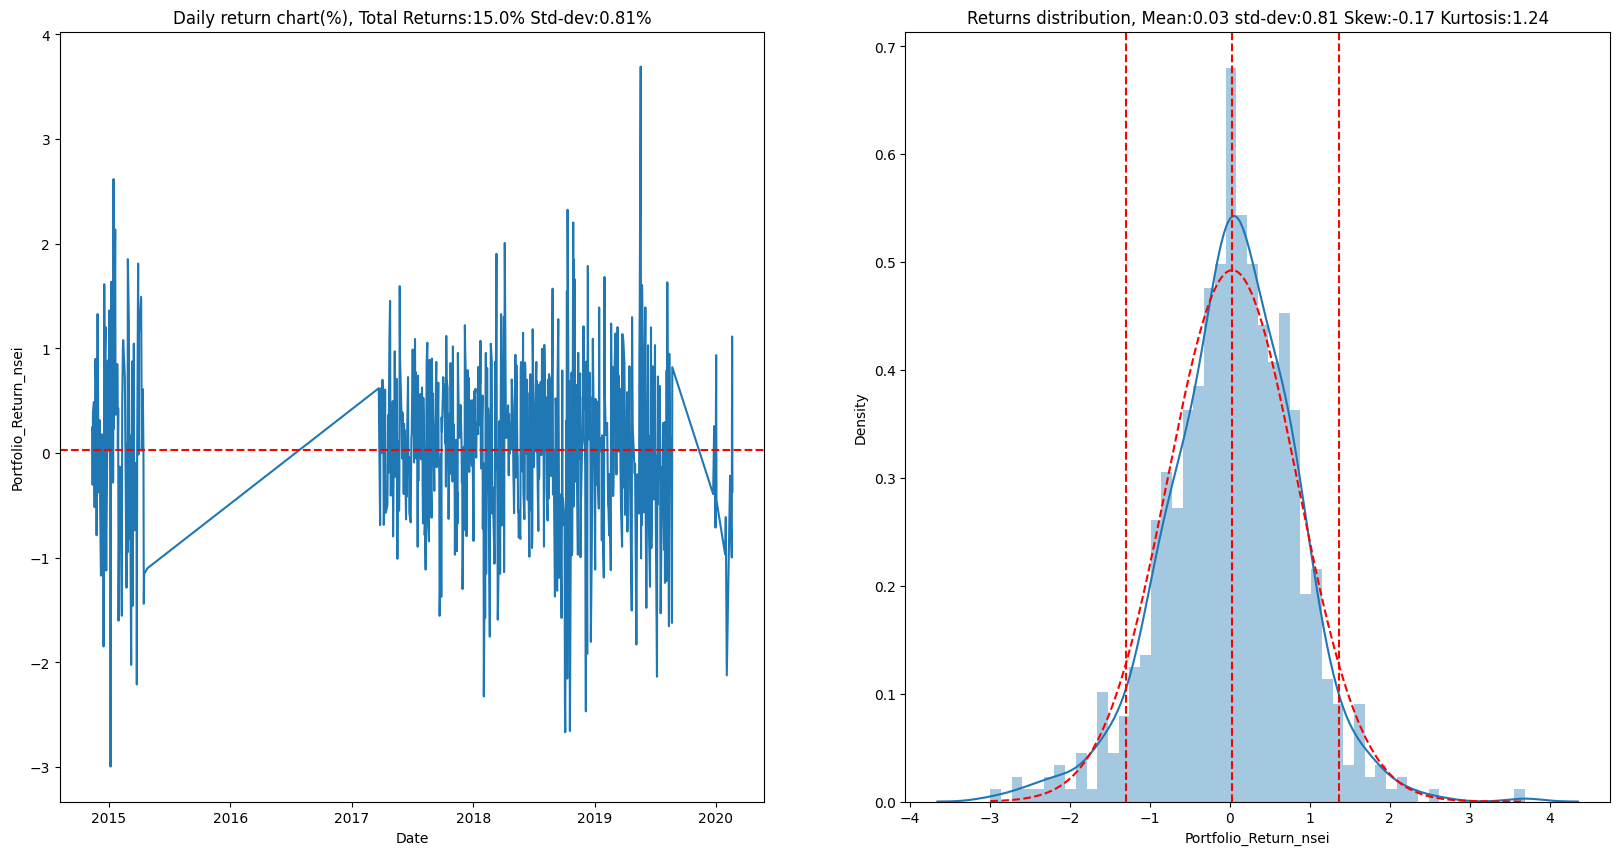

In [130]:
selected_return1_nsei=case1_nsei.set_index('Date')
plot_dist(selected_return1_nsei)

#### *CASE* 2

In [131]:
case2_nsei= selected_returns_dataframe(filtered_dates2)
case2_nsei.head()

Date  Portfolio_Return_nsei
0 2010-08-20              -0.001724
1 2010-08-23               0.002323
2 2010-08-24              -0.006927
3 2010-08-25              -0.007766
4 2010-08-26               0.002847

In [132]:
filt_case2_nsei= filtered_return_dataframe(case2_nsei)
filt_case2_nsei.head()

DateTime     ^NSEI
0 2009-01-05  0.024518
1 2009-01-06 -0.002771
2 2009-01-07 -0.061809
3 2009-01-09 -0.016231
4 2009-01-12 -0.034772

In [133]:
# cumulative product of return which is not satisfied the condition 2
filt_case2_nsei=filt_case2_nsei.set_index('DateTime')
filt_case2_nsei_cumpro=(1+filt_case2_nsei).cumprod()
filt_case2_nsei_cumpro.head()

^NSEI
DateTime            
2009-01-05  1.024518
2009-01-06  1.021679
2009-01-07  0.958530
2009-01-09  0.942972
2009-01-12  0.910183

<Axes: ylabel='Frequency'>

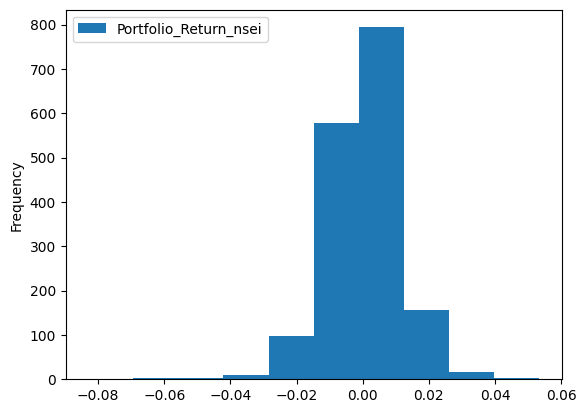

In [134]:
# Histogram of nsei
case2_nsei.plot.hist()

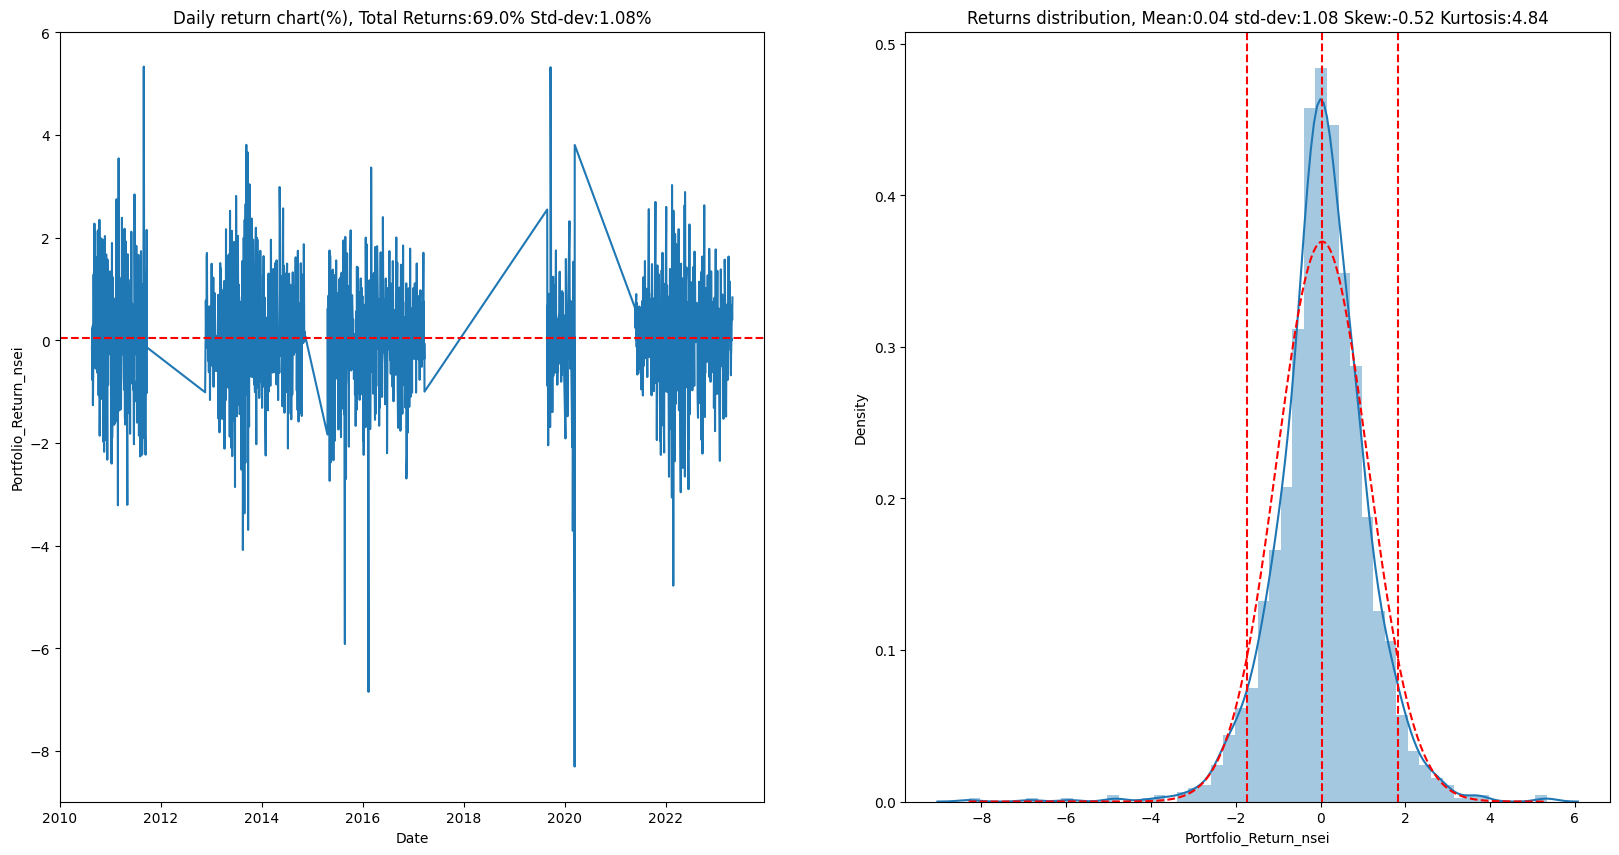

In [135]:
selected_return2_nsei=case2_nsei.set_index('Date')
plot_dist(selected_return2_nsei)

#### CASE 3

In [136]:
case3_nsei= selected_returns_dataframe(filtered_dates3)
case3_nsei.head()

Date  Portfolio_Return_nsei
0 2010-06-23               0.001241
1 2010-06-24              -0.000479
2 2010-06-25              -0.009689
3 2010-06-28               0.012232
4 2010-06-29              -0.014503

In [137]:
filt_case3_nsei= filtered_return_dataframe(case3_nsei)
filt_case3_nsei.head()

DateTime     ^NSEI
0 2009-01-05  0.024518
1 2009-01-06 -0.002771
2 2009-01-07 -0.061809
3 2009-01-09 -0.016231
4 2009-01-12 -0.034772

In [138]:
# cumulative product of return which is not satisfied the condition 3
filt_case3_nsei=filt_case3_nsei.set_index('DateTime')
filt_case3_nsei_cumpro=(1+filt_case3_nsei).cumprod()
filt_case3_nsei_cumpro.head()

^NSEI
DateTime            
2009-01-05  1.024518
2009-01-06  1.021679
2009-01-07  0.958530
2009-01-09  0.942972
2009-01-12  0.910183

<Axes: ylabel='Frequency'>

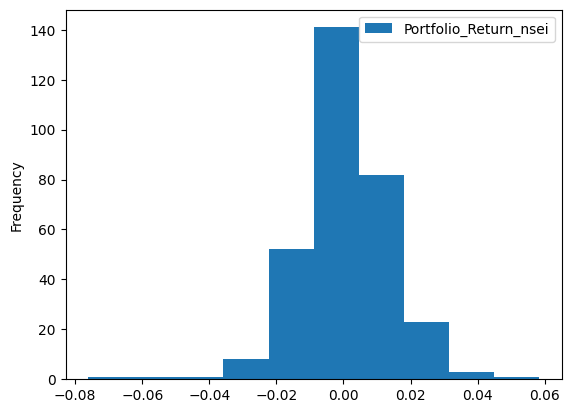

In [139]:
# Histogram of nsei
case3_nsei.plot.hist()

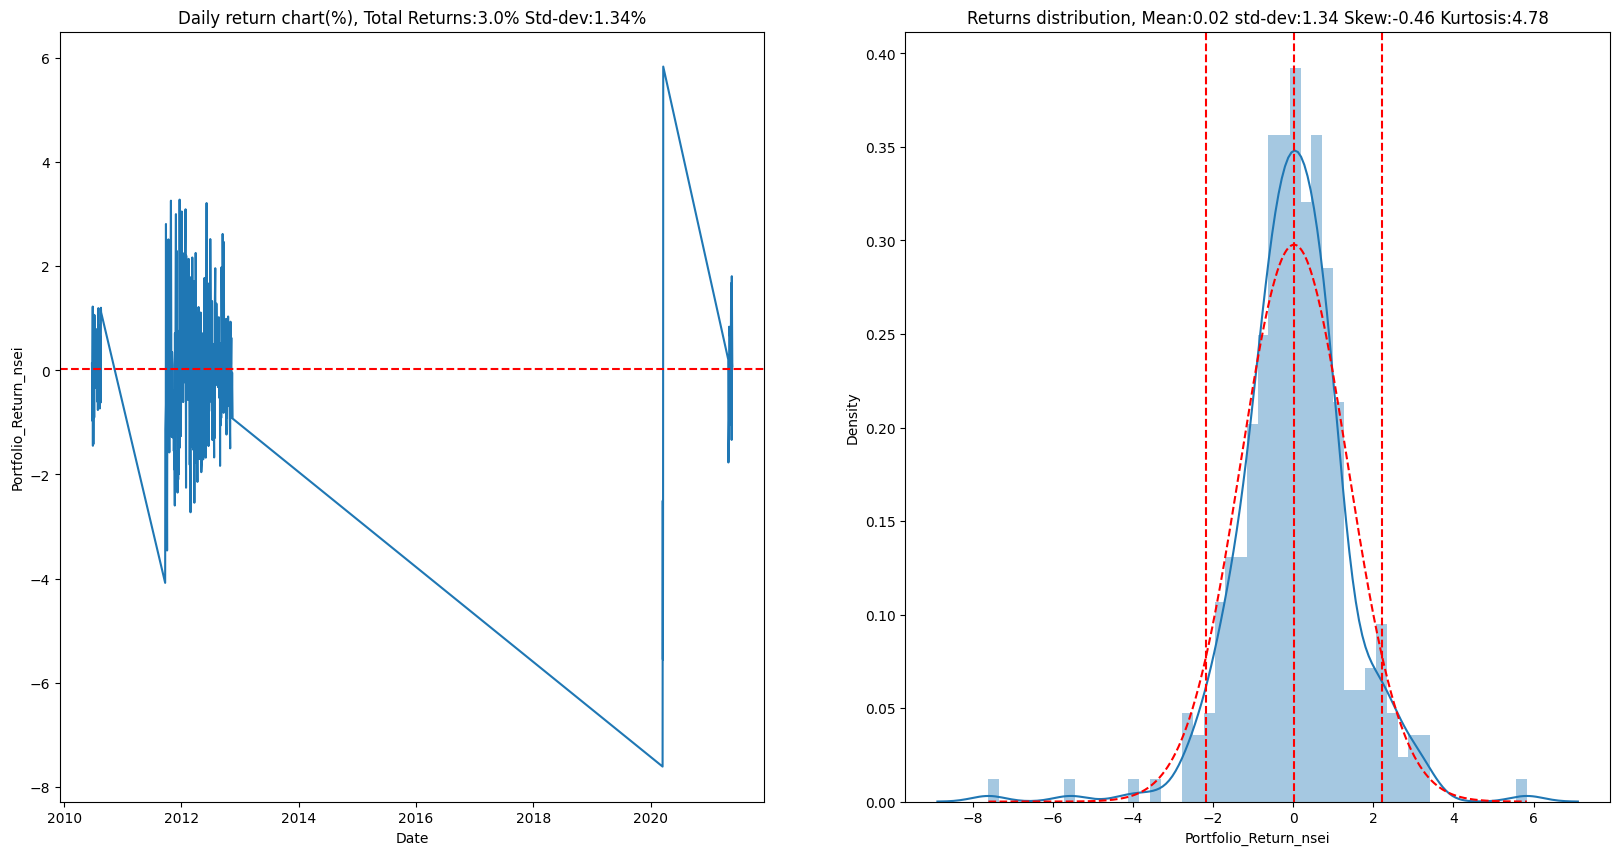

In [140]:
selected_return3_nsei=case3_nsei.set_index('Date')
plot_dist(selected_return3_nsei)

#### CASE 4

In [141]:
case4_nsei= selected_returns_dataframe(filtered_dates4)
case4_nsei.head()

Date  Portfolio_Return_nsei
0 2020-03-23              -0.129805
1 2020-03-24               0.025071
2 2020-03-25               0.066247

In [142]:
filt_case4_nsei= filtered_return_dataframe(case4_nsei)
filt_case4_nsei.head()

DateTime     ^NSEI
0 2009-01-05  0.024518
1 2009-01-06 -0.002771
2 2009-01-07 -0.061809
3 2009-01-09 -0.016231
4 2009-01-12 -0.034772

In [143]:
# cumulative product of return which is not satisfied the condition 4
filt_case4_nsei=filt_case4_nsei.set_index('DateTime')
filt_case4_nsei_cumpro=(1+filt_case4_nsei).cumprod()
filt_case4_nsei_cumpro.head()

^NSEI
DateTime            
2009-01-05  1.024518
2009-01-06  1.021679
2009-01-07  0.958530
2009-01-09  0.942972
2009-01-12  0.910183

<Axes: ylabel='Frequency'>

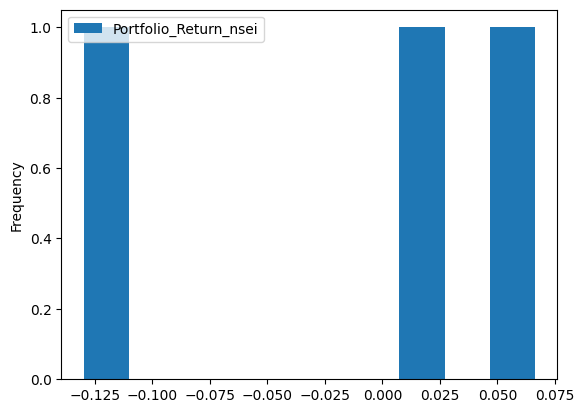

In [144]:
# Histogram of nsei
case4_nsei.plot.hist()

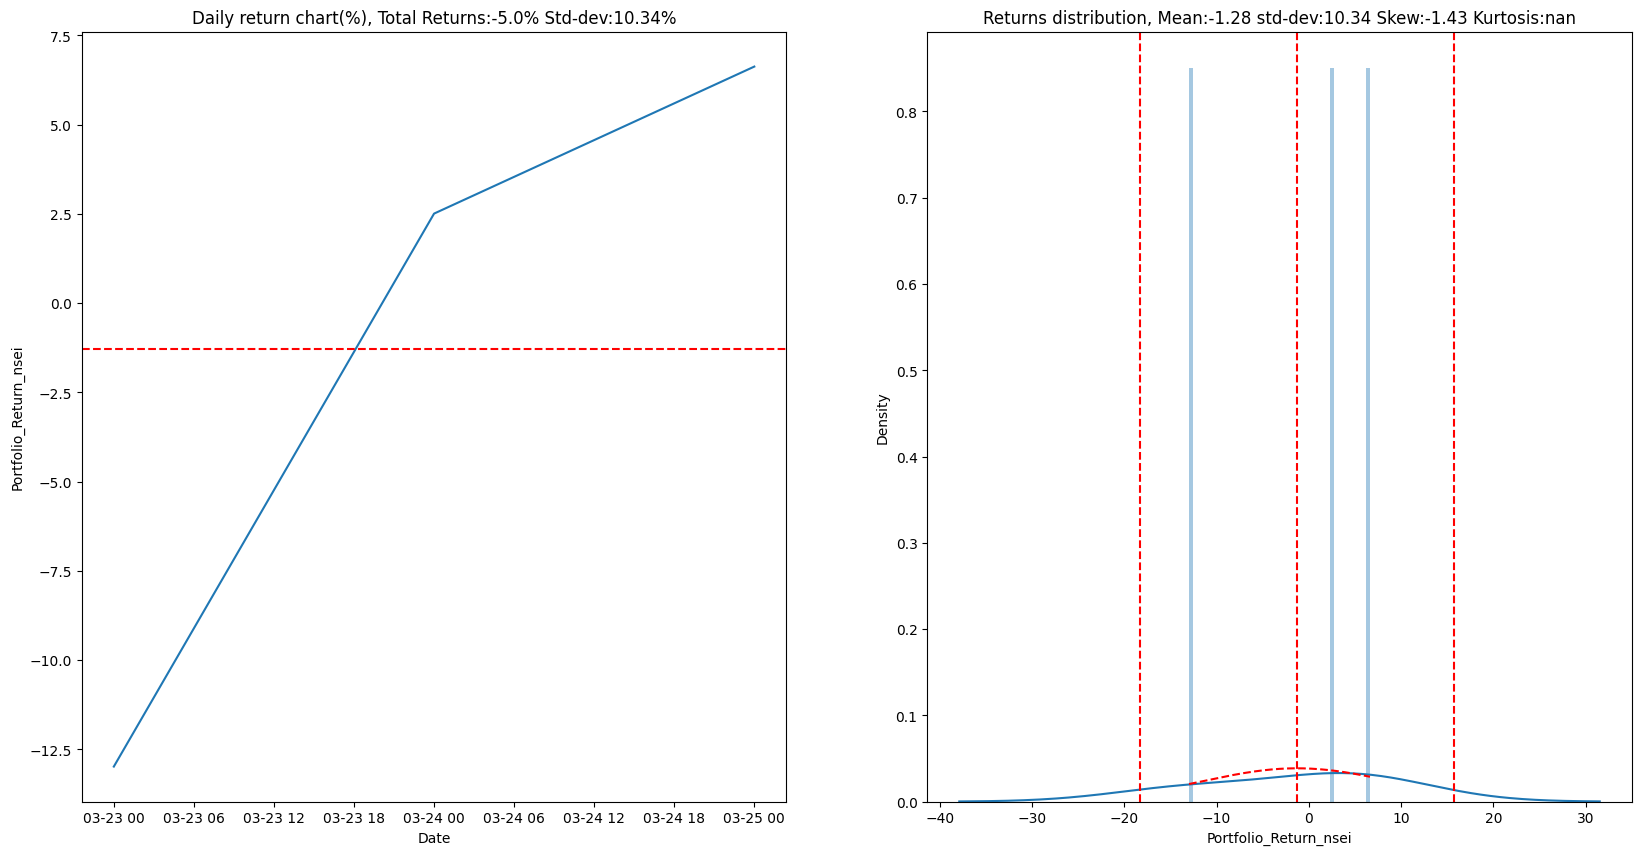

In [145]:
selected_return4_nsei=case4_nsei.set_index('Date')
plot_dist(selected_return4_nsei)

#### CASE 5

In [146]:
case5_nsei= selected_returns_dataframe(filtered_dates5)
case5_nsei.head()

Date  Portfolio_Return_nsei
0 2010-02-10              -0.007397
1 2010-02-11               0.014641
2 2010-02-17               0.018055
3 2010-02-18              -0.005342
4 2010-02-19              -0.008767

In [147]:
filt_case5_nsei= filtered_return_dataframe(case5_nsei)
filt_case5_nsei.head()

DateTime     ^NSEI
0 2009-01-05  0.024518
1 2009-01-06 -0.002771
2 2009-01-07 -0.061809
3 2009-01-09 -0.016231
4 2009-01-12 -0.034772

In [148]:
# cumulative product of return which is not satisfied the condition 5
filt_case5_nsei=filt_case5_nsei.set_index('DateTime')
filt_case5_nsei_cumpro=(1+filt_case5_nsei).cumprod()
filt_case5_nsei_cumpro.head()

^NSEI
DateTime            
2009-01-05  1.024518
2009-01-06  1.021679
2009-01-07  0.958530
2009-01-09  0.942972
2009-01-12  0.910183

<Axes: ylabel='Frequency'>

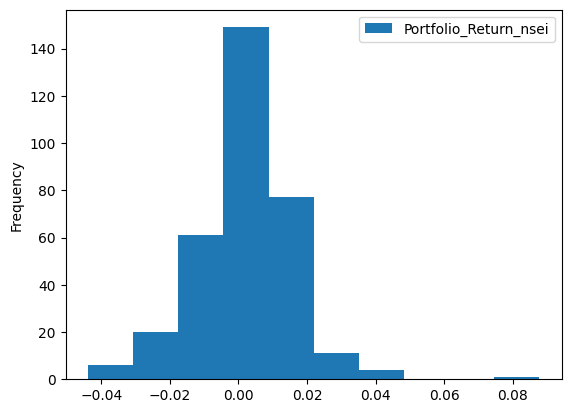

In [149]:
# Histogram of nsei
case5_nsei.plot.hist()

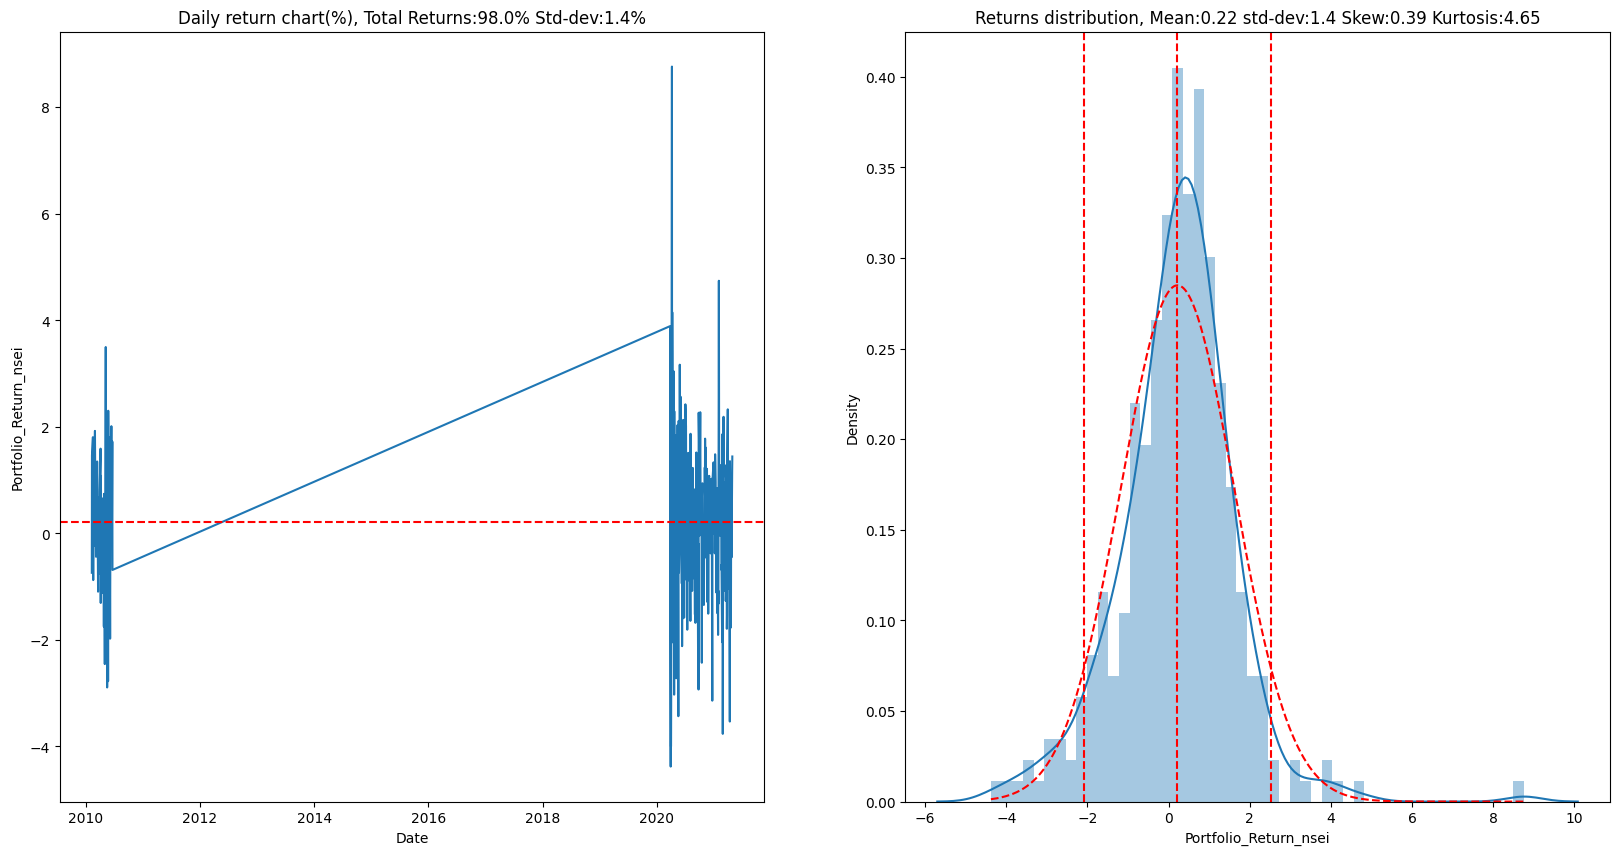

In [150]:
selected_return5_nsei=case5_nsei.set_index('Date')
plot_dist(selected_return5_nsei)

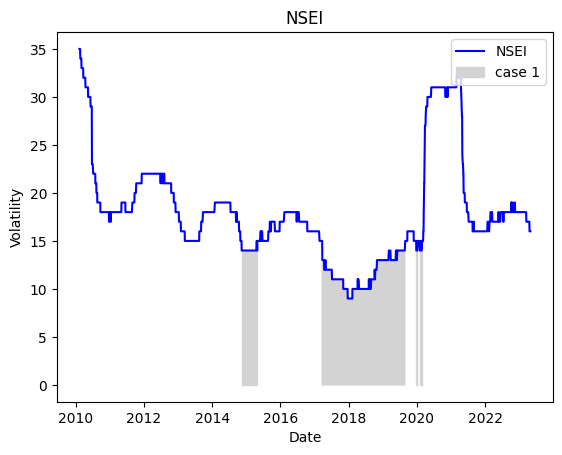

In [151]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^NSEI'], color='blue', label='NSEI')


# Create a mask for the condition
mask1 = (ann_vol_portfolio['^NSEI'] < 15) & (ann_vol_portfolio['^NSEI'].diff() <10)

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^NSEI'], where=mask1, color='lightgray',label='case 1')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('NSEI')
ax.legend(loc='upper right')

# Show the plot
plt.show()

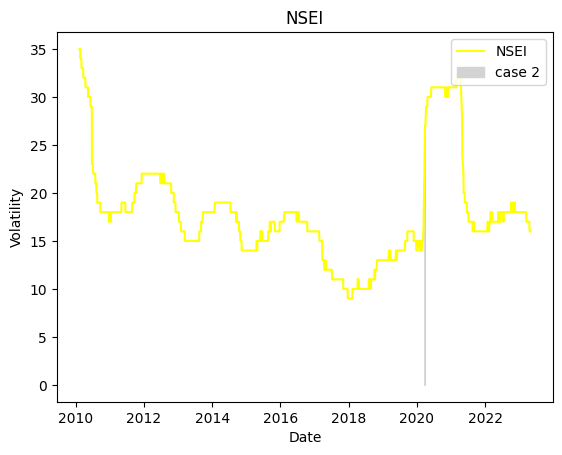

In [152]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^NSEI'], color='yellow', label='NSEI')


# Create a mask for the condition
mask2 = (((27 > ann_vol_portfolio['^NSEI']) & (ann_vol_portfolio['^NSEI'] >= 25)) | ((15 > ann_vol_portfolio['^NSEI'].diff()) & (ann_vol_portfolio['^NSEI'].diff() > 10)))

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^NSEI'], where=mask2, color='lightgray',label='case 2')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('NSEI')
ax.legend(loc='upper right')

# Show the plot
plt.show()

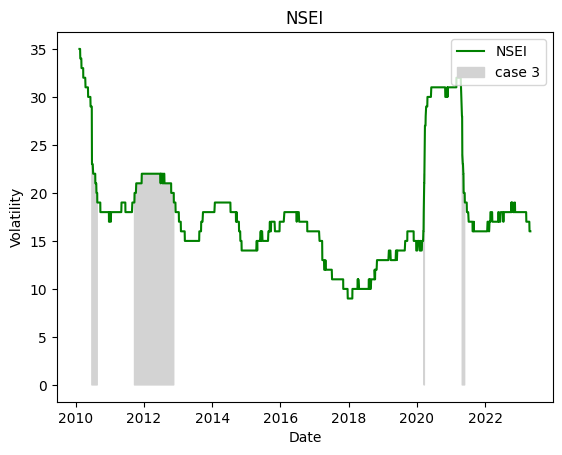

In [153]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^NSEI'], color='green', label='NSEI')


# Create a mask for the condition
mask3 = (((25 > ann_vol_portfolio['^NSEI']) & (ann_vol_portfolio['^NSEI'] >= 20)) | ((30 > ann_vol_portfolio['^NSEI'].diff()) & (ann_vol_portfolio['^NSEI'].diff() > 20)))

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^NSEI'], where=mask3, color='lightgray',label='case 3')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('NSEI')
ax.legend(loc='upper right')

# Show the plot
plt.show()

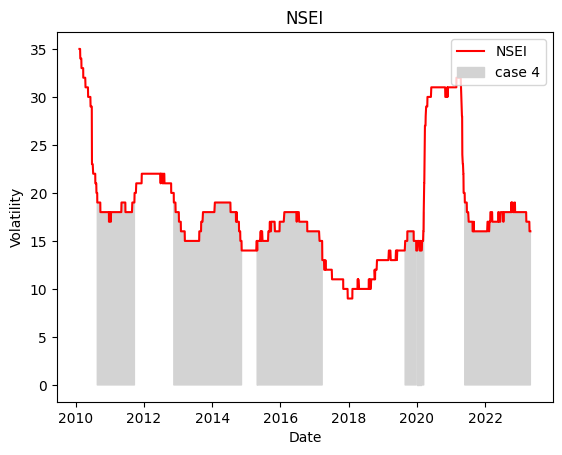

In [154]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^NSEI'], color='red', label='NSEI')


# Create a mask for the condition
mask4 = (((20 > ann_vol_portfolio['^NSEI']) & (ann_vol_portfolio['^NSEI'] >= 15)) | ((20 > ann_vol_portfolio['^NSEI'].diff()) & (ann_vol_portfolio['^NSEI'].diff() > 15)))

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^NSEI'], where=mask4, color='lightgray',label='case 4')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('NSEI')
ax.legend(loc='upper right')

# Show the plot
plt.show()

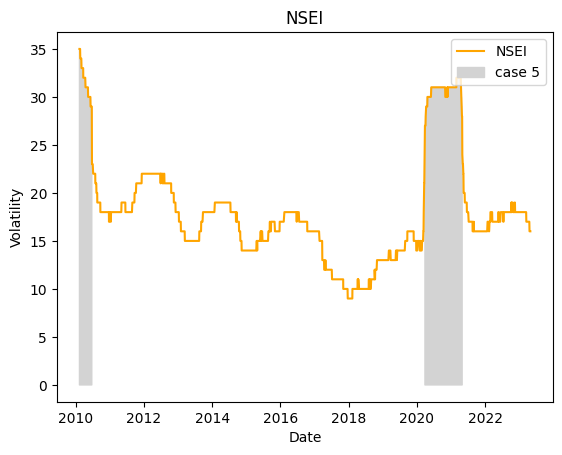

In [155]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['^NSEI'], color='orange', label='NSEI')


# Create a mask for the condition
mask5 = (ann_vol_portfolio['^NSEI'] >= 27) | (ann_vol_portfolio['^NSEI'].diff() > 25)

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['^NSEI'], where=mask5, color='lightgray',label='case 5')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('NSEI')
ax.legend(loc='upper right')

# Show the plot
plt.show()



## FOR GLD

In [156]:
#Plot distribution of series
def plot_dist(df):
    figure, axis = plt.subplots(1, 2)
    figure.set_figheight(10)
    figure.set_figwidth(20)
    mean,std,skew,kurt=price_parameters(df['Portfolio_Return_gld']*100)
    sns.lineplot(data=df['Portfolio_Return_gld']*100,ax=axis[0])
    axis[0].axhline(mean,color='r',ls='--')
    axis[0].set_title('Daily return chart(%), Total Returns:'+str(round(np.product(1+df['Portfolio_Return_gld'])-1,2)*100)+'% Std-dev:'+str(std)+'%')
    sns.distplot(df['Portfolio_Return_gld']*100,bins=50,ax=axis[1])
    x_axis=np.arange(min(df['Portfolio_Return_gld']*100),max(df['Portfolio_Return_gld']*100),0.0001)
    axis[1].axvline(mean,color='r',ls='--')
    axis[1].axvline(norm.ppf(0.05, loc=mean, scale=std),ls='--',color='r')
    axis[1].axvline(norm.ppf(0.95, loc=mean, scale=std),ls='--',color='r')
    axis[1].plot(x_axis,norm.pdf(x_axis, loc=mean, scale=std),ls='--',color='r')
    axis[1].set_title('Returns distribution, Mean:'+str(mean)+' std-dev:'+str(std)+' Skew:'+str(skew)+' Kurtosis:'+str(kurt))

In [157]:
filtered_dates1 = ann_vol_portfolio[((ann_vol_portfolio['^GSPC'] < 15) & (ann_vol_portfolio['^GSPC'].diff() <10))]['DateTime']
filtered_dates4  = ann_vol_portfolio[(((27 > ann_vol_portfolio['^GSPC']) & (ann_vol_portfolio['^GSPC'] >= 25)) | ((15 > ann_vol_portfolio['^GSPC'].diff()) & (ann_vol_portfolio['^GSPC'].diff() > 10)))]['DateTime']
filtered_dates3  = ann_vol_portfolio[(((25 > ann_vol_portfolio['^GSPC']) & (ann_vol_portfolio['^GSPC'] >= 20)) | ((30 > ann_vol_portfolio['^GSPC'].diff()) & (ann_vol_portfolio['^GSPC'].diff() > 20)))]['DateTime']
filtered_dates2  = ann_vol_portfolio[(((20 > ann_vol_portfolio['^GSPC']) & (ann_vol_portfolio['^GSPC'] >= 15)) | ((20 > ann_vol_portfolio['^GSPC'].diff()) & (ann_vol_portfolio['^GSPC'].diff() > 15)))]['DateTime']
filtered_dates5  = ann_vol_portfolio[((ann_vol_portfolio['^GSPC']  >=  27) | (ann_vol_portfolio['^GSPC'].diff() >25))]['DateTime']

In [158]:
# Dates fullfilling the condition
def selected_returns_dataframe(filtered_dates):
  selected_returns = []
  for date in filtered_dates:
    return_value = return_multiData.loc[return_multiData['DateTime'] == date, 'GLD'].values
    if len(return_value) > 0:
        selected_returns.append((date, return_value[0]))

  selected_return=pd.DataFrame(selected_returns)
  selected_return.set_axis(['Date', 'Portfolio_Return_gld'], axis=1, inplace=True)
  return selected_return

#### CASE 1

In [159]:
case1_gld=selected_returns_dataframe(filtered_dates1)
case1_gld.head()

Date  Portfolio_Return_gld
0 2013-01-23             -0.002810
1 2013-01-24             -0.010968
2 2013-01-25             -0.004770
3 2013-01-29              0.002116
4 2013-01-30              0.007454

<Axes: ylabel='Frequency'>

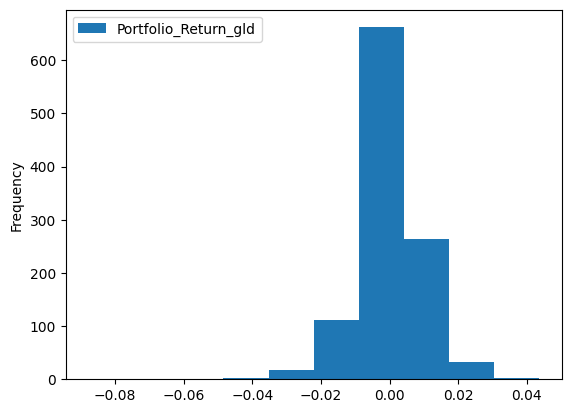

In [160]:
case1_gld.plot.hist()

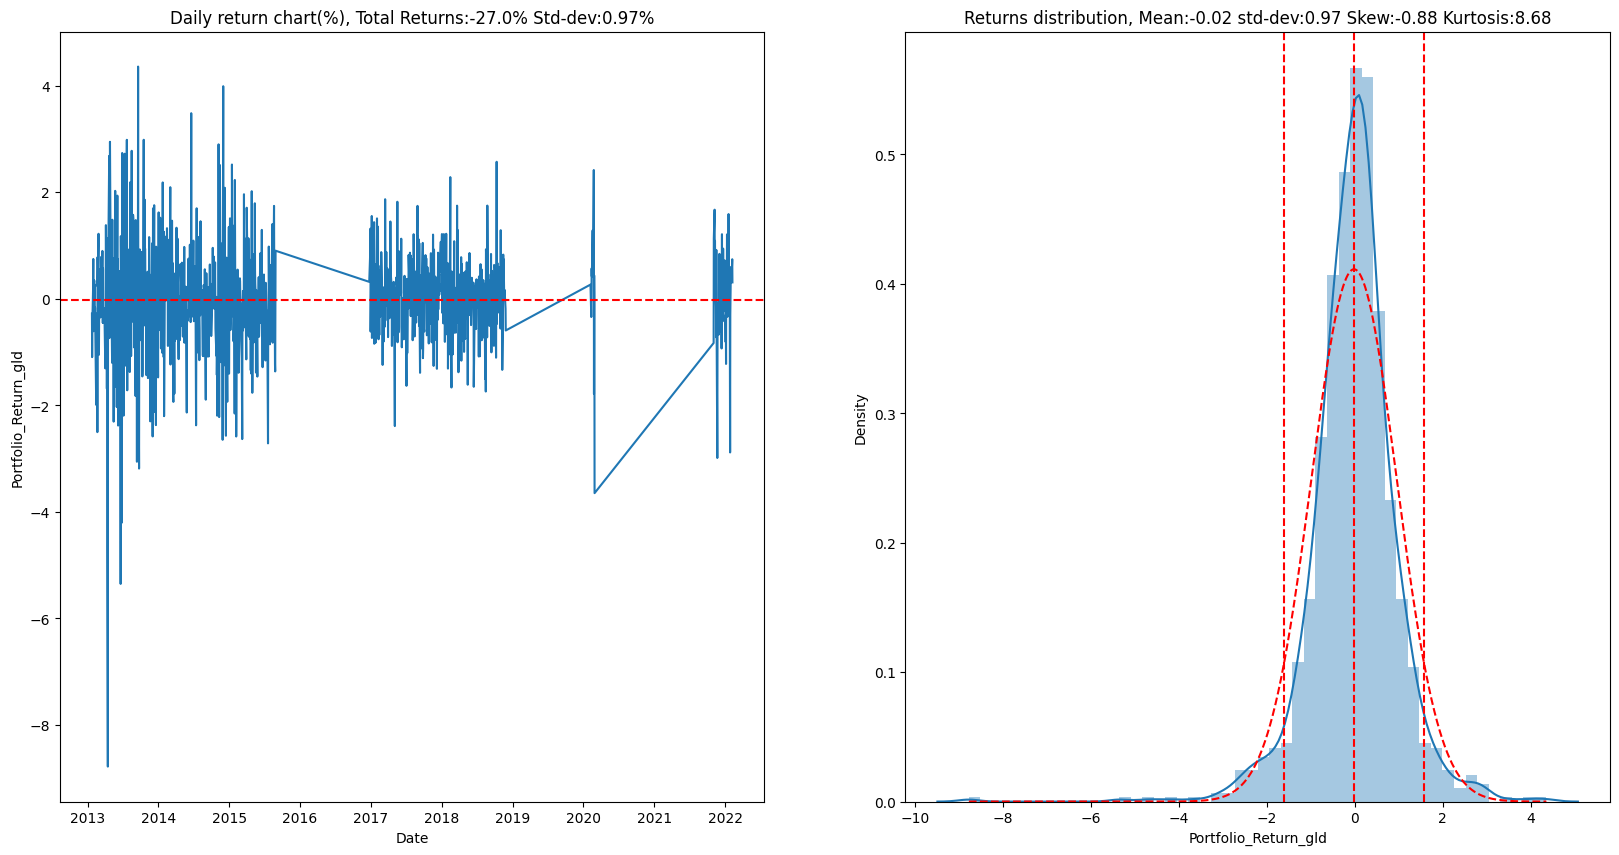

In [161]:
selected_return1_gld=case1_gld.set_index('Date')
plot_dist(selected_return1_gld)

#### *CASE* 2

In [162]:
case2_gld= selected_returns_dataframe(filtered_dates2)
case2_gld.head()

Date  Portfolio_Return_gld
0 2010-06-23             -0.004117
1 2010-06-28             -0.013604
2 2010-07-02             -0.026216
3 2010-07-06             -0.016710
4 2010-07-07              0.010471

<Axes: ylabel='Frequency'>

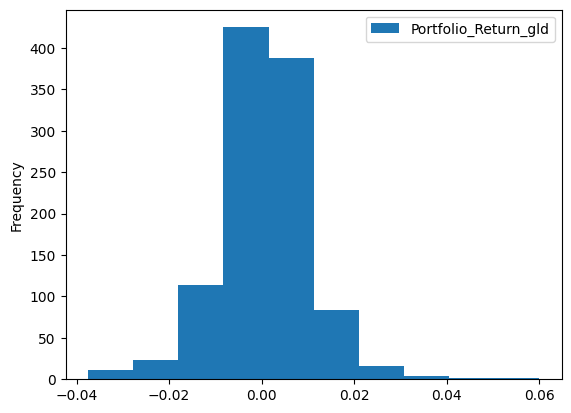

In [163]:
# Histogram of gld
case2_gld.plot.hist()

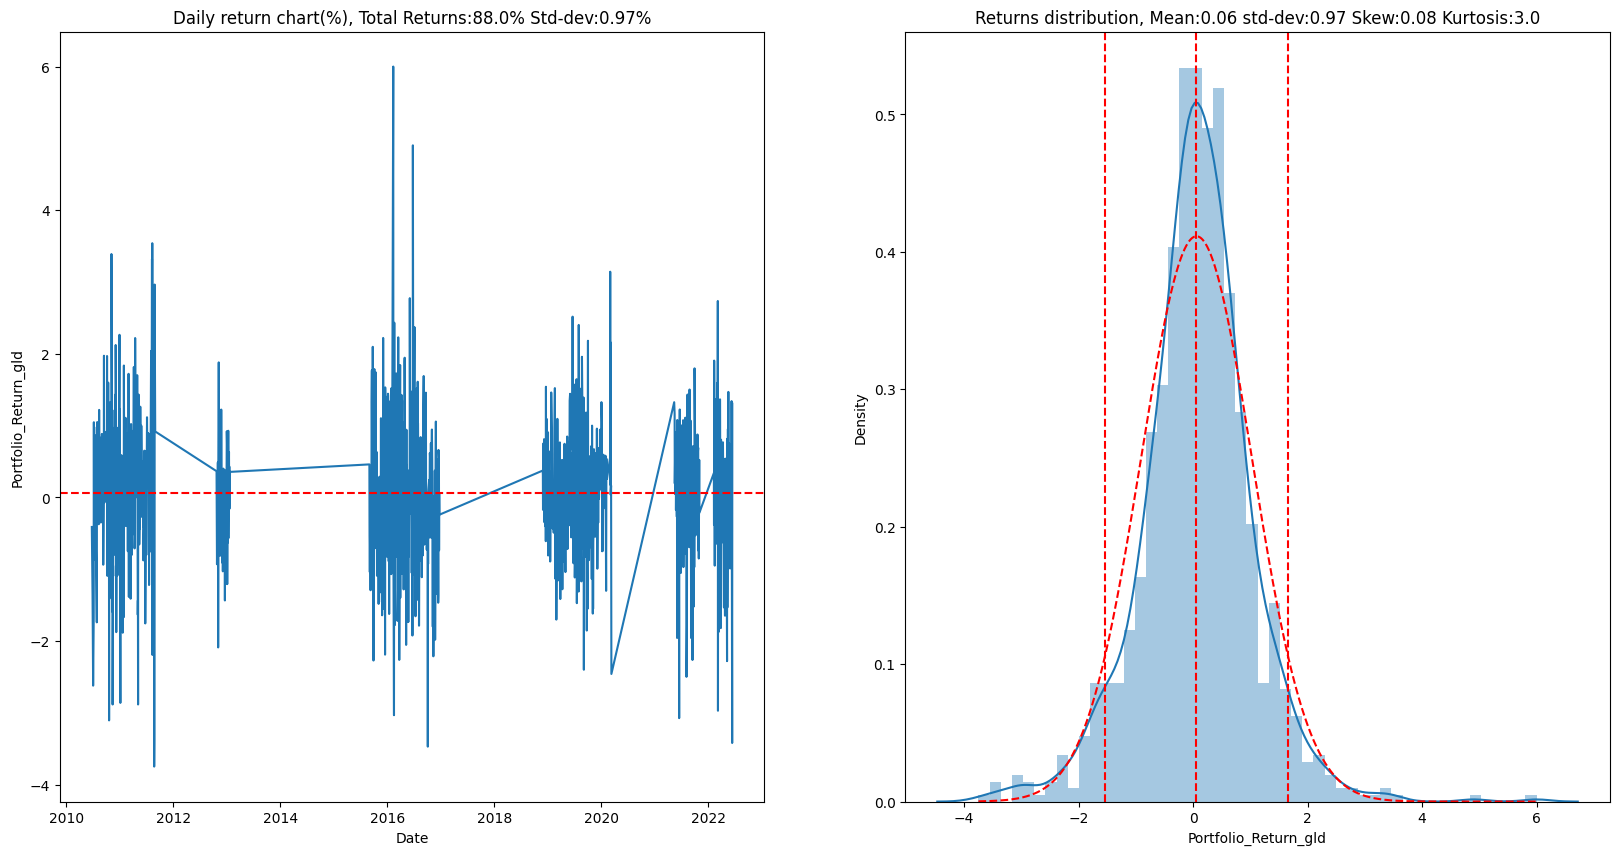

In [164]:
selected_return2_gld=case2_gld.set_index('Date')
plot_dist(selected_return2_gld)

#### CASE 3

In [165]:
case3_gld= selected_returns_dataframe(filtered_dates3)
case3_gld.head()

Date  Portfolio_Return_gld
0 2010-04-09              0.008788
1 2010-04-12             -0.005544
2 2010-04-13             -0.002832
3 2010-04-15              0.008519
4 2010-04-16             -0.021205

<Axes: ylabel='Frequency'>

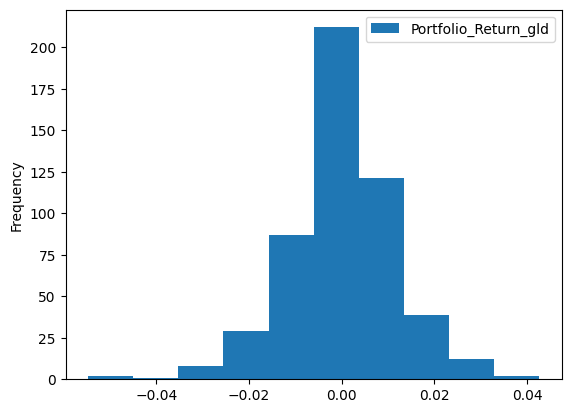

In [166]:
# Histogram of gld
case3_gld.plot.hist()

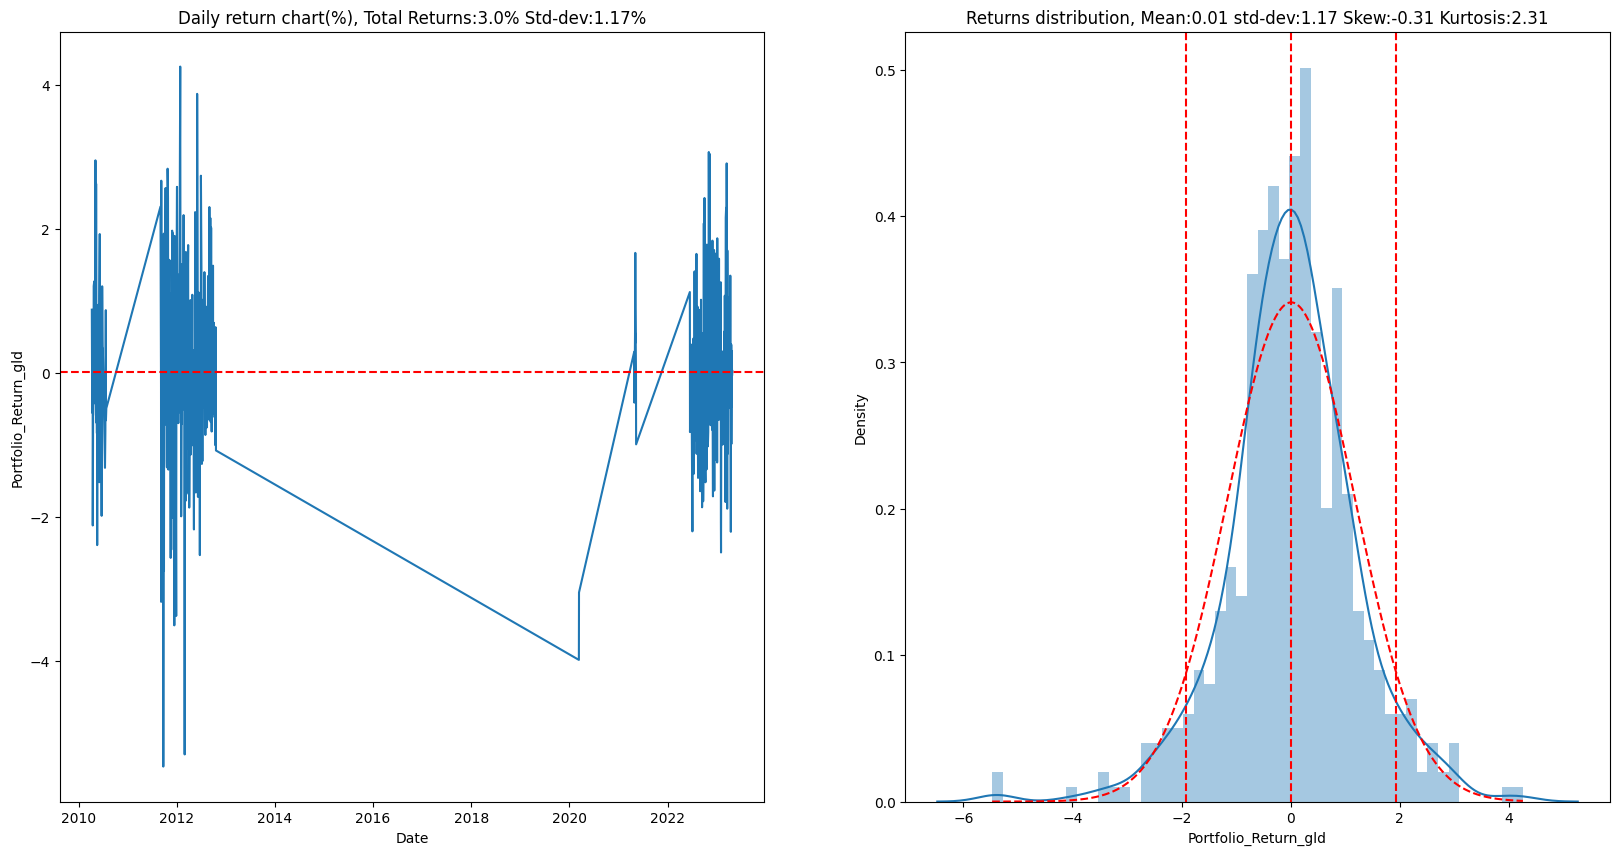

In [167]:
selected_return3_gld=case3_gld.set_index('Date')
plot_dist(selected_return3_gld)

#### CASE 4

In [168]:
case4_gld= selected_returns_dataframe(filtered_dates4)
case4_gld.head()

Date  Portfolio_Return_gld
0 2010-03-03              0.005495
1 2010-03-04             -0.007166
2 2010-03-05             -0.000180
3 2010-03-08             -0.008393
4 2010-03-09             -0.001456

<Axes: ylabel='Frequency'>

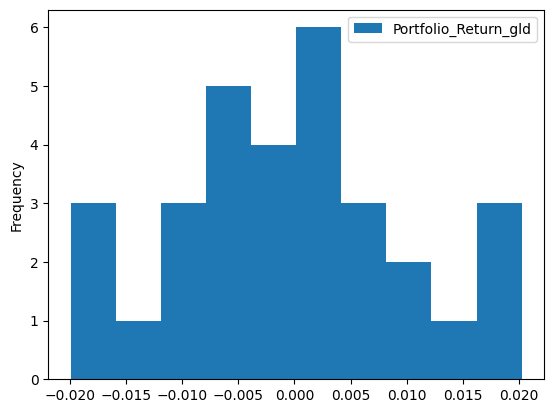

In [169]:
# Histogram of gld
case4_gld.plot.hist()

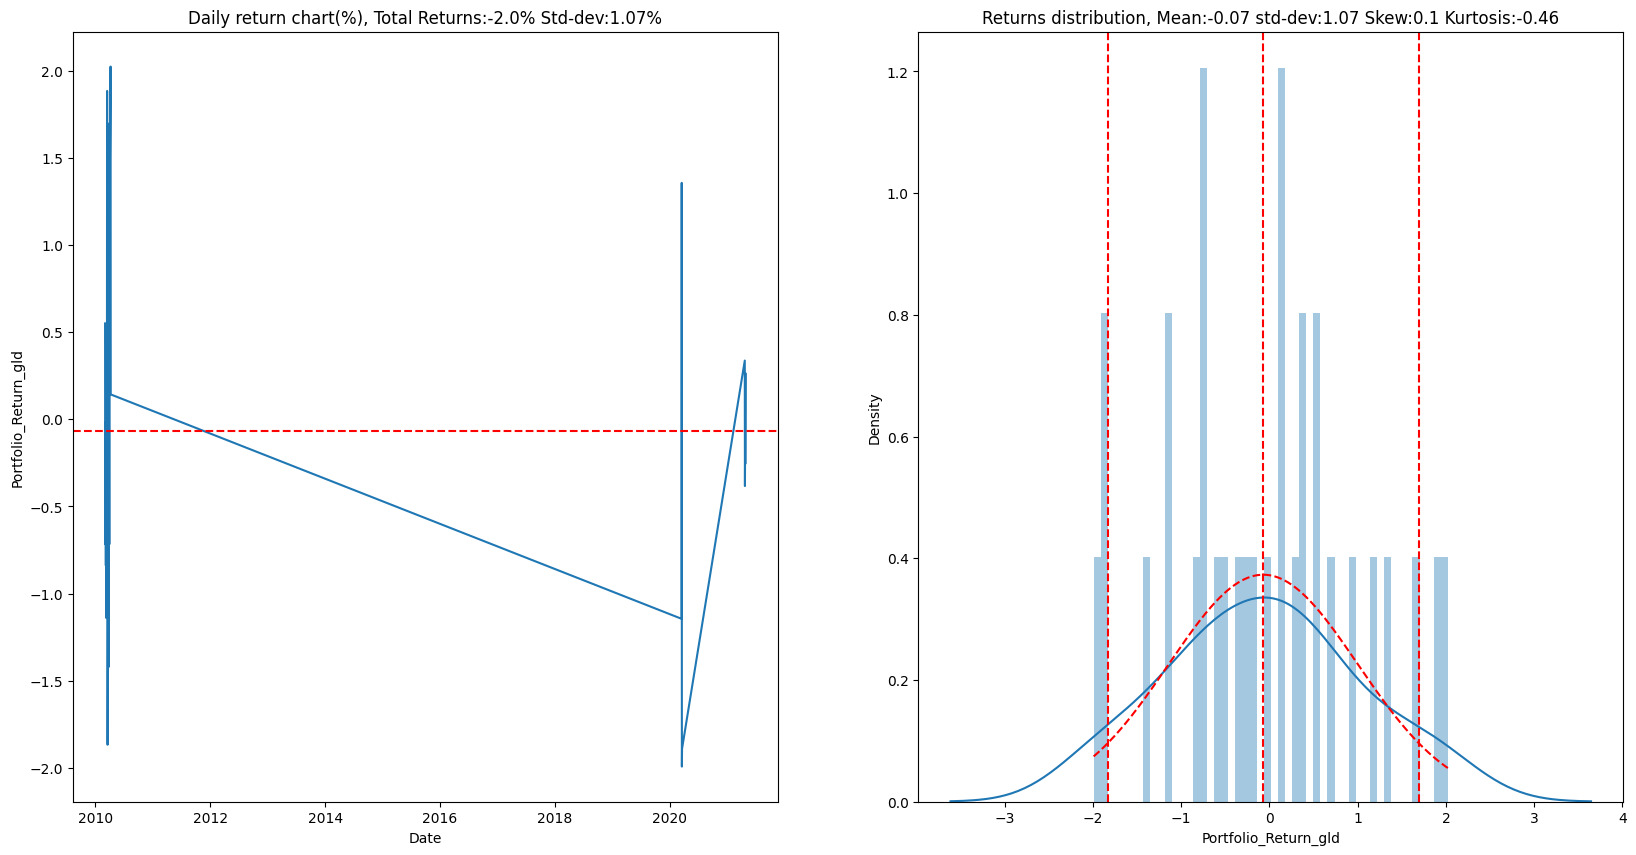

In [170]:
selected_return4_gld=case4_gld.set_index('Date')
plot_dist(selected_return4_gld)

#### CASE 5

In [171]:
case5_gld= selected_returns_dataframe(filtered_dates5)
case5_gld.head()

Date  Portfolio_Return_gld
0 2010-02-10             -0.002751
1 2010-02-11              0.019121
2 2010-02-17              0.019789
3 2010-02-18              0.006682
4 2010-02-19             -0.004637

<Axes: ylabel='Frequency'>

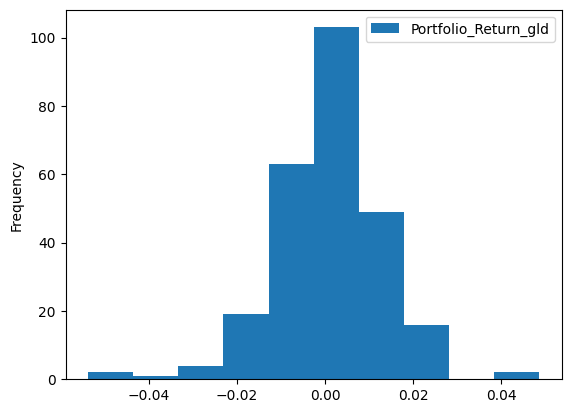

In [172]:
# Histogram of gld
case5_gld.plot.hist()

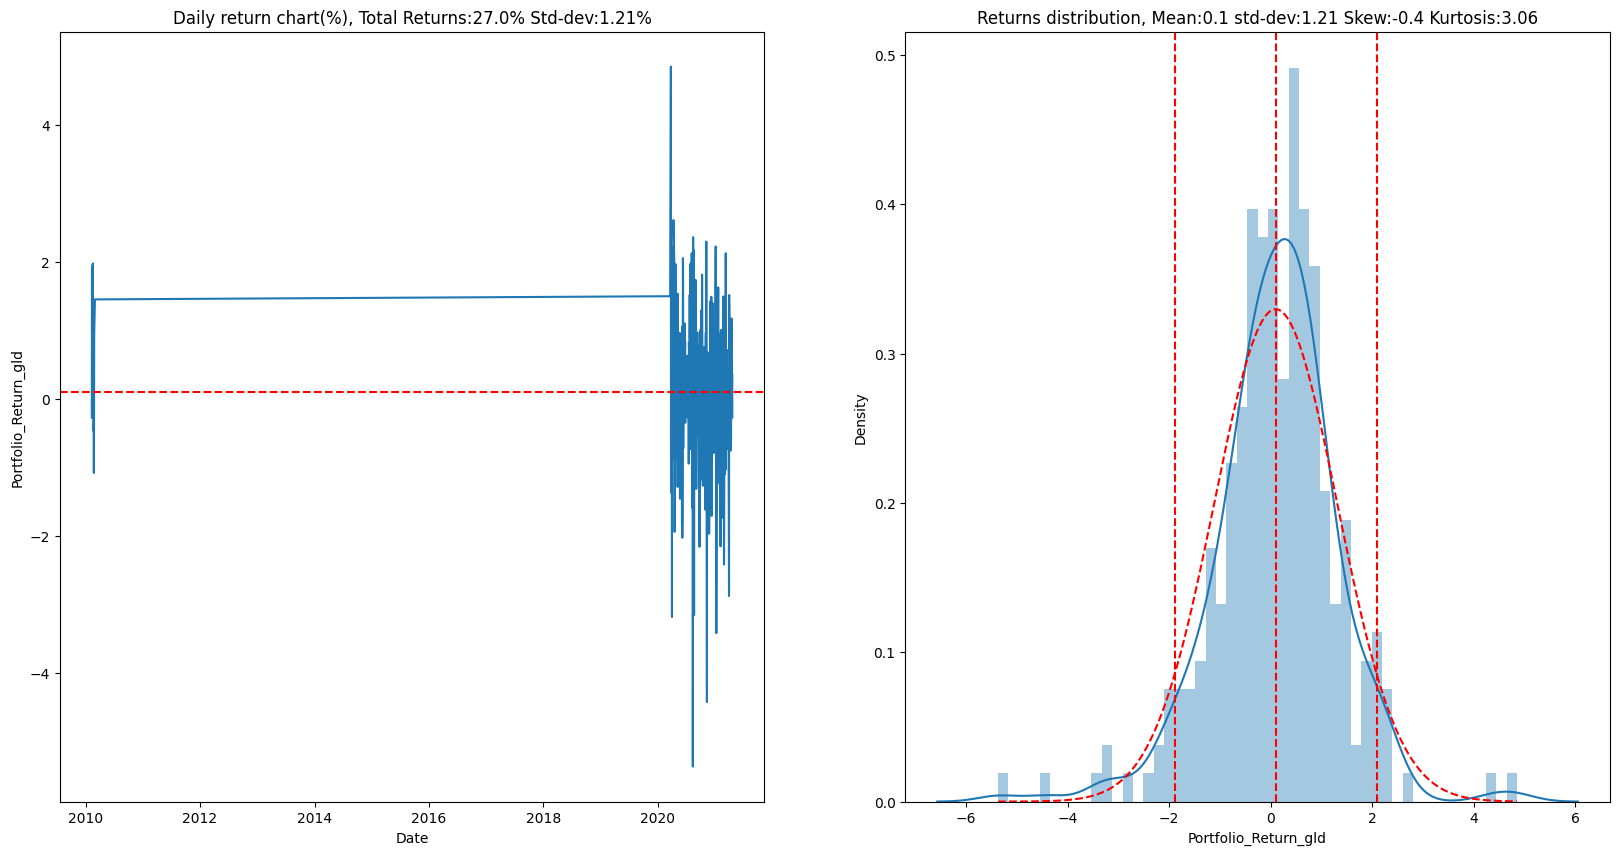

In [173]:
selected_return5_gld=case5_gld.set_index('Date')
plot_dist(selected_return5_gld)

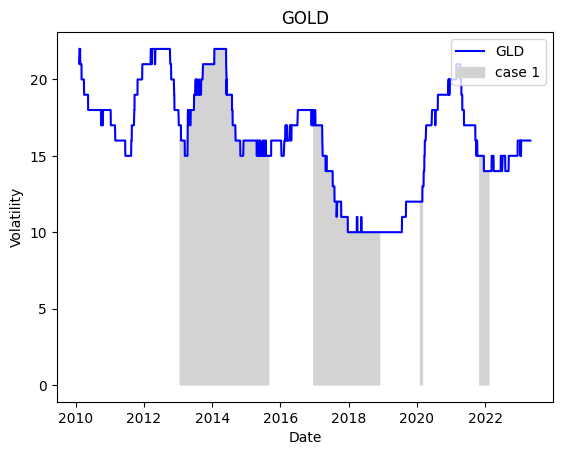

In [174]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['GLD'], color='blue', label='GLD')


# Create a mask for the condition
mask1 = (ann_vol_portfolio['^GSPC'] < 15) & (ann_vol_portfolio['^GSPC'].diff() <10)

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['GLD'], where=mask1, color='lightgray',label='case 1')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('GOLD')
ax.legend(loc='upper right')

# Show the plot
plt.show()

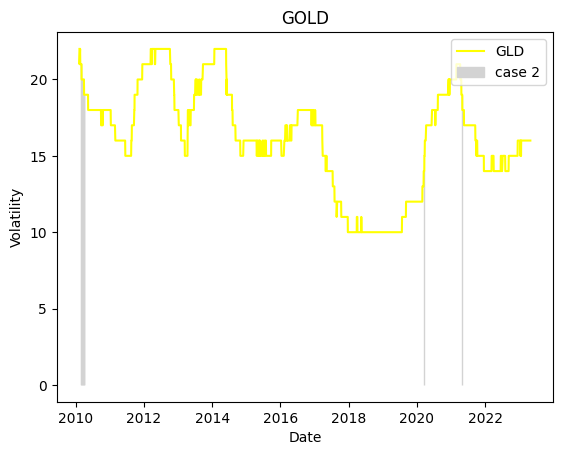

In [175]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['GLD'], color='yellow', label='GLD')


# Create a mask for the condition
mask2 = (((27 > ann_vol_portfolio['^GSPC']) & (ann_vol_portfolio['^GSPC'] >= 25)) | ((15 > ann_vol_portfolio['^GSPC'].diff()) & (ann_vol_portfolio['^GSPC'].diff() > 10)))

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['GLD'], where=mask2, color='lightgray',label='case 2')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('GOLD')
ax.legend(loc='upper right')

# Show the plot
plt.show()

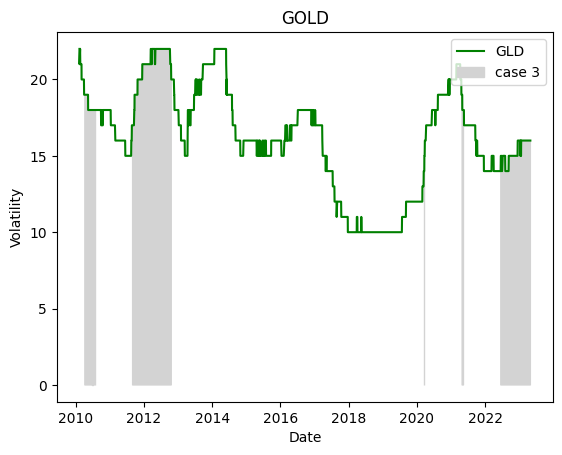

In [176]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['GLD'], color='green', label='GLD')


# Create a mask for the condition
mask3 = (((25 > ann_vol_portfolio['^GSPC']) & (ann_vol_portfolio['^GSPC'] >= 20)) | ((30 > ann_vol_portfolio['^GSPC'].diff()) & (ann_vol_portfolio['^GSPC'].diff() > 20)))

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['GLD'], where=mask3, color='lightgray',label='case 3')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('GOLD')
ax.legend(loc='upper right')

# Show the plot
plt.show()

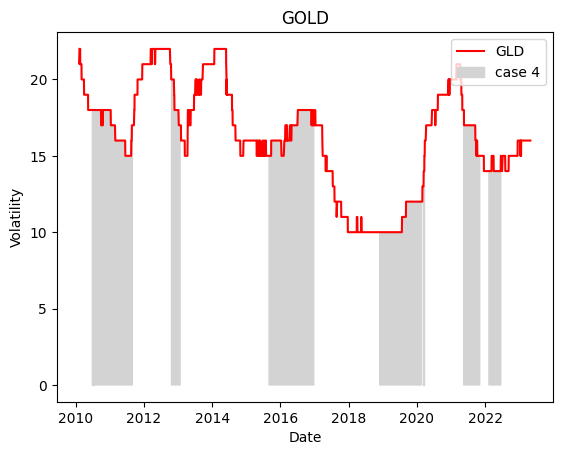

In [177]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['GLD'], color='red', label='GLD')


# Create a mask for the condition
mask4 = (((20 > ann_vol_portfolio['^GSPC']) & (ann_vol_portfolio['^GSPC'] >= 15)) | ((20 > ann_vol_portfolio['^GSPC'].diff()) & (ann_vol_portfolio['^GSPC'].diff() > 15)))

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['GLD'], where=mask4, color='lightgray',label='case 4')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('GOLD')
ax.legend(loc='upper right')

# Show the plot
plt.show()

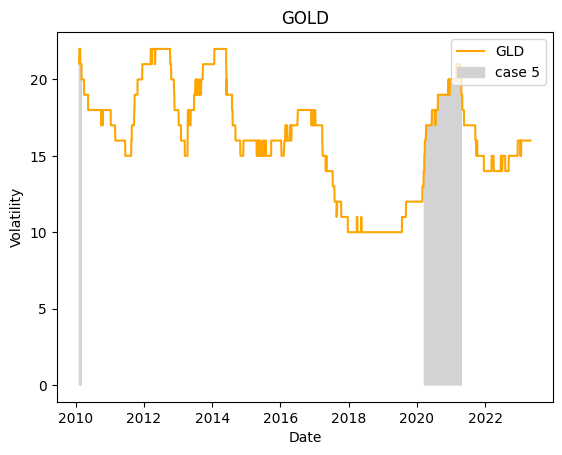

In [178]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(ann_vol_portfolio['DateTime'],ann_vol_portfolio['GLD'], color='orange', label='GLD')


# Create a mask for the condition
mask5 = (ann_vol_portfolio['^GSPC'] >= 27) | (ann_vol_portfolio['^GSPC'].diff() > 25)

# Shade the regions where the condition is met
ax.fill_between(ann_vol_portfolio['DateTime'], ann_vol_portfolio['GLD'], where=mask5, color='lightgray',label='case 5')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('GOLD')
ax.legend(loc='upper right')

# Show the plot
plt.show()



# BOND DATA

In [179]:
from google.colab import files
uploaded = files.upload()

Saving China 10-Year Bond Yield Historical Data.csv to China 10-Year Bond Yield Historical Data.csv
Saving India 10-Year Bond Yield Historical Data.csv to India 10-Year Bond Yield Historical Data.csv
Saving United Kingdom 10-Year Bond Yield Historical Data.csv to United Kingdom 10-Year Bond Yield Historical Data.csv
Saving United States 10-Year Bond Yield Historical Data.csv to United States 10-Year Bond Yield Historical Data.csv


In [180]:
df_data_us=pd.read_csv('United States 10-Year Bond Yield Historical Data.csv')
df_data_ind=pd.read_csv('India 10-Year Bond Yield Historical Data.csv')
df_data_chi=pd.read_csv('China 10-Year Bond Yield Historical Data.csv')
df_data_uk=pd.read_csv('United Kingdom 10-Year Bond Yield Historical Data.csv')


In [181]:
df_data_us=df_data_us.set_index('Date')
df_data_chi=df_data_chi.set_index('Date')
df_data_ind=df_data_ind.set_index('Date')
df_data_uk=df_data_uk.set_index('Date')


In [182]:
df_bond=pd.DataFrame()
df_bond['US_Price']=df_data_us['Price']
df_bond['IN_Price']=df_data_ind['Price']
df_bond['UK_Price']=df_data_uk['Price']

df_bond['CHI_Price']=df_data_chi['Price']

df_bond.head()

US_Price  IN_Price  UK_Price  CHI_Price
Date                                               
01/05/2023     3.722     7.327     3.552      2.870
01/04/2023     3.690     7.321     3.493      2.863
01/03/2023     3.752     7.321     3.653      2.873
01/02/2023     3.879     7.340     3.699        NaN
12/30/2022     3.879     7.327     3.669      2.884

In [183]:
df_bond=df_bond.reset_index()
df_bond

Date  US_Price  IN_Price  UK_Price  CHI_Price
0     01/05/2023     3.722     7.327     3.552      2.870
1     01/04/2023     3.690     7.321     3.493      2.863
2     01/03/2023     3.752     7.321     3.653      2.873
3     01/02/2023     3.879     7.340     3.699        NaN
4     12/30/2022     3.879     7.327     3.669      2.884
...          ...       ...       ...       ...        ...
2617  01/08/2013     1.864     7.906     2.030      3.600
2618  01/07/2013     1.901     7.900     2.086      3.590
2619  01/04/2013     1.903     7.930     2.117      3.610
2620  01/03/2013     1.911     7.967     2.073        NaN
2621  01/02/2013     1.835     7.993     1.988        NaN

[2622 rows x 5 columns]

In [184]:
df_bond['Date'] = pd.to_datetime(df_bond['Date'], infer_datetime_format=True)
df_bond=df_bond.set_index('Date')
df_bond


US_Price  IN_Price  UK_Price  CHI_Price
Date                                               
2023-01-05     3.722     7.327     3.552      2.870
2023-01-04     3.690     7.321     3.493      2.863
2023-01-03     3.752     7.321     3.653      2.873
2023-01-02     3.879     7.340     3.699        NaN
2022-12-30     3.879     7.327     3.669      2.884
...              ...       ...       ...        ...
2013-01-08     1.864     7.906     2.030      3.600
2013-01-07     1.901     7.900     2.086      3.590
2013-01-04     1.903     7.930     2.117      3.610
2013-01-03     1.911     7.967     2.073        NaN
2013-01-02     1.835     7.993     1.988        NaN

[2622 rows x 4 columns]

In [185]:
df_bond=df_bond.dropna()
df_bond.head()

US_Price  IN_Price  UK_Price  CHI_Price
Date                                               
2023-01-05     3.722     7.327     3.552      2.870
2023-01-04     3.690     7.321     3.493      2.863
2023-01-03     3.752     7.321     3.653      2.873
2022-12-30     3.879     7.327     3.669      2.884
2022-12-29     3.820     7.311     3.661      2.882

In [186]:
df_bond_return=df_bond.pct_change()
df_bond_return.fillna(0, inplace=True)
df_bond_return.head()

US_Price  IN_Price  UK_Price  CHI_Price
Date                                               
2023-01-05  0.000000  0.000000  0.000000   0.000000
2023-01-04 -0.008598 -0.000819 -0.016610  -0.002439
2023-01-03  0.016802  0.000000  0.045806   0.003493
2022-12-30  0.033849  0.000820  0.004380   0.003829
2022-12-29 -0.015210 -0.002184 -0.002180  -0.000693

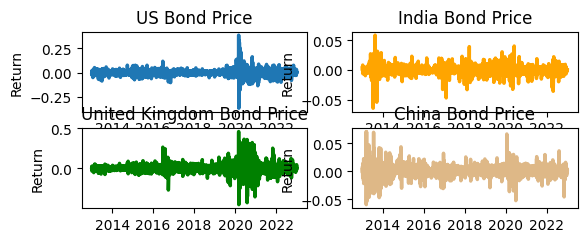

In [187]:
ax1 = plt.subplot(4,2,1)
ax2 = plt.subplot(4,2,2)
ax3 = plt.subplot(4,2,3)
ax4 = plt.subplot(4,2,4)



ax1.plot(df_bond_return['US_Price'], linewidth = 2.5)
ax1.set_ylabel('Return')
ax1.set_title('US Bond Price')

ax2.plot(df_bond_return['IN_Price'], color = 'orange', linewidth = 2.5)
ax2.set_ylabel('Return')
ax2.set_title('India Bond Price')

ax3.plot(df_bond_return['UK_Price'], color = 'green', linewidth = 2.5)
ax3.set_ylabel('Return')
ax3.set_title('United Kingdom Bond Price')



ax4.plot(df_bond_return['CHI_Price'], color = '#DEB887', linewidth = 2.5)
ax4.set_ylabel('Return')
ax4.set_title('China Bond Price')


plt.show()

In [188]:
df_bond_return=df_bond_return.reset_index()
df_bond_return.head()

Date  US_Price  IN_Price  UK_Price  CHI_Price
0 2023-01-05  0.000000  0.000000  0.000000   0.000000
1 2023-01-04 -0.008598 -0.000819 -0.016610  -0.002439
2 2023-01-03  0.016802  0.000000  0.045806   0.003493
3 2022-12-30  0.033849  0.000820  0.004380   0.003829
4 2022-12-29 -0.015210 -0.002184 -0.002180  -0.000693

In [189]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index,
       the previous peaks, and
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index,
                         "Previous Peak": previous_peaks,
                         "Drawdown": drawdowns})

## FOR UK BOND

In [190]:
filtered_dates1 = ann_vol_portfolio[((ann_vol_portfolio['^FTSE'] < 15) & (ann_vol_portfolio['^FTSE'].diff() <10))]['DateTime']
filtered_dates4  = ann_vol_portfolio[(((27 > ann_vol_portfolio['^FTSE']) & (ann_vol_portfolio['^FTSE'] >= 25)) | ((15 > ann_vol_portfolio['^FTSE'].diff()) & (ann_vol_portfolio['^FTSE'].diff() > 10)))]['DateTime']
filtered_dates3  = ann_vol_portfolio[(((25 > ann_vol_portfolio['^FTSE']) & (ann_vol_portfolio['^FTSE'] >= 20)) | ((30 > ann_vol_portfolio['^FTSE'].diff()) & (ann_vol_portfolio['^FTSE'].diff() > 20)))]['DateTime']
filtered_dates2  = ann_vol_portfolio[(((20 > ann_vol_portfolio['^FTSE']) & (ann_vol_portfolio['^FTSE'] >= 15)) | ((20 > ann_vol_portfolio['^FTSE'].diff()) & (ann_vol_portfolio['^FTSE'].diff() > 15)))]['DateTime']
filtered_dates5  = ann_vol_portfolio[((ann_vol_portfolio['^FTSE']  >=  27) | (ann_vol_portfolio['^FTSE'].diff() >25))]['DateTime']

In [191]:
# Dates fullfilling the condition
def selected_returns_dataframe(filtered_dates):
  selected_returns = []
  for date in filtered_dates:
    return_value = df_bond_return.loc[df_bond_return['Date'] == date, 'UK_Price'].values
    if len(return_value) > 0:
        selected_returns.append((date, return_value[0]))

  selected_return=pd.DataFrame(selected_returns)
  selected_return.set_axis(['Date', 'Portfolio_Return_uk_bond'], axis=1, inplace=True)
  return selected_return

In [192]:
# Define weights
wts_c1 = [0.9, 0.1]
wts_c2 = [0.8, 0.2]
wts_c3 = [0.7, 0.3]
wts_c4 = [0.6, 0.4]
wts_c5 = [0.1, 0.9]
wts_b = [1, 0]

#### CASE 1

In [193]:
case1_uk=selected_returns_dataframe(filtered_dates1)
case1_uk.head()

Date  Portfolio_Return_uk_bond
0 2013-02-22                  0.014897
1 2013-02-25                  0.042585
2 2013-03-01                 -0.019916
3 2013-03-04                 -0.027523
4 2013-03-06                 -0.028798

<Axes: ylabel='Frequency'>

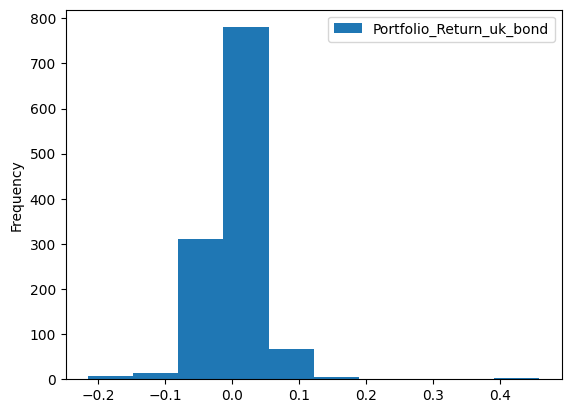

In [194]:
# Histogram of bond
case1_uk.plot.hist()

Text(0, 0.5, 'Return')

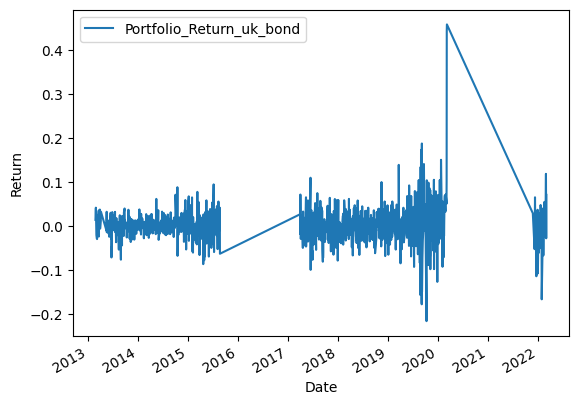

In [195]:
selected_returns_bond_uk=case1_uk.set_index('Date')
selected_returns_bond_uk.plot()
plt.ylabel('Return')

In [196]:
case1_ftse=case1_ftse.set_index('Date')
case1_uk=case1_uk.set_index('Date')

In [197]:
case1_data_uk_ftse = case1_ftse.join(case1_uk, how='inner')
case1_data_uk_ftse.head()

Portfolio_Return_ftse  Portfolio_Return_uk_bond
Date                                                       
2013-02-22               0.007025                  0.014897
2013-02-25               0.003109                  0.042585
2013-03-01               0.002798                 -0.019916
2013-03-04              -0.005174                 -0.027523
2013-03-06              -0.000684                 -0.028798

Text(0, 0.5, 'Cumulative Return')

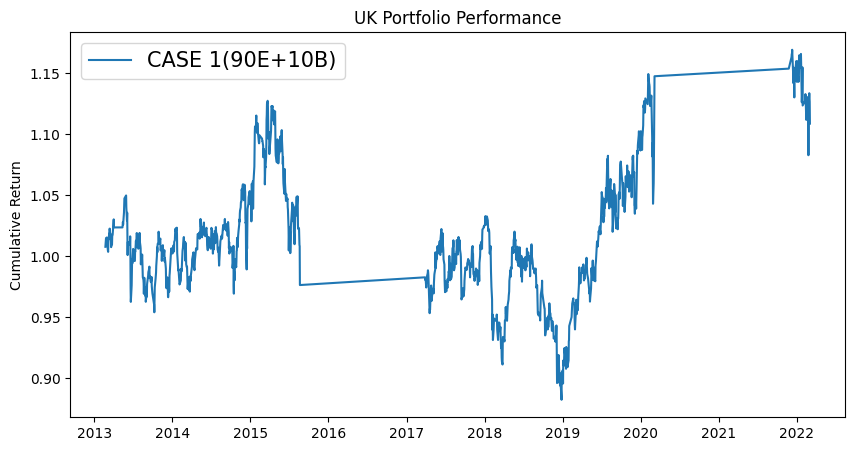

In [198]:
# UK
weighted_return_c1_uk = (wts_c1 * case1_data_uk_ftse)


#Cumulative Portfolio UK
portfolio_return_c1_uk = weighted_return_c1_uk.sum(axis=1)
cumprod_portfolio_c1_uk = (1 + portfolio_return_c1_uk).cumprod()


#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c1_uk, label='CASE 1(90E+10B)')

plt.legend(loc='upper left', fontsize=15)
plt.title("UK Portfolio Performance")
plt.ylabel('Cumulative Return')

#### CASE 2

In [199]:
case2_uk=selected_returns_dataframe(filtered_dates2)
case2_uk.head()

Date  Portfolio_Return_uk_bond
0 2013-01-04                  0.014861
1 2013-01-07                  0.027586
2 2013-01-08                  0.002964
3 2013-01-09                 -0.034351
4 2013-01-10                  0.006241

<Axes: ylabel='Frequency'>

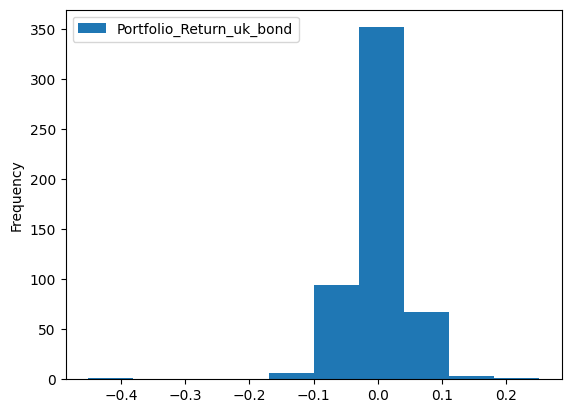

In [200]:
# Histogram of bond
case2_uk.plot.hist()

Text(0, 0.5, 'Return')

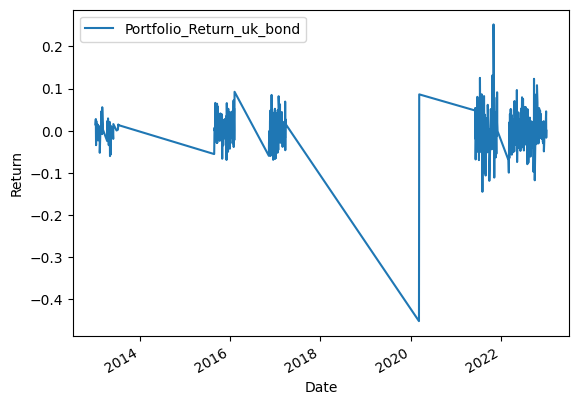

In [201]:
selected_returns_bond_uk=case2_uk.set_index('Date')
selected_returns_bond_uk.plot()
plt.ylabel('Return')

In [202]:
case2_ftse=case2_ftse.set_index('Date')
case2_uk=case2_uk.set_index('Date')

In [203]:
case2_data_uk_ftse = case2_ftse.join(case2_uk, how='inner')
case2_data_uk_ftse.head()

Portfolio_Return_ftse  Portfolio_Return_uk_bond
Date                                                       
2013-01-04               0.007028                  0.014861
2013-01-07              -0.004138                  0.027586
2013-01-08              -0.001814                  0.002964
2013-01-09               0.007450                 -0.034351
2013-01-10               0.000459                  0.006241

Text(0, 0.5, 'Cumulative Return')

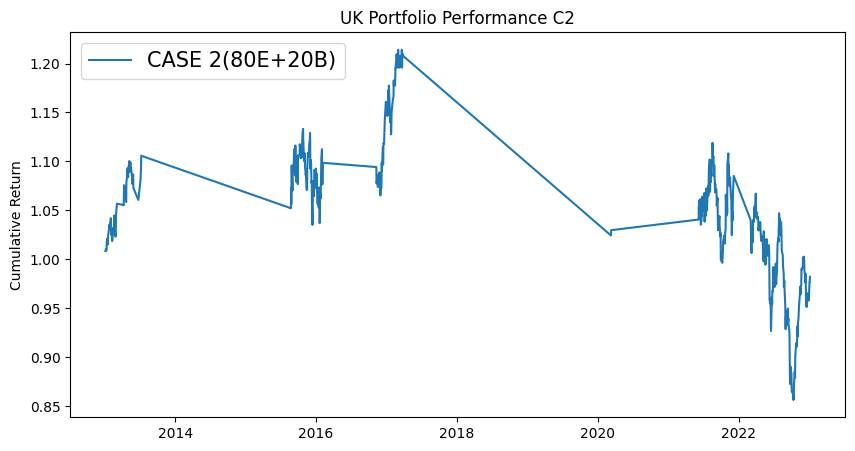

In [204]:
# UK

weighted_return_c2_uk = (wts_c2 * case2_data_uk_ftse)


#Cumulative Portfolio UK
portfolio_return_c2_uk = weighted_return_c2_uk.sum(axis=1)
cumprod_portfolio_c2_uk = (1 + portfolio_return_c2_uk).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c2_uk, label='CASE 2(80E+20B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("UK Portfolio Performance C2")
plt.ylabel('Cumulative Return')

#### CASE 3

In [205]:
case3_uk=selected_returns_dataframe(filtered_dates3)
case3_uk.head()

Date  Portfolio_Return_uk_bond
0 2016-02-16                 -0.028340
1 2016-02-17                  0.025606
2 2016-02-18                  0.036585
3 2016-02-22                 -0.027216
4 2016-02-23                  0.051357

<Axes: ylabel='Frequency'>

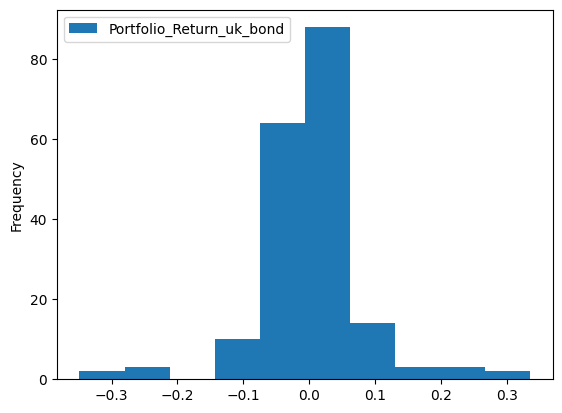

In [206]:
# Histogram of bond
case3_uk.plot.hist()

Text(0, 0.5, 'Return')

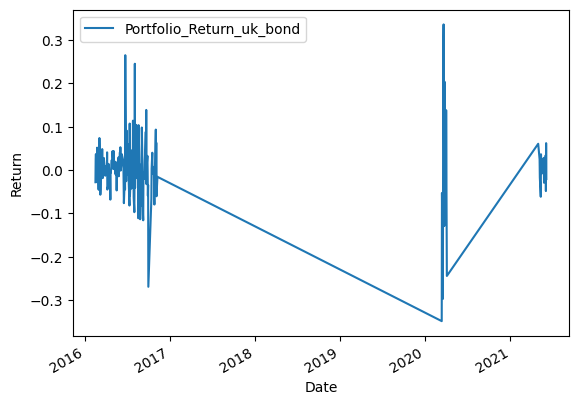

In [207]:
selected_returns_bond_uk=case3_uk.set_index('Date')
selected_returns_bond_uk.plot()
plt.ylabel('Return')

In [208]:
case3_ftse=case3_ftse.set_index('Date')
case3_uk=case3_uk.set_index('Date')

In [209]:
case3_data_uk_ftse = case3_ftse.join(case3_uk, how='inner')
case3_data_uk_ftse.head()

Portfolio_Return_ftse  Portfolio_Return_uk_bond
Date                                                       
2016-02-16               0.027087                 -0.028340
2016-02-17               0.028675                  0.025606
2016-02-18              -0.009668                  0.036585
2016-02-22               0.014705                 -0.027216
2016-02-23              -0.012488                  0.051357

Text(0, 0.5, 'Cumulative Return')

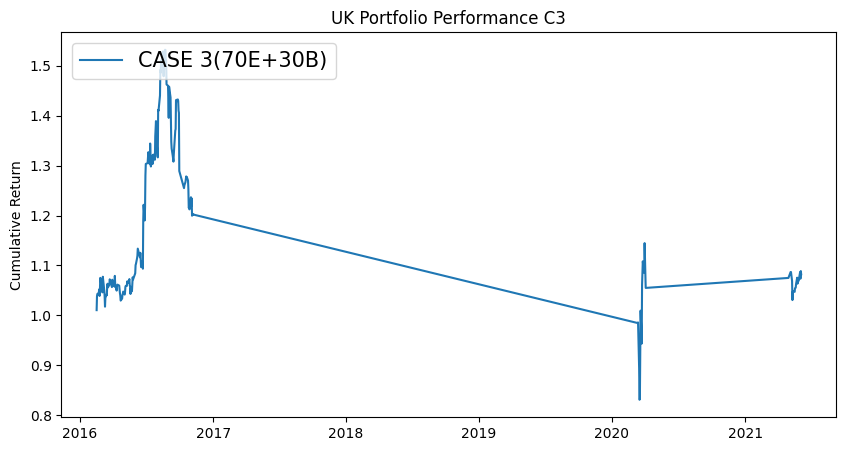

In [210]:
# UK
weighted_return_c3_uk = (wts_c3 * case3_data_uk_ftse)

#Cumulative Portfolio UK
portfolio_return_c3_uk = weighted_return_c3_uk.sum(axis=1)
cumprod_portfolio_c3_uk = (1 + portfolio_return_c3_uk).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c3_uk, label='CASE 3(70E+30B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("UK Portfolio Performance C3")
plt.ylabel('Cumulative Return')

#### CASE 4

In [211]:
case4_uk=selected_returns_dataframe(filtered_dates4)
case4_uk.head()

Date  Portfolio_Return_uk_bond
0 2020-04-07                  0.083990
1 2020-04-08                  0.249180
2 2020-04-09                 -0.001637
3 2020-04-15                  0.003333
4 2020-04-16                 -0.006623

<Axes: ylabel='Frequency'>

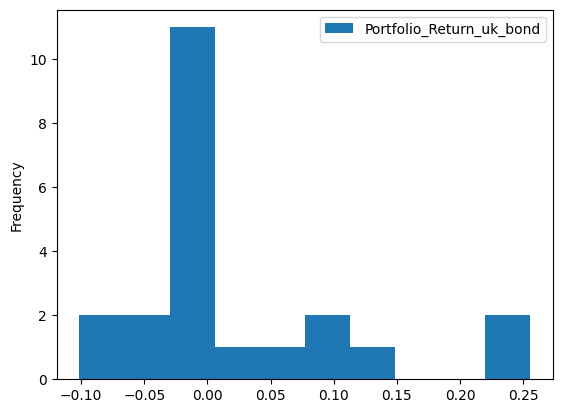

In [212]:
# Histogram of bond
case4_uk.plot.hist()

Text(0, 0.5, 'Return')

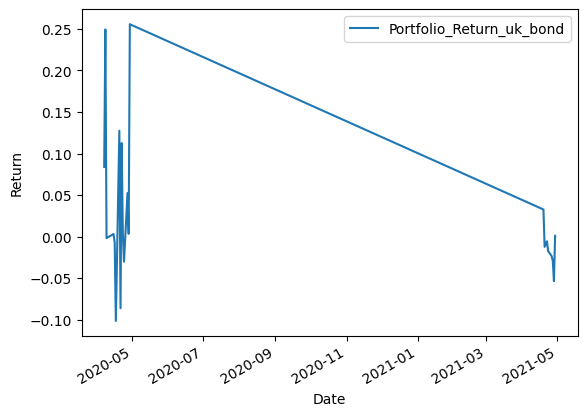

In [213]:
selected_returns_bond_uk=case4_uk.set_index('Date')
selected_returns_bond_uk.plot()
plt.ylabel('Return')

In [214]:
case4_ftse=case4_ftse.set_index('Date')
case4_uk=case4_uk.set_index('Date')

In [215]:
case4_data_uk_ftse = case4_ftse.join(case4_uk, how='inner')
case4_data_uk_ftse.head()

Portfolio_Return_ftse  Portfolio_Return_uk_bond
Date                                                       
2020-04-07               0.053365                  0.083990
2020-04-08              -0.004698                  0.249180
2020-04-09               0.029061                 -0.001637
2020-04-15              -0.041933                  0.003333
2020-04-16               0.005484                 -0.006623

Text(0, 0.5, 'Cumulative Return')

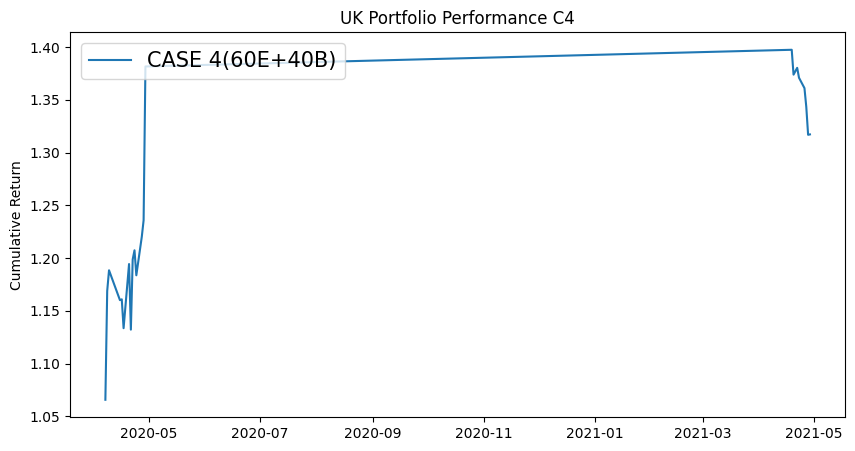

In [216]:
# UK
weighted_return_c4_uk = (wts_c4 * case4_data_uk_ftse)

#Cumulative Portfolio UK
portfolio_return_c4_uk = weighted_return_c4_uk.sum(axis=1)
cumprod_portfolio_c4_uk = (1 + portfolio_return_c4_uk).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c4_uk, label='CASE 4(60E+40B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("UK Portfolio Performance C4")
plt.ylabel('Cumulative Return')

#### CASE 5

In [217]:
case5_uk=selected_returns_dataframe(filtered_dates5)
case5_uk.head()

Date  Portfolio_Return_uk_bond
0 2020-05-04                  0.126214
1 2020-05-05                 -0.112069
2 2020-05-06                 -0.002151
3 2020-05-11                  0.084337
4 2020-05-12                  0.197115

<Axes: ylabel='Frequency'>

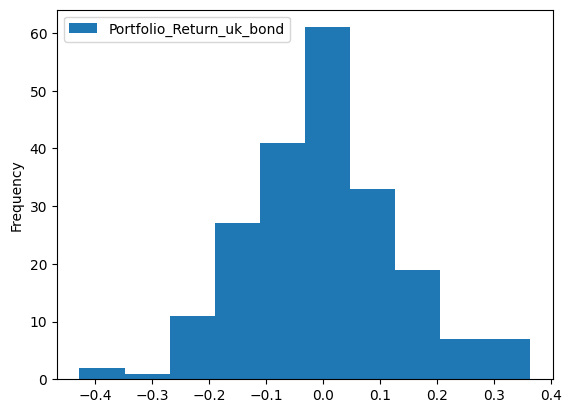

In [218]:
# Histogram of bond
case5_uk.plot.hist()

Text(0, 0.5, 'Return')

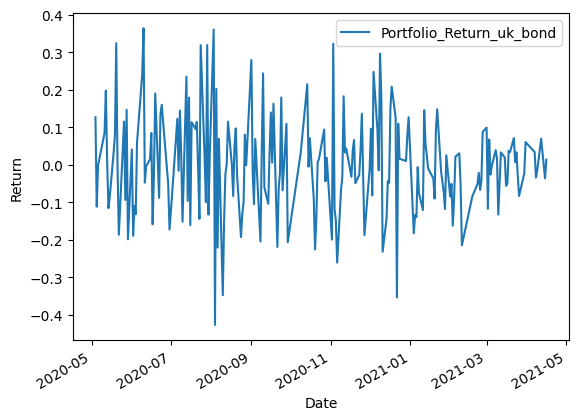

In [219]:
selected_returns_bond_uk=case5_uk.set_index('Date')
selected_returns_bond_uk.plot()
plt.ylabel('Return')

In [220]:
case5_ftse=case5_ftse.set_index('Date')
case5_uk=case5_uk.set_index('Date')

In [221]:
case5_data_uk_ftse = case5_ftse.join(case5_uk, how='inner')
case5_data_uk_ftse.head()

Portfolio_Return_ftse  Portfolio_Return_uk_bond
Date                                                       
2020-05-04              -0.059114                  0.126214
2020-05-05               0.016615                 -0.112069
2020-05-06               0.000752                 -0.002151
2020-05-11               0.000623                  0.084337
2020-05-12               0.009276                  0.197115

Text(0, 0.5, 'Cumulative Return')

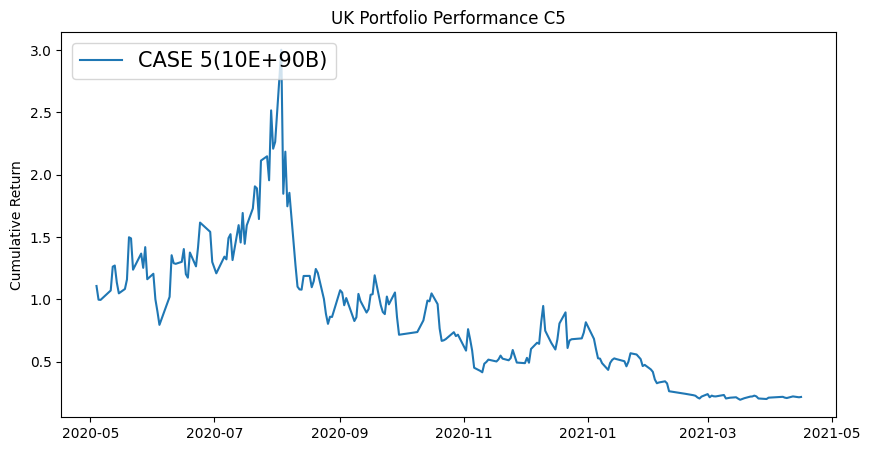

In [222]:
# UK
weighted_return_c5_uk = (wts_c5 * case5_data_uk_ftse)

#Cumulative Portfolio UK
portfolio_return_c5_uk = weighted_return_c5_uk.sum(axis=1)
cumprod_portfolio_c5_uk = (1 + portfolio_return_c5_uk).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c5_uk, label='CASE 5(10E+90B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("UK Portfolio Performance C5")
plt.ylabel('Cumulative Return')

**EQUITY**

In [223]:
drawdown(case1_data_uk_ftse['Portfolio_Return_ftse']).min()

Wealth            811.673155
Previous Peak    1007.025383
Drawdown           -0.234502
dtype: float64

In [224]:
drawdown(case2_data_uk_ftse['Portfolio_Return_ftse']).min()

Wealth            970.312882
Previous Peak    1007.027930
Drawdown           -0.158305
dtype: float64

In [225]:
drawdown(case3_data_uk_ftse['Portfolio_Return_ftse']).min()

Wealth           1027.086708
Previous Peak    1027.086708
Drawdown           -0.176874
dtype: float64

In [226]:
drawdown(case4_data_uk_ftse['Portfolio_Return_ftse']).min()

Wealth           1033.644206
Previous Peak    1053.365340
Drawdown           -0.041933
dtype: float64

In [227]:
drawdown(case5_data_uk_ftse['Portfolio_Return_ftse']).min()

Wealth           878.165986
Previous Peak    940.885973
Drawdown          -0.160178
dtype: float64

**BOND**

In [228]:
drawdown(case1_data_uk_ftse['Portfolio_Return_uk_bond']).min()

Wealth            782.740247
Previous Peak    1014.896684
Drawdown           -0.526112
dtype: float64

In [229]:
drawdown(case2_data_uk_ftse['Portfolio_Return_uk_bond']).min()

Wealth            329.167905
Previous Peak    1014.860978
Drawdown           -0.771921
dtype: float64

In [230]:
drawdown(case3_data_uk_ftse['Portfolio_Return_uk_bond']).min()

Wealth           327.396370
Previous Peak    971.659919
Drawdown          -0.854435
dtype: float64

In [231]:
drawdown(case4_data_uk_ftse['Portfolio_Return_uk_bond']).min()

Wealth           1083.989501
Previous Peak    1083.989501
Drawdown           -0.132701
dtype: float64

In [232]:
drawdown(case5_data_uk_ftse['Portfolio_Return_uk_bond']).min()

Wealth            132.574669
Previous Peak    1126.213592
Drawdown           -0.958729
dtype: float64

In [233]:
a1_uk=case1_data_uk_ftse['Portfolio_Return_ftse'].sum()
a2_uk=case2_data_uk_ftse['Portfolio_Return_ftse'].sum()
a3_uk=case3_data_uk_ftse['Portfolio_Return_ftse'].sum()
a4_uk=case4_data_uk_ftse['Portfolio_Return_ftse'].sum()
a5_uk=case5_data_uk_ftse['Portfolio_Return_ftse'].sum()
a_uk=(a1_uk+a2_uk+a3_uk+a4_uk+a5_uk)

b1_uk=case1_data_uk_ftse['Portfolio_Return_uk_bond'].sum()
b2_uk=case2_data_uk_ftse['Portfolio_Return_uk_bond'].sum()
b3_uk=case3_data_uk_ftse['Portfolio_Return_uk_bond'].sum()
b4_uk=case4_data_uk_ftse['Portfolio_Return_uk_bond'].sum()
b5_uk=case5_data_uk_ftse['Portfolio_Return_uk_bond'].sum()
b_uk=(b1_uk+b2_uk+b3_uk+b4_uk+b5_uk)

c1_uk=filt_case1_ftse['^FTSE'].sum()
c2_uk=filt_case2_ftse['^FTSE'].sum()
c3_uk=filt_case3_ftse['^FTSE'].sum()
c4_uk=filt_case4_ftse['^FTSE'].sum()
c5_uk=filt_case5_ftse['^FTSE'].sum()
c_uk=(c1_uk+c2_uk+c3_uk+c4_uk+c5_uk)

d_uk=return_multiData['^FTSE'].sum()
final_uk=a_uk+b_uk+c_uk-d_uk
final_uk_usd=final_uk*1000000
final_uk_usd_per_change=((final_uk_usd-1000000)/1000000)*100
final_uk_usd_per_change

495.60029262693865

## FOR UNITED STATES


In [234]:
filtered_dates1 = ann_vol_portfolio[((ann_vol_portfolio['^GSPC'] < 15) & (ann_vol_portfolio['^GSPC'].diff() <10))]['DateTime']
filtered_dates4  = ann_vol_portfolio[(((27 > ann_vol_portfolio['^GSPC']) & (ann_vol_portfolio['^GSPC'] >= 25)) | ((15 > ann_vol_portfolio['^GSPC'].diff()) & (ann_vol_portfolio['^GSPC'].diff() > 10)))]['DateTime']
filtered_dates3  = ann_vol_portfolio[(((25 > ann_vol_portfolio['^GSPC']) & (ann_vol_portfolio['^GSPC'] >= 20)) | ((30 > ann_vol_portfolio['^GSPC'].diff()) & (ann_vol_portfolio['^GSPC'].diff() > 20)))]['DateTime']
filtered_dates2  = ann_vol_portfolio[(((20 > ann_vol_portfolio['^GSPC']) & (ann_vol_portfolio['^GSPC'] >= 15)) | ((20 > ann_vol_portfolio['^GSPC'].diff()) & (ann_vol_portfolio['^GSPC'].diff() > 15)))]['DateTime']
filtered_dates5  = ann_vol_portfolio[((ann_vol_portfolio['^GSPC']  >=  27) | (ann_vol_portfolio['^GSPC'].diff() >25))]['DateTime']

In [235]:
# Dates fullfilling the condition
def selected_returns_dataframe(filtered_dates):
  selected_returns = []
  for date in filtered_dates:
    return_value = df_bond_return.loc[df_bond_return['Date'] == date, 'US_Price'].values
    if len(return_value) > 0:
        selected_returns.append((date, return_value[0]))

  selected_return=pd.DataFrame(selected_returns)
  selected_return.set_axis(['Date', 'Portfolio_Return_us_bond'], axis=1, inplace=True)
  return selected_return

#### CASE 1

In [236]:
case1_us=selected_returns_dataframe(filtered_dates1)
case1_us.head()

Date  Portfolio_Return_us_bond
0 2013-01-23                 -0.012959
1 2013-01-24                 -0.049769
2 2013-01-25                 -0.008142
3 2013-01-29                  0.003514
4 2013-01-30                  0.003526

<Axes: ylabel='Frequency'>

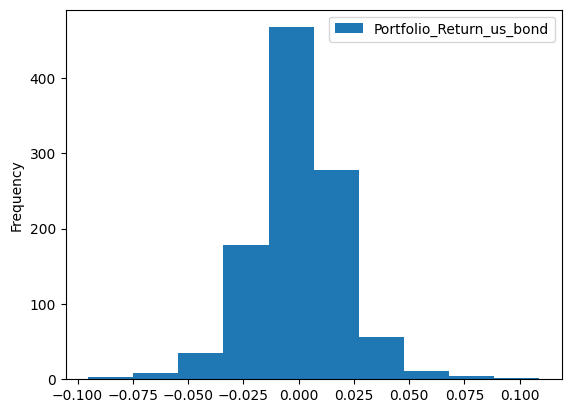

In [237]:
# Histogram of bond
case1_us.plot.hist()

Text(0, 0.5, 'Return')

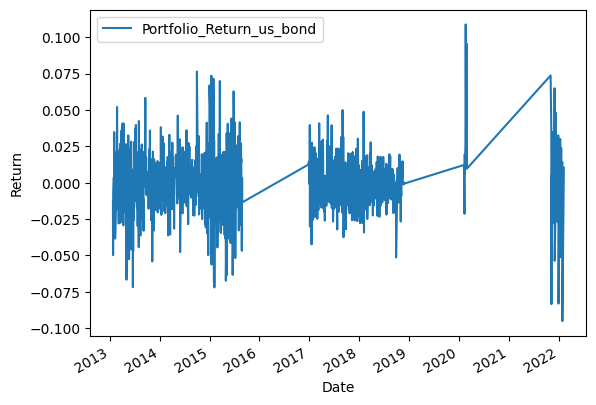

In [238]:
selected_returns_bond_us=case1_us.set_index('Date')
selected_returns_bond_us.plot()
plt.ylabel('Return')

In [239]:
case1_gspc=case1_gspc.set_index('Date')
case1_us=case1_us.set_index('Date')

In [240]:
case1_data_us_gspc = case1_gspc.join(case1_us, how='inner')
case1_data_us_gspc.head()

Portfolio_Return_gspc  Portfolio_Return_us_bond
Date                                                       
2013-01-23               0.001507                 -0.012959
2013-01-24               0.000007                 -0.049769
2013-01-25               0.005445                 -0.008142
2013-01-29               0.003247                  0.003514
2013-01-30              -0.003900                  0.003526

Text(0, 0.5, 'Cumulative Return')

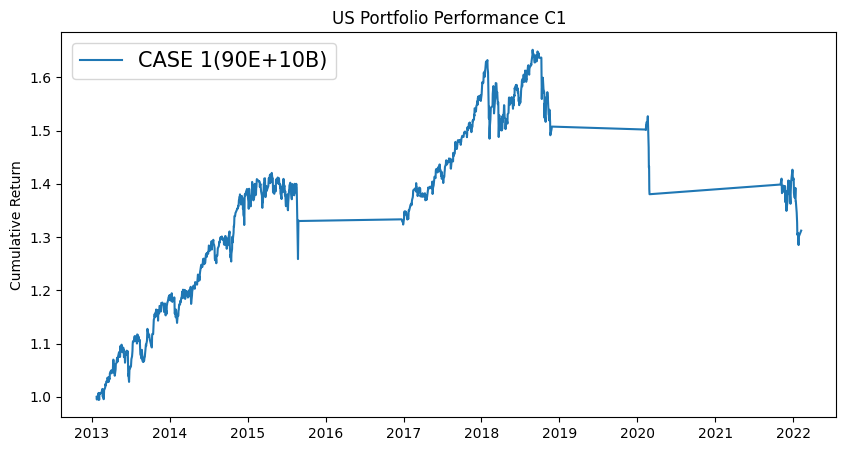

In [241]:
# US
weighted_return_c1_us = (wts_c1 * case1_data_us_gspc)

#Cumulative Portfolio US
portfolio_return_c1_us = weighted_return_c1_us.sum(axis=1)
cumprod_portfolio_c1_us = (1 + portfolio_return_c1_us).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c1_us, label='CASE 1(90E+10B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("US Portfolio Performance C1")
plt.ylabel('Cumulative Return')

#### CASE 2

In [242]:
case2_us=selected_returns_dataframe(filtered_dates2)
case2_us.head()

Date  Portfolio_Return_us_bond
0 2013-01-04                  0.001052
1 2013-01-07                  0.019850
2 2013-01-08                  0.002151
3 2013-01-09                 -0.020537
4 2013-01-10                  0.017685

<Axes: ylabel='Frequency'>

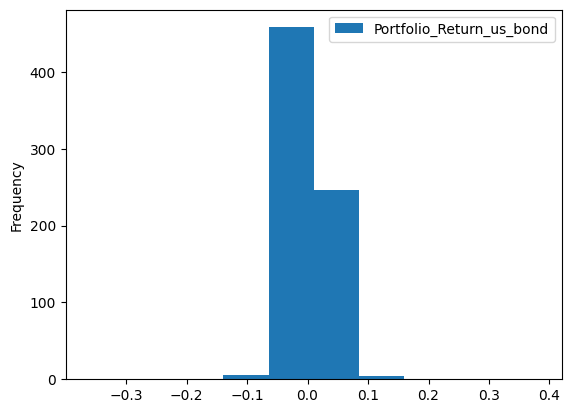

In [243]:
# Histogram of bond
case2_us.plot.hist()

Text(0, 0.5, 'Return')

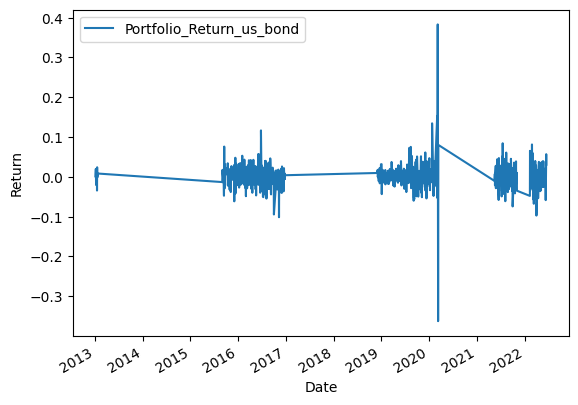

In [244]:
selected_returns_bond_us=case2_us.set_index('Date')
selected_returns_bond_us.plot()
plt.ylabel('Return')

In [245]:
case2_gspc=case2_gspc.set_index('Date')
case2_us=case2_us.set_index('Date')

In [246]:
case2_data_us_gspc = case2_gspc.join(case2_us, how='inner')
case2_data_us_gspc.head()

Portfolio_Return_gspc  Portfolio_Return_us_bond
Date                                                       
2013-01-04               0.004865                  0.001052
2013-01-07              -0.003123                  0.019850
2013-01-08              -0.003242                  0.002151
2013-01-09               0.002656                 -0.020537
2013-01-10               0.007597                  0.017685

Text(0, 0.5, 'Cumulative Return')

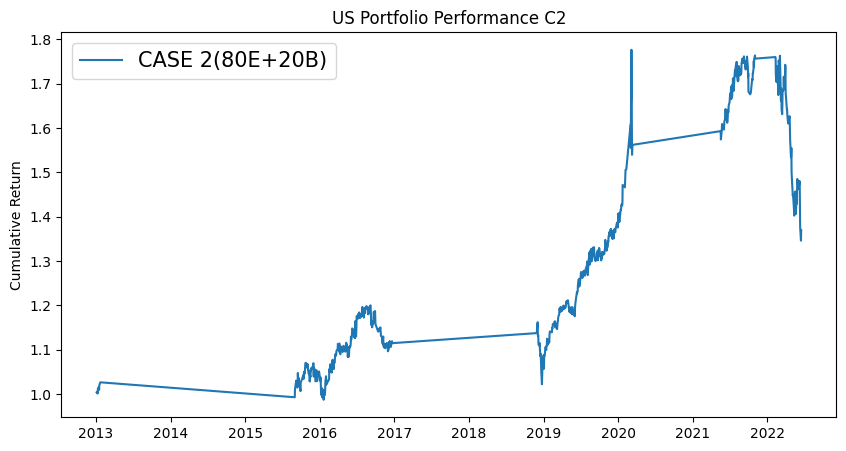

In [247]:
# US
weighted_return_c2_us = (wts_c2 * case2_data_us_gspc)

#Cumulative Portfolio US

portfolio_return_c2_us = weighted_return_c2_us.sum(axis=1)
cumprod_portfolio_c2_us = (1 + portfolio_return_c2_us).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c2_us, label='CASE 2(80E+20B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("US Portfolio Performance C2")
plt.ylabel('Cumulative Return')

#### CASE 3

In [248]:
case3_us=selected_returns_dataframe(filtered_dates3)
case3_us.head()

Date  Portfolio_Return_us_bond
0 2020-03-12                 -0.173957
1 2020-03-13                  0.328378
2 2021-04-28                 -0.018282
3 2021-04-29                  0.009225
4 2021-04-30                  0.035669

<Axes: ylabel='Frequency'>

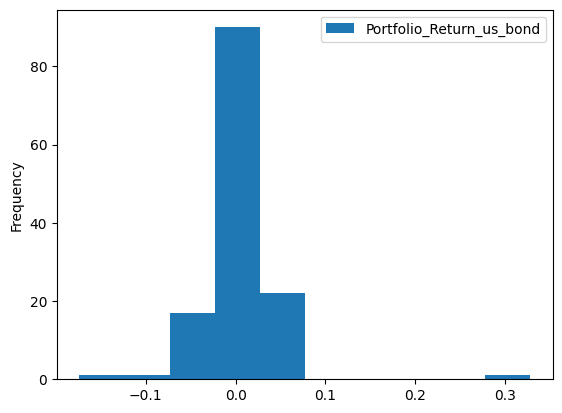

In [249]:
# Histogram of bond
case3_us.plot.hist()

Text(0, 0.5, 'Return')

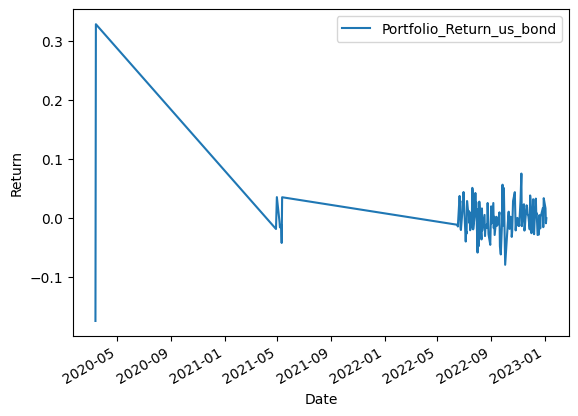

In [250]:
selected_returns_bond_us=case3_us.set_index('Date')
selected_returns_bond_us.plot()
plt.ylabel('Return')

In [251]:
case3_gspc=case3_gspc.set_index('Date')
case3_us=case3_us.set_index('Date')

In [252]:
case3_data_us_gspc = case3_gspc.join(case3_us, how='inner')
case3_data_us_gspc.head()

Portfolio_Return_gspc  Portfolio_Return_us_bond
Date                                                       
2020-03-12              -0.095113                 -0.173957
2020-03-13               0.092871                  0.328378
2021-04-28              -0.000846                 -0.018282
2021-04-29               0.006763                  0.009225
2021-04-30              -0.007195                  0.035669

Text(0, 0.5, 'Cumulative Return')

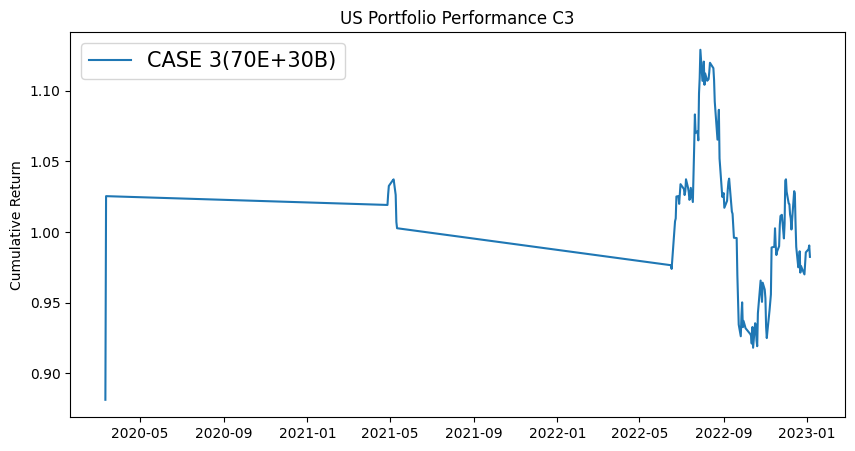

In [253]:
# US
weighted_return_c3_us = (wts_c3 * case3_data_us_gspc)


#Cumulative Portfolio US
portfolio_return_c3_us = weighted_return_c3_us.sum(axis=1)
cumprod_portfolio_c3_us = (1 + portfolio_return_c3_us).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c3_us, label='CASE 3(70E+30B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("US Portfolio Performance C3")
plt.ylabel('Cumulative Return')

#### CASE 4

In [254]:
case4_us=selected_returns_dataframe(filtered_dates4)
case4_us.head()

Date  Portfolio_Return_us_bond
0 2020-03-16                 -0.307764
1 2020-03-17                 -0.096365
2 2020-03-18                  0.021589
3 2020-03-19                  0.308475
4 2021-04-22                 -0.010904

<Axes: ylabel='Frequency'>

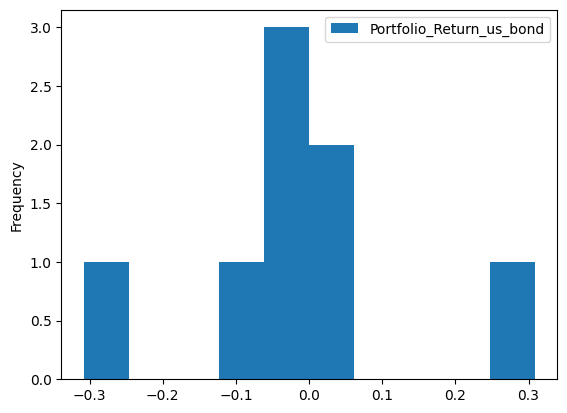

In [255]:
# Histogram of bond
case4_us.plot.hist()

Text(0, 0.5, 'Return')

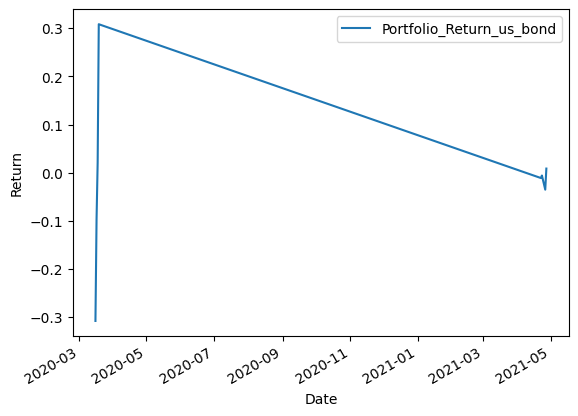

In [256]:
selected_returns_bond_us=case4_us.set_index('Date')
selected_returns_bond_us.plot()
plt.ylabel('Return')

In [257]:
case4_gspc=case4_gspc.set_index('Date')
case4_us=case4_us.set_index('Date')

In [258]:
case4_data_us_gspc = case4_gspc.join(case4_us, how='inner')
case4_data_us_gspc.head()

Portfolio_Return_gspc  Portfolio_Return_us_bond
Date                                                       
2020-03-16              -0.119841                 -0.307764
2020-03-17               0.059955                 -0.096365
2020-03-18              -0.051831                  0.021589
2020-03-19               0.004708                  0.308475
2021-04-22               0.000010                 -0.010904

Text(0, 0.5, 'Cumulative Return')

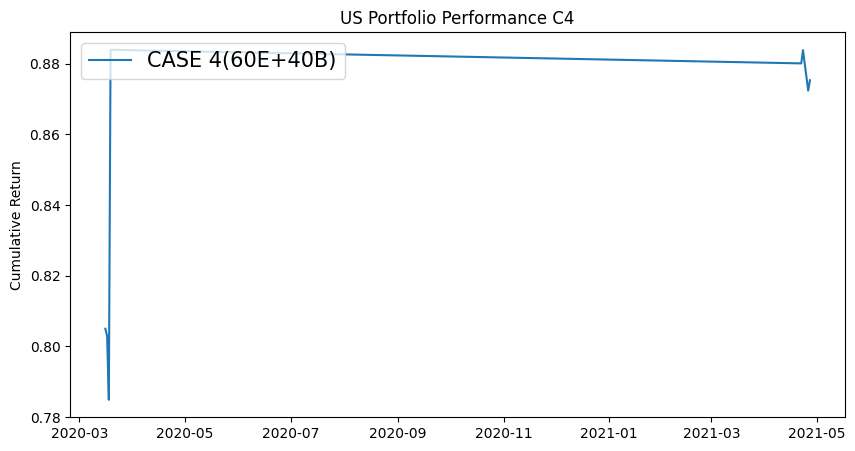

In [259]:
# US
weighted_return_c4_us = (wts_c4 * case4_data_us_gspc)

#Cumulative Portfolio US

portfolio_return_c4_us = weighted_return_c4_us.sum(axis=1)
cumprod_portfolio_c4_us = (1 + portfolio_return_c4_us).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c4_us, label='CASE 4(60E+40B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("US Portfolio Performance C4")
plt.ylabel('Cumulative Return')

#### CASE 5

In [260]:
case5_us=selected_returns_dataframe(filtered_dates5)
case5_us.head()

Date  Portfolio_Return_us_bond
0 2020-03-20                  0.159895
1 2020-03-23                 -0.110723
2 2020-03-24                  0.011792
3 2020-03-26                  0.254438
4 2020-03-27                 -0.068871

<Axes: ylabel='Frequency'>

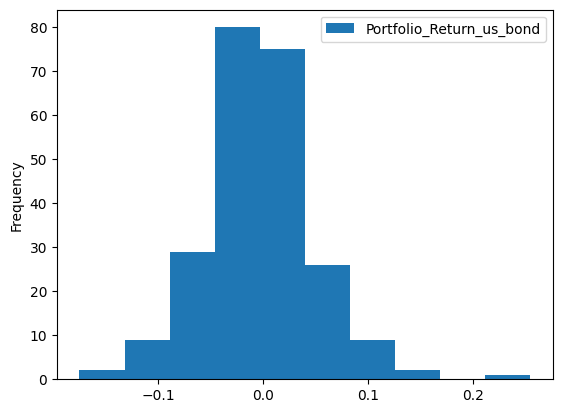

In [261]:
# Histogram of bond
case5_us.plot.hist()

Text(0, 0.5, 'Return')

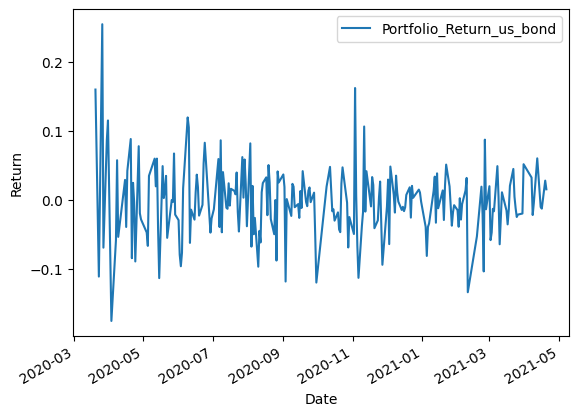

In [262]:
selected_returns_bond_us=case5_us.set_index('Date')
selected_returns_bond_us.plot()
plt.ylabel('Return')

In [263]:
case5_gspc=case5_gspc.set_index('Date')
case5_us=case5_us.set_index('Date')

In [264]:
case5_data_us_gspc = case5_gspc.join(case5_us, how='inner')
case5_data_us_gspc.head()

Portfolio_Return_gspc  Portfolio_Return_us_bond
Date                                                       
2020-03-20              -0.043360                  0.159895
2020-03-23              -0.029294                 -0.110723
2020-03-24               0.093828                  0.011792
2020-03-26               0.062414                  0.254438
2020-03-27              -0.033687                 -0.068871

Text(0, 0.5, 'Cumulative Return')

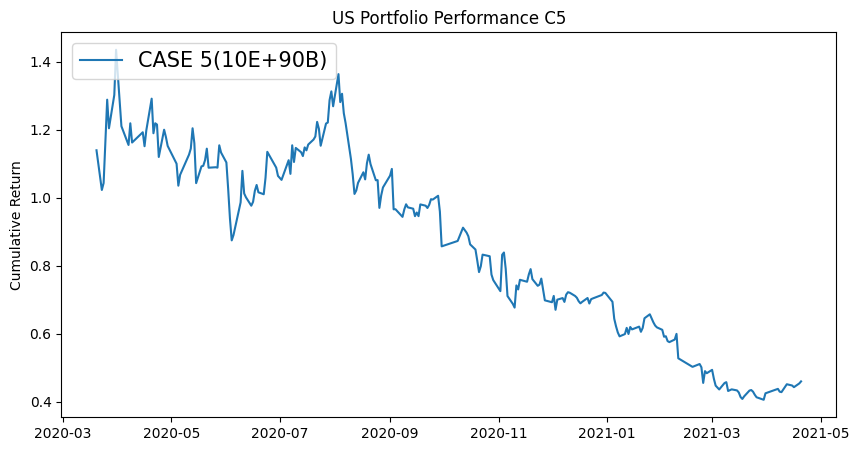

In [265]:
# US
weighted_return_c5_us = (wts_c5 * case5_data_us_gspc)

#Cumulative Portfolio US
portfolio_return_c5_us = weighted_return_c5_us.sum(axis=1)
cumprod_portfolio_c5_us = (1 + portfolio_return_c5_us).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c5_us, label='CASE 5(10E+90B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("US Portfolio Performance C5")
plt.ylabel('Cumulative Return')

**EQUITY**

In [266]:
drawdown(case1_data_us_gspc['Portfolio_Return_gspc']).min()

Wealth            997.887166
Previous Peak    1001.507477
Drawdown           -0.264746
dtype: float64

In [267]:
drawdown(case2_data_us_gspc['Portfolio_Return_gspc']).min()

Wealth            934.543106
Previous Peak    1004.865097
Drawdown           -0.230831
dtype: float64

In [268]:
drawdown(case3_data_us_gspc['Portfolio_Return_gspc']).min()

Wealth           904.887319
Previous Peak    904.887319
Drawdown          -0.167142
dtype: float64

In [269]:
drawdown(case4_data_us_gspc['Portfolio_Return_gspc']).min()

Wealth           880.159448
Previous Peak    880.159448
Drawdown          -0.051831
dtype: float64

In [270]:
drawdown(case5_data_us_gspc['Portfolio_Return_gspc']).min()

Wealth           928.616787
Previous Peak    956.640488
Drawdown          -0.108736
dtype: float64

**BOND**

In [271]:
drawdown(case1_data_us_gspc['Portfolio_Return_us_bond']).min()

Wealth           700.869167
Previous Peak    987.041037
Drawdown          -0.463610
dtype: float64

In [272]:
drawdown(case2_data_us_gspc['Portfolio_Return_us_bond']).min()

Wealth            865.933146
Previous Peak    1001.052078
Drawdown           -0.532220
dtype: float64

In [273]:
drawdown(case3_data_us_gspc['Portfolio_Return_us_bond']).min()

Wealth           826.042726
Previous Peak    826.042726
Drawdown          -0.355127
dtype: float64

In [274]:
drawdown(case4_data_us_gspc['Portfolio_Return_us_bond']).min()

Wealth           625.528318
Previous Peak    692.235734
Drawdown          -0.096365
dtype: float64

In [275]:
drawdown(case5_data_us_gspc['Portfolio_Return_us_bond']).min()

Wealth            335.239196
Previous Peak    1159.895151
Drawdown           -0.773098
dtype: float64

In [276]:
a1_us=case1_data_us_gspc['Portfolio_Return_gspc'].sum()
a2_us=case2_data_us_gspc['Portfolio_Return_gspc'].sum()
a3_us=case3_data_us_gspc['Portfolio_Return_gspc'].sum()
a4_us=case4_data_us_gspc['Portfolio_Return_gspc'].sum()
a5_us=case5_data_us_gspc['Portfolio_Return_gspc'].sum()
a_us=(a1_us+a2_us+a3_us+a4_us+a5_us)

b1_us=case1_data_us_gspc['Portfolio_Return_us_bond'].sum()
b2_us=case2_data_us_gspc['Portfolio_Return_us_bond'].sum()
b3_us=case3_data_us_gspc['Portfolio_Return_us_bond'].sum()
b4_us=case4_data_us_gspc['Portfolio_Return_us_bond'].sum()
b5_us=case5_data_us_gspc['Portfolio_Return_us_bond'].sum()
b_us=(b1_us+b2_us+b3_us+b4_us+b5_us)

c1_us=filt_case1_gspc['^GSPC'].sum()
c2_us=filt_case2_gspc['^GSPC'].sum()
c3_us=filt_case3_gspc['^GSPC'].sum()
c4_us=filt_case4_gspc['^GSPC'].sum()
c5_us=filt_case5_gspc['^GSPC'].sum()
c_us=(c1_us+c2_us+c3_us+c4_us+c5_us)

d_us=return_multiData['^GSPC'].sum()
final_us=a_us+b_us+c_us-d_us
final_us_usd=final_us*1000000
final_us_usd_per_change=((final_us_usd-1000000)/1000000)*100
final_us_usd_per_change

570.4119952300248

## FOR INDIA


In [277]:
filtered_dates1 = ann_vol_portfolio[((ann_vol_portfolio['^NSEI'] < 15) & (ann_vol_portfolio['^NSEI'].diff() <10))]['DateTime']
filtered_dates4  = ann_vol_portfolio[(((27 > ann_vol_portfolio['^NSEI']) & (ann_vol_portfolio['^NSEI'] >= 25)) | ((15 > ann_vol_portfolio['^NSEI'].diff()) & (ann_vol_portfolio['^NSEI'].diff() > 10)))]['DateTime']
filtered_dates3  = ann_vol_portfolio[(((25 > ann_vol_portfolio['^NSEI']) & (ann_vol_portfolio['^NSEI'] >= 20)) | ((30 > ann_vol_portfolio['^NSEI'].diff()) & (ann_vol_portfolio['^NSEI'].diff() > 20)))]['DateTime']
filtered_dates2  = ann_vol_portfolio[(((20 > ann_vol_portfolio['^NSEI']) & (ann_vol_portfolio['^NSEI'] >= 15)) | ((20 > ann_vol_portfolio['^NSEI'].diff()) & (ann_vol_portfolio['^NSEI'].diff() > 15)))]['DateTime']
filtered_dates5  = ann_vol_portfolio[((ann_vol_portfolio['^NSEI']  >=  27) | (ann_vol_portfolio['^NSEI'].diff() >25))]['DateTime']

In [278]:
# Dates fullfilling the condition
def selected_returns_dataframe(filtered_dates):
  selected_returns = []
  for date in filtered_dates:
    return_value = df_bond_return.loc[df_bond_return['Date'] == date, 'IN_Price'].values
    if len(return_value) > 0:
        selected_returns.append((date, return_value[0]))

  selected_return=pd.DataFrame(selected_returns)
  selected_return.set_axis(['Date', 'Portfolio_Return_IN_bond'], axis=1, inplace=True)
  return selected_return

#### CASE 1

In [279]:
case1_in=selected_returns_dataframe(filtered_dates1)
case1_in.head()

Date  Portfolio_Return_IN_bond
0 2014-11-11                  0.003310
1 2014-11-12                 -0.007663
2 2014-11-13                  0.000730
3 2014-11-14                  0.004156
4 2014-11-17                  0.003434

<Axes: ylabel='Frequency'>

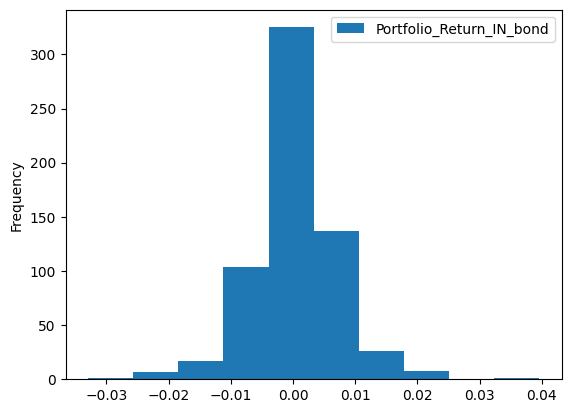

In [280]:
# Histogram of bond
case1_in.plot.hist()

Text(0, 0.5, 'Return')

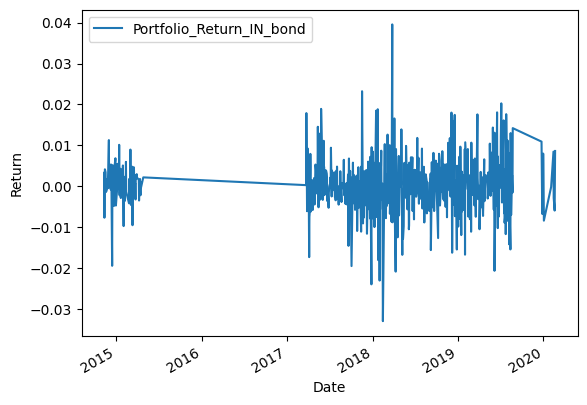

In [281]:
selected_returns_bond_in=case1_in.set_index('Date')
selected_returns_bond_in.plot()
plt.ylabel('Return')

In [282]:
case1_nsei=case1_nsei.set_index('Date')
case1_in=case1_in.set_index('Date')

In [283]:
case1_data_in_nsei = case1_nsei.join(case1_in, how='inner')
case1_data_in_nsei.head()

Portfolio_Return_nsei  Portfolio_Return_IN_bond
Date                                                       
2014-11-11               0.002205                  0.003310
2014-11-12               0.002469                 -0.007663
2014-11-13              -0.003036                  0.000730
2014-11-14               0.003835                  0.004156
2014-11-17               0.004869                  0.003434

Text(0, 0.5, 'Cumulative Return')

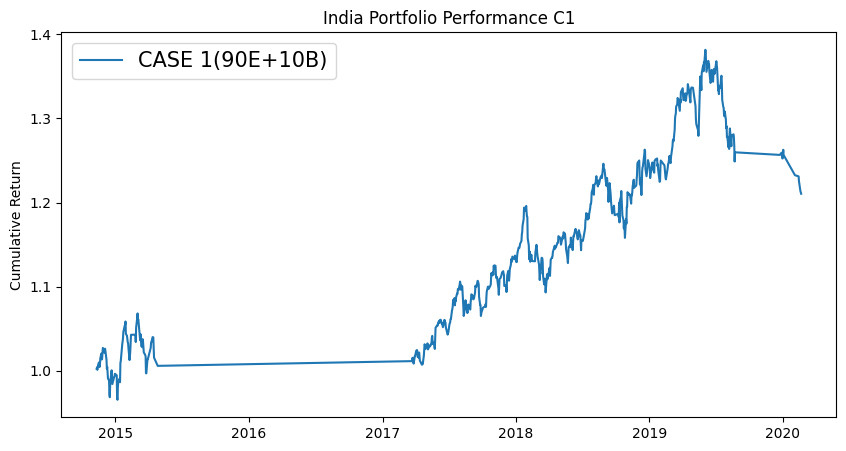

In [284]:
# India
weighted_return_c1_in = (wts_c1 * case1_data_in_nsei)

#Cumulative Portfolio in
portfolio_return_c1_in = weighted_return_c1_in.sum(axis=1)
cumprod_portfolio_c1_in = (1 + portfolio_return_c1_in).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c1_in, label='CASE 1(90E+10B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("India Portfolio Performance C1")
plt.ylabel('Cumulative Return')

#### CASE 2

In [285]:
case2_in=selected_returns_dataframe(filtered_dates2)
case2_in.head()

Date  Portfolio_Return_IN_bond
0 2013-01-04                  0.003797
1 2013-01-07                 -0.000759
2 2013-01-08                  0.001140
3 2013-01-09                  0.002539
4 2013-01-10                  0.001398

<Axes: ylabel='Frequency'>

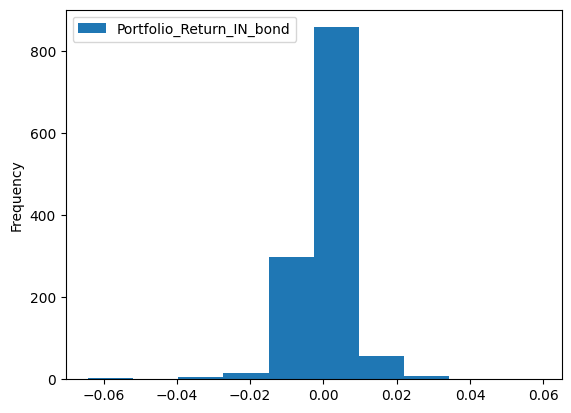

In [286]:
# Histogram of bond
case2_in.plot.hist()

Text(0, 0.5, 'Return')

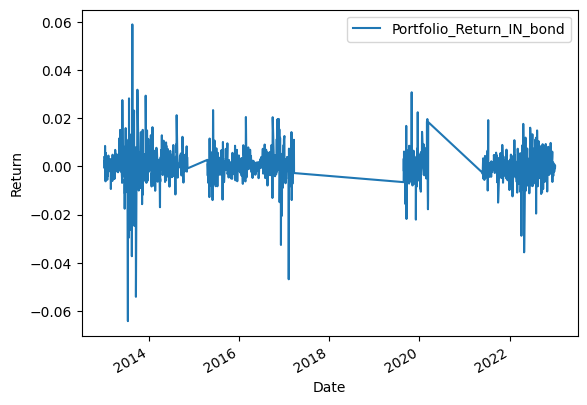

In [287]:
selected_returns_bond_in=case2_in.set_index('Date')
selected_returns_bond_in.plot()
plt.ylabel('Return')

In [288]:
case2_nsei=case2_nsei.set_index('Date')
case2_in=case2_in.set_index('Date')

In [289]:
case2_data_in_nsei = case2_nsei.join(case2_in, how='inner')
case2_data_in_nsei.head()

Portfolio_Return_nsei  Portfolio_Return_IN_bond
Date                                                       
2013-01-04               0.001107                  0.003797
2013-01-07              -0.004613                 -0.000759
2013-01-08               0.002221                  0.001140
2013-01-09              -0.005032                  0.002539
2013-01-10              -0.000477                  0.001398

Text(0, 0.5, 'Cumulative Return')

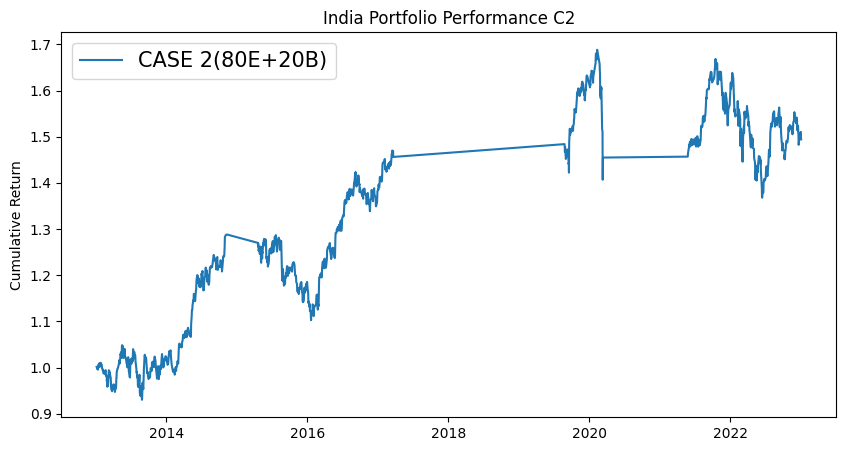

In [290]:
# India
weighted_return_c2_in = (wts_c2 * case2_data_in_nsei)

#Cumulative Portfolio india
portfolio_return_c2_in = weighted_return_c2_in.sum(axis=1)
cumprod_portfolio_c2_in = (1 + portfolio_return_c2_in).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c2_in, label='CASE 2(80E+20B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("India Portfolio Performance C2")
plt.ylabel('Cumulative Return')

#### CASE 3

In [291]:
case3_in=selected_returns_dataframe(filtered_dates3)
case3_in.head()

Date  Portfolio_Return_IN_bond
0 2020-03-16                 -0.009098
1 2020-03-17                 -0.004924
2 2020-03-18                 -0.017785
3 2020-03-19                  0.024125
4 2020-03-20                 -0.018812

<Axes: ylabel='Frequency'>

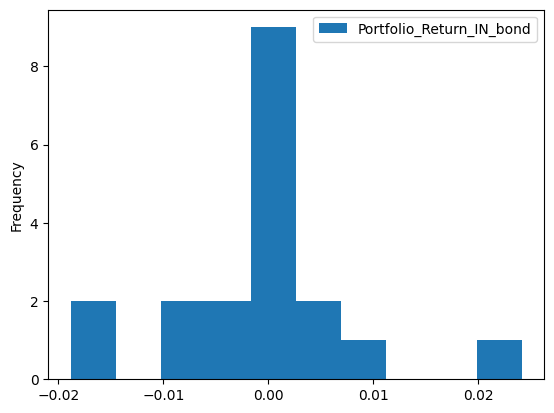

In [292]:
# Histogram of bond
case3_in.plot.hist()

Text(0, 0.5, 'Return')

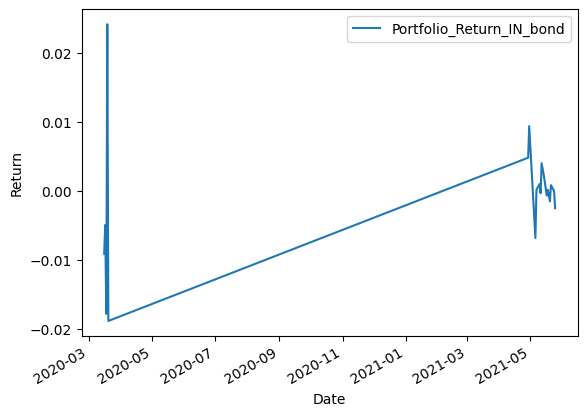

In [293]:
selected_returns_bond_in=case3_in.set_index('Date')
selected_returns_bond_in.plot()
plt.ylabel('Return')

In [294]:
case3_nsei=case3_nsei.set_index('Date')
case3_in=case3_in.set_index('Date')

In [295]:
case3_data_in_nsei = case3_nsei.join(case3_in, how='inner')
case3_data_in_nsei.head()

Portfolio_Return_nsei  Portfolio_Return_IN_bond
Date                                                       
2020-03-16              -0.076121                 -0.009098
2020-03-17              -0.025045                 -0.004924
2020-03-18              -0.055565                 -0.017785
2020-03-19              -0.024248                  0.024125
2020-03-20               0.058329                 -0.018812

Text(0, 0.5, 'Cumulative Return')

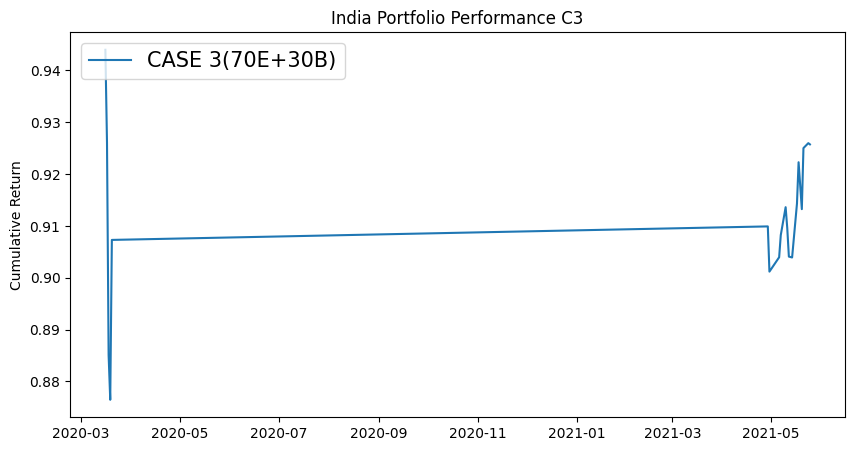

In [296]:
# India
weighted_return_c3_in = (wts_c3 * case3_data_in_nsei)

#Cumulative Portfolio india

portfolio_return_c3_in = weighted_return_c3_in.sum(axis=1)
cumprod_portfolio_c3_in = (1 + portfolio_return_c3_in).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c3_in, label='CASE 3(70E+30B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("India Portfolio Performance C3")
plt.ylabel('Cumulative Return')

#### CASE 4

In [297]:
case4_in=selected_returns_dataframe(filtered_dates4)
case4_in.head()

Date  Portfolio_Return_IN_bond
0 2020-03-23                  0.011897
1 2020-03-24                  0.012691

<Axes: ylabel='Frequency'>

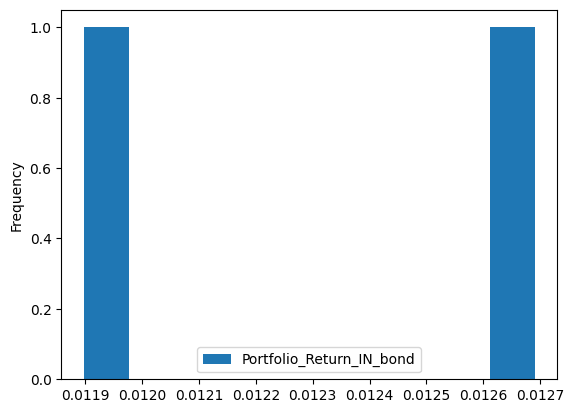

In [298]:
# Histogram of bond
case4_in.plot.hist()

Text(0, 0.5, 'Return')

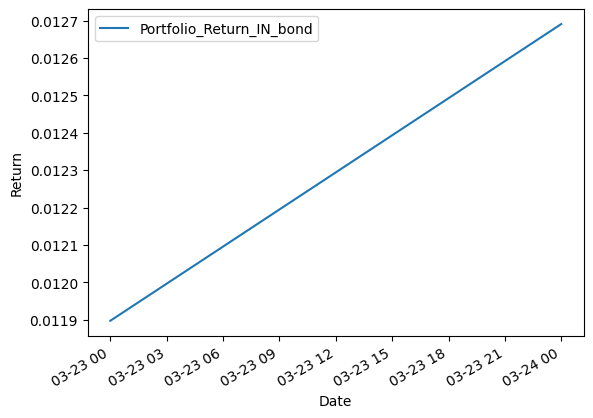

In [299]:
selected_returns_bond_in=case4_in.set_index('Date')
selected_returns_bond_in.plot()
plt.ylabel('Return')

In [300]:
case4_nsei=case4_nsei.set_index('Date')
case4_in=case4_in.set_index('Date')

In [301]:
case4_data_in_nsei = case4_nsei.join(case4_in, how='inner')
case4_data_in_nsei.head()

Portfolio_Return_nsei  Portfolio_Return_IN_bond
Date                                                       
2020-03-23              -0.129805                  0.011897
2020-03-24               0.025071                  0.012691

Text(0, 0.5, 'Cumulative Return')

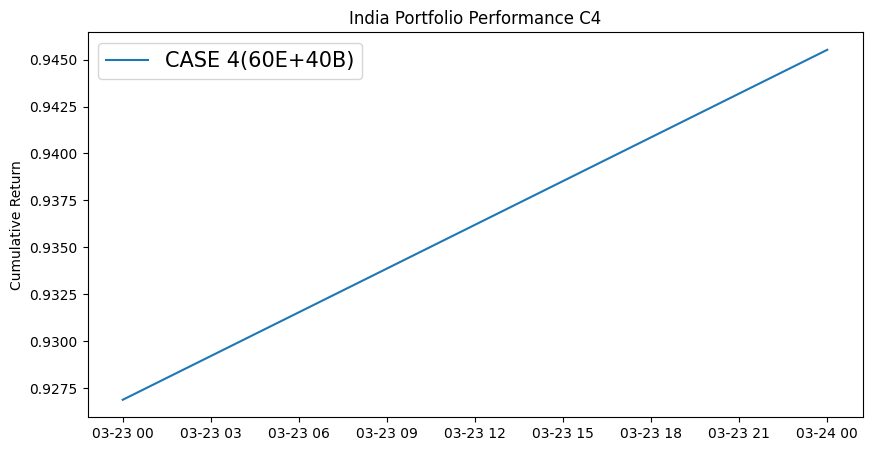

In [302]:
# India
weighted_return_c4_in = (wts_c4 * case4_data_in_nsei)

#Cumulative Portfolio india
portfolio_return_c4_in = weighted_return_c4_in.sum(axis=1)
cumprod_portfolio_c4_in = (1 + portfolio_return_c4_in).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c4_in, label='CASE 4(60E+40B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("India Portfolio Performance C4")
plt.ylabel('Cumulative Return')

#### CASE 5

In [303]:
case5_in=selected_returns_dataframe(filtered_dates5)
case5_in.head()

Date  Portfolio_Return_IN_bond
0 2020-03-26                  0.013184
1 2020-03-27                 -0.010469
2 2020-03-30                  0.011567
3 2020-03-31                 -0.026641
4 2020-04-03                 -0.016838

<Axes: ylabel='Frequency'>

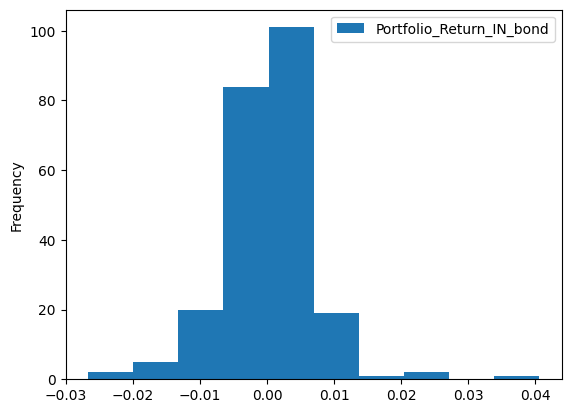

In [304]:
# Histogram of bond
case5_in.plot.hist()

Text(0, 0.5, 'Return')

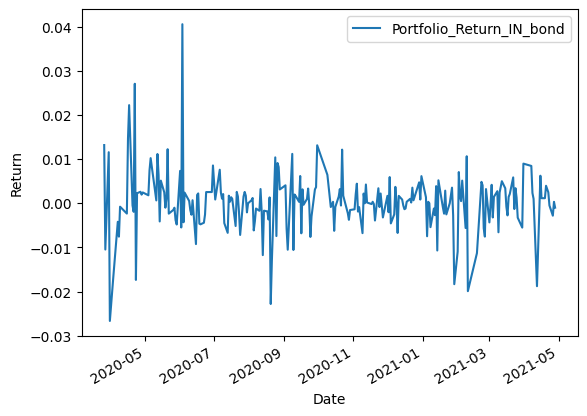

In [305]:
selected_returns_bond_in=case5_in.set_index('Date')
selected_returns_bond_in.plot()
plt.ylabel('Return')

In [306]:
case5_nsei=case5_nsei.set_index('Date')
case5_in=case5_in.set_index('Date')

In [307]:
case5_data_in_nsei = case5_nsei.join(case5_in, how='inner')
case5_data_in_nsei.head()

Portfolio_Return_nsei  Portfolio_Return_IN_bond
Date                                                       
2020-03-26               0.038904                  0.013184
2020-03-27               0.002176                 -0.010469
2020-03-30              -0.043781                  0.011567
2020-03-31               0.038238                 -0.026641
2020-04-03              -0.020597                 -0.016838

Text(0, 0.5, 'Cumulative Return')

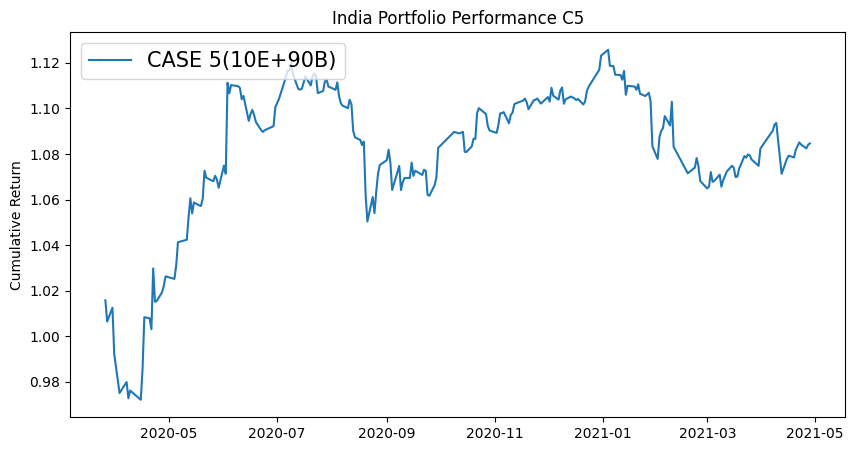

In [308]:
# India
weighted_return_c5_in = (wts_c5 * case5_data_in_nsei)

#Cumulative Portfolio india

portfolio_return_c5_in = weighted_return_c5_in.sum(axis=1)
cumprod_portfolio_c5_in = (1 + portfolio_return_c5_in).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c5_in, label='CASE 5(10E+90B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("India Portfolio Performance C5")
plt.ylabel('Cumulative Return')

**EQUITY**

In [309]:
drawdown(case1_data_in_nsei['Portfolio_Return_nsei']).min()

Wealth            957.939870
Previous Peak    1002.205158
Drawdown           -0.143928
dtype: float64

In [310]:
drawdown(case2_data_in_nsei['Portfolio_Return_nsei']).min()

Wealth            910.155246
Previous Peak    1001.106565
Drawdown           -0.206169
dtype: float64

In [311]:
drawdown(case3_data_in_nsei['Portfolio_Return_nsei']).min()

Wealth           830.063689
Previous Peak    923.878999
Drawdown          -0.101545
dtype: float64

In [312]:
drawdown(case4_data_in_nsei['Portfolio_Return_nsei']).min()

Wealth           870.195339
Previous Peak    870.195339
Drawdown           0.000000
dtype: float64

In [313]:
drawdown(case5_data_in_nsei['Portfolio_Return_nsei']).min()

Wealth            995.581791
Previous Peak    1038.904356
Drawdown           -0.085796
dtype: float64

**BOND**

In [314]:
drawdown(case1_data_in_nsei['Portfolio_Return_IN_bond']).min()

Wealth            926.035346
Previous Peak    1003.309635
Drawdown           -0.185690
dtype: float64

In [315]:
drawdown(case2_data_in_nsei['Portfolio_Return_IN_bond']).min()

Wealth            919.350124
Previous Peak    1003.797468
Drawdown           -0.238027
dtype: float64

In [316]:
drawdown(case3_data_in_nsei['Portfolio_Return_IN_bond']).min()

Wealth           968.486739
Previous Peak    990.901836
Drawdown          -0.022621
dtype: float64

In [317]:
drawdown(case4_data_in_nsei['Portfolio_Return_IN_bond']).min()

Wealth           1011.897208
Previous Peak    1011.897208
Drawdown            0.000000
dtype: float64

In [318]:
drawdown(case5_data_in_nsei['Portfolio_Return_IN_bond']).min()

Wealth            956.197194
Previous Peak    1013.183594
Drawdown           -0.084574
dtype: float64

In [319]:
a1_in=case1_data_in_nsei['Portfolio_Return_nsei'].sum()
a2_in=case2_data_in_nsei['Portfolio_Return_nsei'].sum()
a3_in=case3_data_in_nsei['Portfolio_Return_nsei'].sum()
a4_in=case4_data_in_nsei['Portfolio_Return_nsei'].sum()
a5_in=case5_data_in_nsei['Portfolio_Return_nsei'].sum()
a_in=(a1_in+a2_in+a3_in+a4_in+a5_in)

b1_in=case1_data_in_nsei['Portfolio_Return_IN_bond'].sum()
b2_in=case2_data_in_nsei['Portfolio_Return_IN_bond'].sum()
b3_in=case3_data_in_nsei['Portfolio_Return_IN_bond'].sum()
b4_in=case4_data_in_nsei['Portfolio_Return_IN_bond'].sum()
b5_in=case5_data_in_nsei['Portfolio_Return_IN_bond'].sum()
b_in=(b1_in+b2_in+b3_in+b4_in+b5_in)

c1_in=filt_case1_nsei['^NSEI'].sum()
c2_in=filt_case2_nsei['^NSEI'].sum()
c3_in=filt_case3_nsei['^NSEI'].sum()
c4_in=filt_case4_nsei['^NSEI'].sum()
c5_in=filt_case5_nsei['^NSEI'].sum()
c_in=(c1_in+c2_in+c3_in+c4_in+c5_in)

d_in=return_multiData['^NSEI'].sum()
final_in=a_in+b_in+c_in-d_in
final_in_usd=final_in*1000000
final_in_usd_per_change=((final_in_usd-1000000)/1000000)*100
final_in_usd_per_change

701.2344161308868

## FOR CHINA


In [320]:
filtered_dates1 = ann_vol_portfolio[((ann_vol_portfolio['^HSI'] < 15) & (ann_vol_portfolio['^HSI'].diff() <10))]['DateTime']
filtered_dates4  = ann_vol_portfolio[(((27 > ann_vol_portfolio['^HSI']) & (ann_vol_portfolio['^HSI'] >= 25)) | ((15 > ann_vol_portfolio['^HSI'].diff()) & (ann_vol_portfolio['^HSI'].diff() > 10)))]['DateTime']
filtered_dates3  = ann_vol_portfolio[(((25 > ann_vol_portfolio['^HSI']) & (ann_vol_portfolio['^HSI'] >= 20)) | ((30 > ann_vol_portfolio['^HSI'].diff()) & (ann_vol_portfolio['^HSI'].diff() > 20)))]['DateTime']
filtered_dates2  = ann_vol_portfolio[(((20 > ann_vol_portfolio['^HSI']) & (ann_vol_portfolio['^HSI'] >= 15)) | ((20 > ann_vol_portfolio['^HSI'].diff()) & (ann_vol_portfolio['^HSI'].diff() > 15)))]['DateTime']
filtered_dates5  = ann_vol_portfolio[((ann_vol_portfolio['^HSI']  >=  27) | (ann_vol_portfolio['^HSI'].diff() >25))]['DateTime']

In [321]:
# Dates fullfilling the condition
def selected_returns_dataframe(filtered_dates):
  selected_returns = []
  for date in filtered_dates:
    return_value = df_bond_return.loc[df_bond_return['Date'] == date, 'CHI_Price'].values
    if len(return_value) > 0:
        selected_returns.append((date, return_value[0]))

  selected_return=pd.DataFrame(selected_returns)
  selected_return.set_axis(['Date', 'Portfolio_Return_chi_bond'], axis=1, inplace=True)
  return selected_return

#### CASE 1

In [322]:
case1_chi=selected_returns_dataframe(filtered_dates1)
case1_chi.head()

Date  Portfolio_Return_chi_bond
0 2015-03-20                   0.006814
1 2015-03-23                   0.001137
2 2015-03-24                   0.002279
3 2015-03-25                  -0.006229
4 2015-03-26                  -0.008422

<Axes: ylabel='Frequency'>

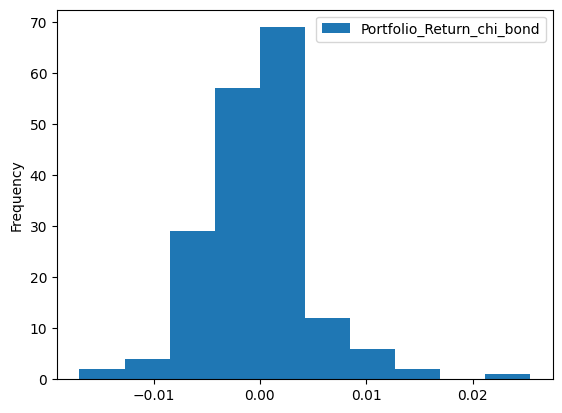

In [323]:
# Histogram of bond
case1_chi.plot.hist()

Text(0, 0.5, 'Return')

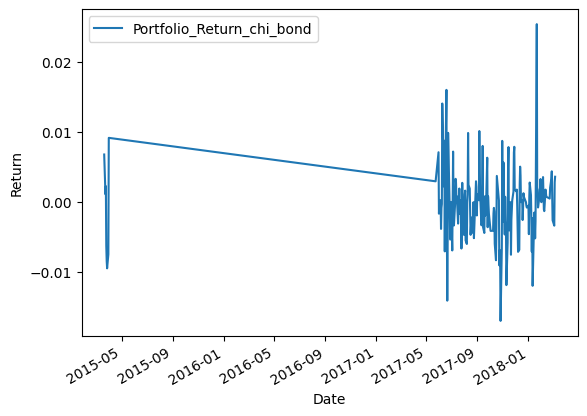

In [324]:
selected_returns_bond_chi=case1_chi.set_index('Date')
selected_returns_bond_chi.plot()
plt.ylabel('Return')

In [325]:
case1_hsi=case1_hsi.set_index('Date')
case1_chi=case1_chi.set_index('Date')

In [326]:
case1_data_chi_hsi = case1_hsi.join(case1_chi, how='inner')
case1_data_chi_hsi.head()

Portfolio_Return_hsi  Portfolio_Return_chi_bond
Date                                                       
2015-03-20             -0.003827                   0.006814
2015-03-23              0.004893                   0.001137
2015-03-24             -0.003875                   0.002279
2015-03-25              0.005272                  -0.006229
2015-03-26             -0.001270                  -0.008422

Text(0, 0.5, 'Cumulative Return')

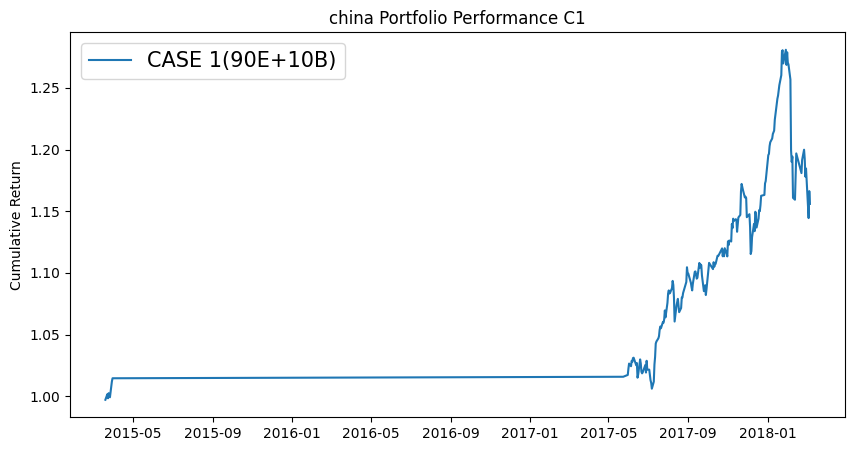

In [327]:
# chi
weighted_return_c1_chi = (wts_c1 * case1_data_chi_hsi)

#Cumulative Portfolio chi
portfolio_return_c1_chi = weighted_return_c1_chi.sum(axis=1)
cumprod_portfolio_c1_chi = (1 + portfolio_return_c1_chi).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c1_chi, label='CASE 1(90E+10B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("china Portfolio Performance C1")
plt.ylabel('Cumulative Return')

#### CASE 2

In [328]:
case2_chi=selected_returns_dataframe(filtered_dates2)
case2_chi.head()

Date  Portfolio_Return_chi_bond
0 2013-01-04                   0.005571
1 2013-01-07                  -0.002778
2 2013-01-08                   0.005587
3 2013-01-09                  -0.002786
4 2013-01-10                  -0.002778

<Axes: ylabel='Frequency'>

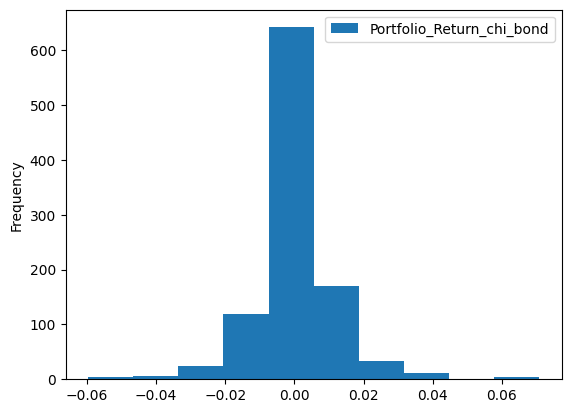

In [329]:
# Histogram of bond
case2_chi.plot.hist()

Text(0, 0.5, 'Return')

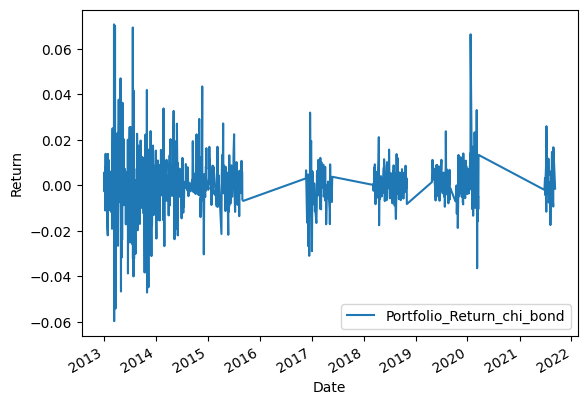

In [330]:
selected_returns_bond_chi=case2_chi.set_index('Date')
selected_returns_bond_chi.plot()
plt.ylabel('Return')

In [331]:
case2_hsi=case2_hsi.set_index('Date')
case2_chi=case2_chi.set_index('Date')

In [332]:
case2_data_chi_hsi = case2_hsi.join(case2_chi, how='inner')
case2_data_chi_hsi.head()

Portfolio_Return_hsi  Portfolio_Return_chi_bond
Date                                                       
2013-01-04             -0.002885                   0.005571
2013-01-07             -0.000057                  -0.002778
2013-01-08             -0.009368                   0.005587
2013-01-09              0.004642                  -0.002786
2013-01-10              0.005851                  -0.002778

Text(0, 0.5, 'Cumulative Return')

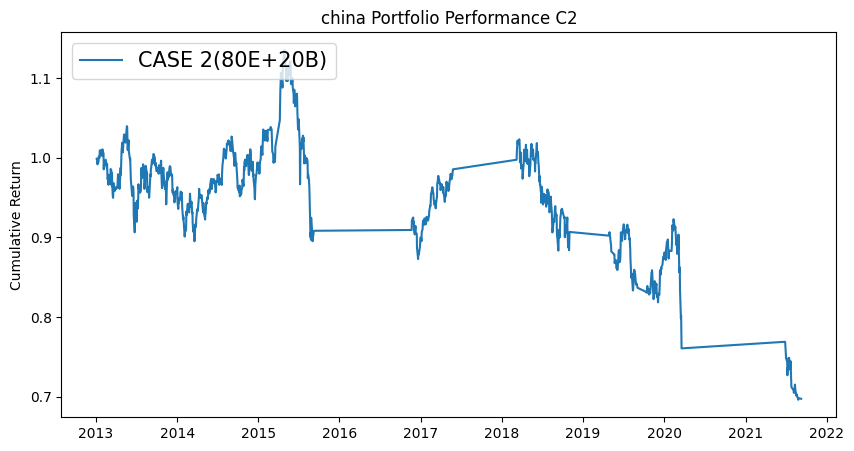

In [333]:
# china
weighted_return_c2_chi = (wts_c2 * case2_data_chi_hsi)

#Cumulative Portfolio chi
portfolio_return_c2_chi = weighted_return_c2_chi.sum(axis=1)
cumprod_portfolio_c2_chi = (1 + portfolio_return_c2_chi).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c2_chi, label='CASE 2(80E+20B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("china Portfolio Performance C2")
plt.ylabel('Cumulative Return')

#### CASE 3

In [334]:
case3_chi=selected_returns_dataframe(filtered_dates3)
case3_chi.head()

Date  Portfolio_Return_chi_bond
0 2015-09-09                   0.003851
1 2015-09-10                   0.000889
2 2015-09-11                   0.003570
3 2015-09-14                   0.000595
4 2015-09-15                   0.005388

<Axes: ylabel='Frequency'>

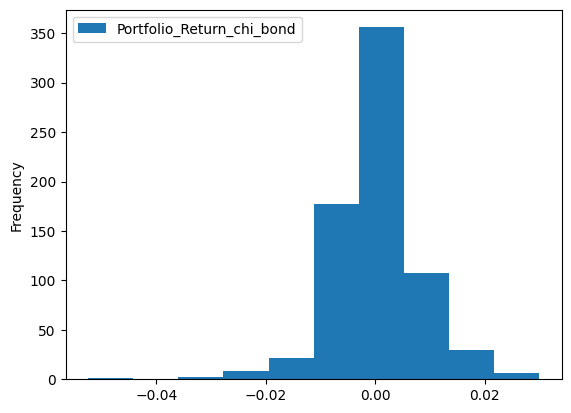

In [335]:
# Histogram of bond
case3_chi.plot.hist()

Text(0, 0.5, 'Return')

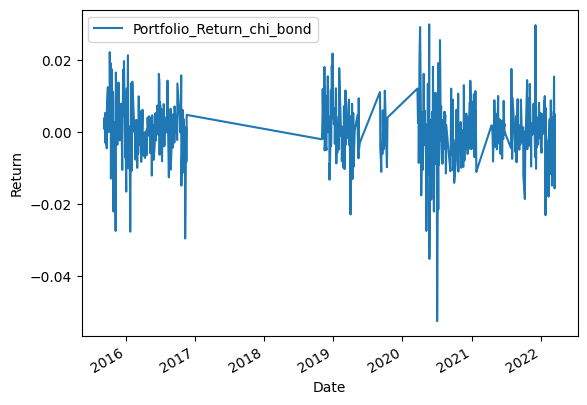

In [336]:
selected_returns_bond_chi=case3_chi.set_index('Date')
selected_returns_bond_chi.plot()
plt.ylabel('Return')

In [337]:
case3_hsi=case3_hsi.set_index('Date')
case3_chi=case3_chi.set_index('Date')

In [338]:
case3_data_chi_hsi = case3_hsi.join(case3_chi, how='inner')
case3_data_chi_hsi.head()

Portfolio_Return_hsi  Portfolio_Return_chi_bond
Date                                                       
2015-09-09              0.041031                   0.003851
2015-09-10             -0.025702                   0.000889
2015-09-11             -0.002696                   0.003570
2015-09-14              0.002675                   0.000595
2015-09-15             -0.004947                   0.005388

Text(0, 0.5, 'Cumulative Return')

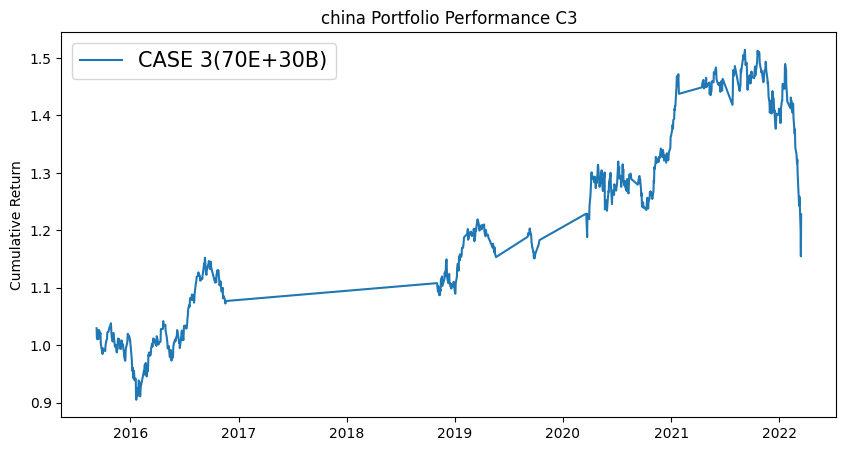

In [339]:
# china
weighted_return_c3_chi = (wts_c3 * case3_data_chi_hsi)

#Cumulative Portfolio chi

portfolio_return_c3_chi = weighted_return_c3_chi.sum(axis=1)
cumprod_portfolio_c3_chi = (1 + portfolio_return_c3_chi).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c3_chi, label='CASE 3(70E+30B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("china Portfolio Performance C3")
plt.ylabel('Cumulative Return')

#### CASE 4

In [340]:
case4_chi=selected_returns_dataframe(filtered_dates4)
case4_chi.head()

Date  Portfolio_Return_chi_bond
0 2020-08-20                  -0.000666
1 2020-08-21                   0.000666
2 2020-08-24                  -0.015410
3 2020-08-25                  -0.002942
4 2020-08-26                  -0.002608

<Axes: ylabel='Frequency'>

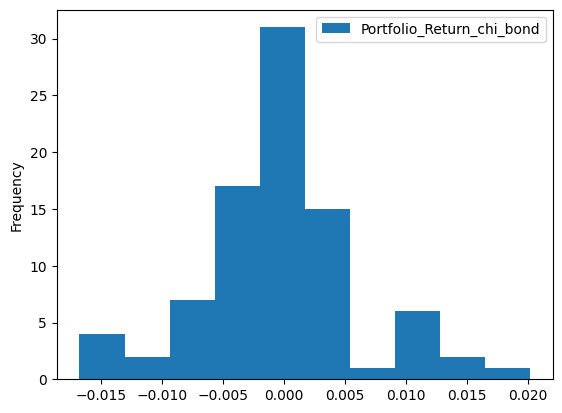

In [341]:
# Histogram of bond
case4_chi.plot.hist()

Text(0, 0.5, 'Return')

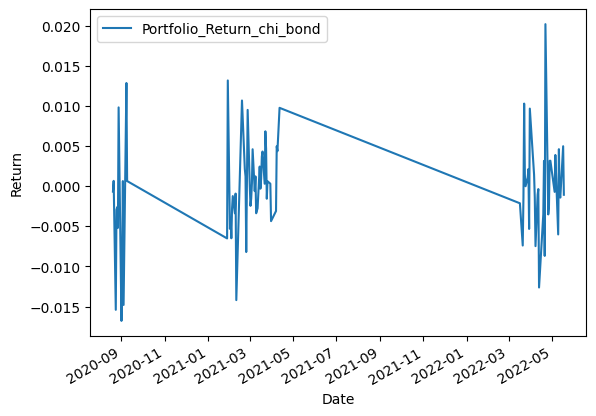

In [342]:
selected_returns_bond_chi=case4_chi.set_index('Date')
selected_returns_bond_chi.plot()
plt.ylabel('Return')

In [343]:
case4_hsi=case4_hsi.set_index('Date')
case4_chi=case4_chi.set_index('Date')

In [344]:
case4_data_chi_hsi = case4_hsi.join(case4_chi, how='inner')
case4_data_chi_hsi.head()

Portfolio_Return_hsi  Portfolio_Return_chi_bond
Date                                                       
2020-08-20             -0.015391                  -0.000666
2020-08-21              0.013006                   0.000666
2020-08-24              0.017430                  -0.015410
2020-08-25             -0.002558                  -0.002942
2020-08-26              0.000218                  -0.002608

Text(0, 0.5, 'Cumulative Return')

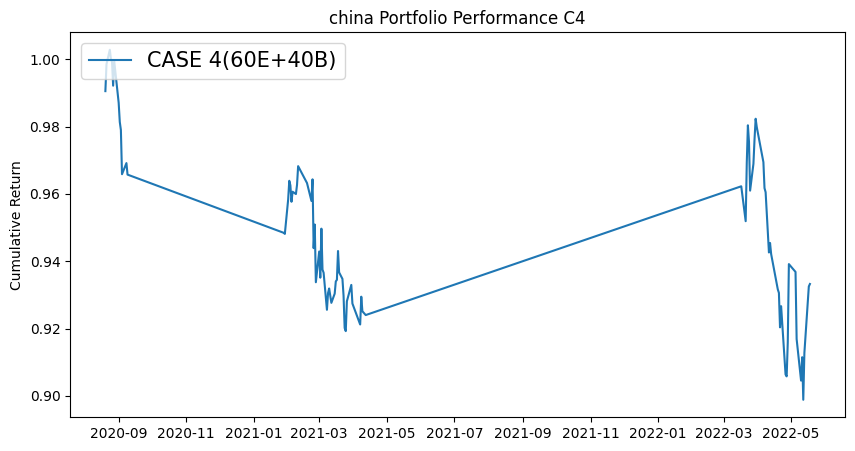

In [345]:
# china
weighted_return_c4_chi = (wts_c4 * case4_data_chi_hsi)

#Cumulative Portfolio chi
portfolio_return_c4_chi = weighted_return_c4_chi.sum(axis=1)
cumprod_portfolio_c4_chi = (1 + portfolio_return_c4_chi).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c4_chi, label='CASE 4(60E+40B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("china Portfolio Performance C4")
plt.ylabel('Cumulative Return')

#### CASE 5

In [346]:
case5_chi=selected_returns_dataframe(filtered_dates5)
case5_chi.head()

Date  Portfolio_Return_chi_bond
0 2022-05-19                  -0.003898
1 2022-05-20                   0.006061
2 2022-05-23                   0.001428
3 2022-05-24                   0.006830
4 2022-05-25                   0.012741

<Axes: ylabel='Frequency'>

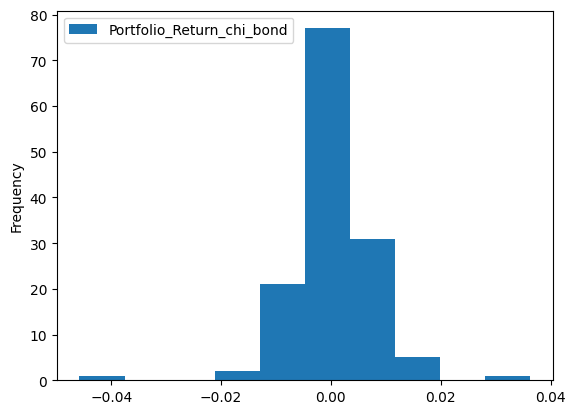

In [347]:
# Histogram of bond
case5_chi.plot.hist()

Text(0, 0.5, 'Return')

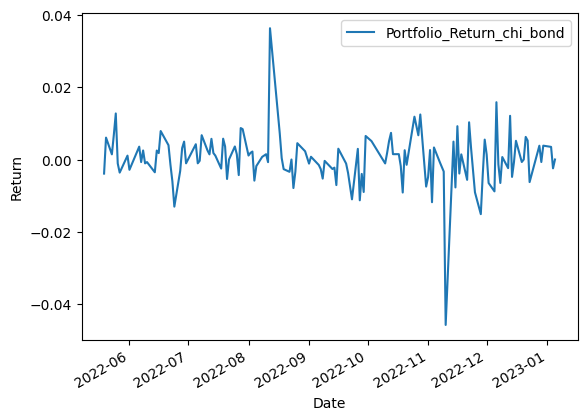

In [348]:
selected_returns_bond_chi=case5_chi.set_index('Date')
selected_returns_bond_chi.plot()
plt.ylabel('Return')

In [349]:
case5_hsi=case5_hsi.set_index('Date')
case5_chi=case5_chi.set_index('Date')

In [350]:
case5_data_chi_hsi = case5_hsi.join(case5_chi, how='inner')
case5_data_chi_hsi.head()

Portfolio_Return_hsi  Portfolio_Return_chi_bond
Date                                                       
2022-05-19             -0.025363                  -0.003898
2022-05-20              0.029649                   0.006061
2022-05-23             -0.011931                   0.001428
2022-05-24             -0.017487                   0.006830
2022-05-25              0.002942                   0.012741

Text(0, 0.5, 'Cumulative Return')

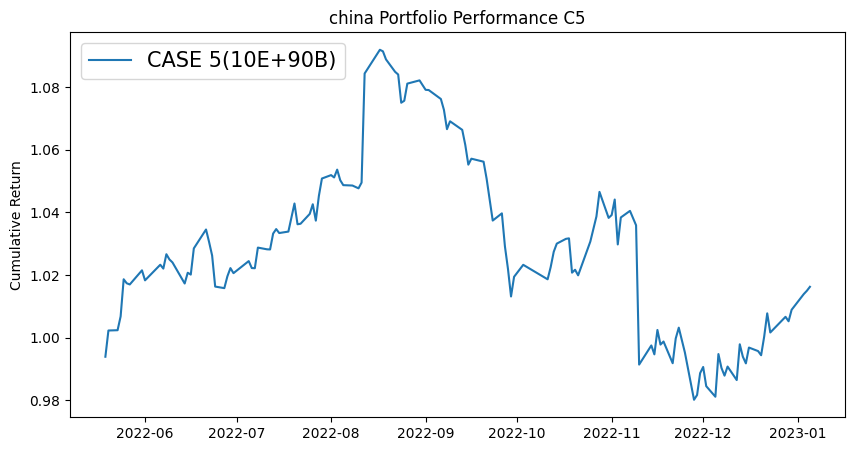

In [351]:
# china
weighted_return_c5_chi = (wts_c5 * case5_data_chi_hsi)

#Cumulative Portfolio china
portfolio_return_c5_chi = weighted_return_c5_chi.sum(axis=1)
cumprod_portfolio_c5_chi = (1 + portfolio_return_c5_chi).cumprod()

#Plotting the solution portfolio's returns
plt.figure(figsize=(10, 5))
plt.plot(cumprod_portfolio_c5_chi, label='CASE 5(10E+90B)')
plt.legend(loc='upper left', fontsize=15)
plt.title("china Portfolio Performance C5")
plt.ylabel('Cumulative Return')

**EQUITY**

In [352]:
drawdown(case1_data_chi_hsi['Portfolio_Return_hsi']).min()

Wealth           996.172675
Previous Peak    996.172675
Drawdown          -0.119870
dtype: float64

In [353]:
drawdown(case2_data_chi_hsi['Portfolio_Return_hsi']).min()

Wealth           584.939175
Previous Peak    997.114795
Drawdown          -0.485923
dtype: float64

In [354]:
drawdown(case3_data_chi_hsi['Portfolio_Return_hsi']).min()

Wealth            803.972373
Previous Peak    1041.030617
Drawdown           -0.330288
dtype: float64

In [355]:
drawdown(case4_data_chi_hsi['Portfolio_Return_hsi']).min()

Wealth           851.015016
Previous Peak    984.609360
Drawdown          -0.161397
dtype: float64

In [356]:
drawdown(case5_data_chi_hsi['Portfolio_Return_hsi']).min()

Wealth           744.164189
Previous Peak    974.637060
Drawdown          -0.314744
dtype: float64

**BOND**

In [357]:
drawdown(case1_data_chi_hsi['Portfolio_Return_chi_bond']).min()

Wealth            879.903384
Previous Peak    1006.814310
Drawdown           -0.144514
dtype: float64

In [358]:
drawdown(case2_data_chi_hsi['Portfolio_Return_chi_bond']).min()

Wealth            754.648085
Previous Peak    1005.571031
Drawdown           -0.329253
dtype: float64

In [359]:
drawdown(case3_data_chi_hsi['Portfolio_Return_chi_bond']).min()

Wealth           1003.850711
Previous Peak    1003.850711
Drawdown           -0.216480
dtype: float64

In [360]:
drawdown(case4_data_chi_hsi['Portfolio_Return_chi_bond']).min()

Wealth           926.063766
Previous Peak    999.334443
Drawdown          -0.073936
dtype: float64

In [361]:
drawdown(case5_data_chi_hsi['Portfolio_Return_chi_bond']).min()

Wealth           986.128217
Previous Peak    996.102055
Drawdown          -0.106969
dtype: float64

In [362]:
a1_chi=case1_data_chi_hsi['Portfolio_Return_hsi'].sum()
a2_chi=case2_data_chi_hsi['Portfolio_Return_hsi'].sum()
a3_chi=case3_data_chi_hsi['Portfolio_Return_hsi'].sum()
a4_chi=case4_data_chi_hsi['Portfolio_Return_hsi'].sum()
a5_chi=case5_data_chi_hsi['Portfolio_Return_hsi'].sum()
a_chi=(a1_chi+a2_chi+a3_chi+a4_chi+a5_chi)

b1_chi=case1_data_chi_hsi['Portfolio_Return_chi_bond'].sum()
b2_chi=case2_data_chi_hsi['Portfolio_Return_chi_bond'].sum()
b3_chi=case3_data_chi_hsi['Portfolio_Return_chi_bond'].sum()
b4_chi=case4_data_chi_hsi['Portfolio_Return_chi_bond'].sum()
b5_chi=case5_data_chi_hsi['Portfolio_Return_chi_bond'].sum()
b_chi=(b1_chi+b2_chi+b3_chi+b4_chi+b5_chi)

c1_chi=filt_case1_hsi['^HSI'].sum()
c2_chi=filt_case2_hsi['^HSI'].sum()
c3_chi=filt_case3_hsi['^HSI'].sum()
c4_chi=filt_case4_hsi['^HSI'].sum()
c5_chi=filt_case5_hsi['^HSI'].sum()
c_chi=(c1_chi+c2_chi+c3_chi+c4_chi+c5_chi)

d_chi=return_multiData['^HSI'].sum()
final_chi=a_chi+b_chi+c_chi-d_chi
final_chi_usd=final_chi*1000000
final_chi_usd_per_change=((final_chi_usd-1000000)/1000000)*100
final_chi_usd_per_change

144.09711313419874

Returns of an investments of $1000000 from different markets

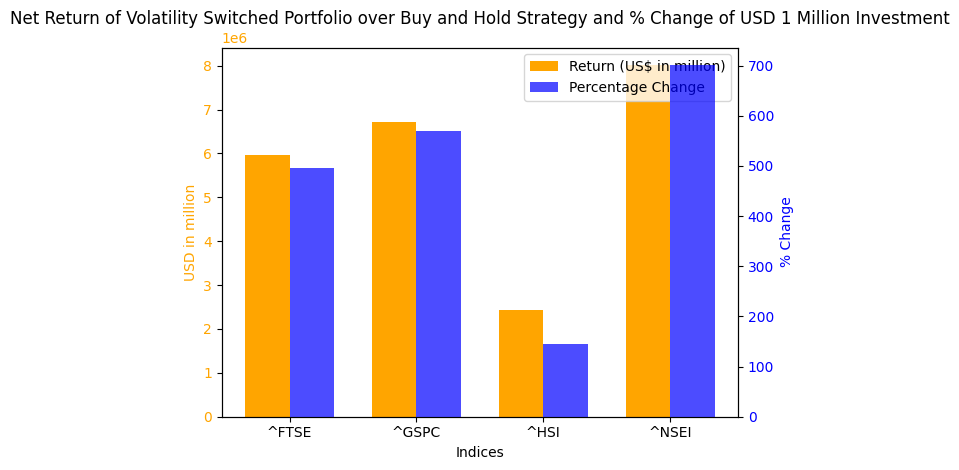

In [363]:
import matplotlib.pyplot as plt
import numpy as np
data = {
    'Indices': ['^FTSE', '^GSPC', '^HSI', '^NSEI'],
    'USD_Value': [final_uk_usd, final_us_usd, final_chi_usd, final_in_usd],
    'Percentage_change':[final_uk_usd_per_change,final_us_usd_per_change,final_chi_usd_per_change,final_in_usd_per_change]
}

df=pd.DataFrame(data)
# Calculate the width of each bar
bar_width = 0.35

# Create a figure and primary y-axis (left)
fig, ax1 = plt.subplots()

# Create an array of x positions for the bars
x = np.arange(len(df['Indices']))

# Plot the first bar graph on the primary y-axis
ax1.bar(x - bar_width/2, df['USD_Value'], bar_width, color='orange', label='Return (US$ in million)')
ax1.set_xlabel('Indices')
ax1.set_ylabel('USD in million', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Create a secondary y-axis (right)
ax2 = ax1.twinx()

# Plot the second bar graph on the secondary y-axis
ax2.bar(x + bar_width/2, df['Percentage_change'], bar_width, color='blue', label='Percentage Change', alpha=0.7)
ax2.set_ylabel('% Change', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Adjust x-axis positions and labels
ax1.set_xticks(x)
ax1.set_xticklabels(df['Indices'])

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2

# Display a single legend for both bar graphs
ax1.legend(lines, labels, loc='upper right')

plt.title('Net Return of Volatility Switched Portfolio over Buy and Hold Strategy and % Change of USD 1 Million Investment')
plt.tight_layout()
plt.show()


### APPENDIX: COVID-19 ANALYSIS SUMMARY




Cumulative returns during Pandemic year of 2020



**Equity**

In [364]:
Tickers_P = [ '^FTSE', '^GSPC', '^HSI','^NSEI','GLD']
Start_Date1 = "2020-01-01"
End_Date1 = "2020-12-31"

In [365]:
CovidData = GetAdjCloseQuotes(Tickers_P, Start_Date1, End_Date1)
CovidData.head()

^FTSE        ^GSPC          ^HSI         ^NSEI         GLD
DateTime                                                                    
2020-01-02  7604.299805  3257.850098  28543.519531  12282.200195  143.949997
2020-01-03  7622.399902  3234.850098  28451.500000  12226.650391  145.860001
2020-01-06  7575.299805  3246.280029  28226.189453  11993.049805  147.389999
2020-01-07  7573.899902  3237.179932  28322.060547  12052.950195  147.970001
2020-01-08  7574.899902  3253.050049  28087.919922  12025.349609  146.860001

In [366]:
# Calculating daily returns
return_CovidData = CovidData.pct_change().dropna()
return_CovidData

^FTSE     ^GSPC      ^HSI     ^NSEI       GLD
DateTime                                                    
2020-01-03  0.002380 -0.007060 -0.003224 -0.004523  0.013269
2020-01-06 -0.006179  0.003533 -0.007919 -0.019106  0.010489
2020-01-07 -0.000185 -0.002803  0.003397  0.004995  0.003935
2020-01-08  0.000132  0.004902 -0.008267 -0.002290 -0.007502
2020-01-09  0.003063  0.006655  0.016843  0.015846 -0.005652
...              ...       ...       ...       ...       ...
2020-12-22  0.000000 -0.002073 -0.007125  0.010346 -0.007903
2020-12-23  0.012390  0.000746  0.008570  0.010010  0.006648
2020-12-24  0.000970  0.003537  0.001650  0.010893  0.003985
2020-12-29  0.015472  0.006476  0.006895  0.013335  0.000000
2020-12-30 -0.007103  0.001342  0.021778  0.003542  0.007655

[230 rows x 5 columns]

In [367]:
# Cumulative return
cumprod_return_CovidData = (1 + return_CovidData).cumprod()
cumprod_return_CovidData.head()

^FTSE     ^GSPC      ^HSI     ^NSEI       GLD
DateTime                                                    
2020-01-03  1.002380  0.992940  0.996776  0.995477  1.013269
2020-01-06  0.996186  0.996449  0.988883  0.976458  1.023897
2020-01-07  0.996002  0.993655  0.992241  0.981335  1.027926
2020-01-08  0.996134  0.998527  0.984038  0.979088  1.020215
2020-01-09  0.999185  1.005172  1.000612  0.994602  1.014449

Text(0.5, 1.0, 'Cumulative Returns of Equity During Covid')

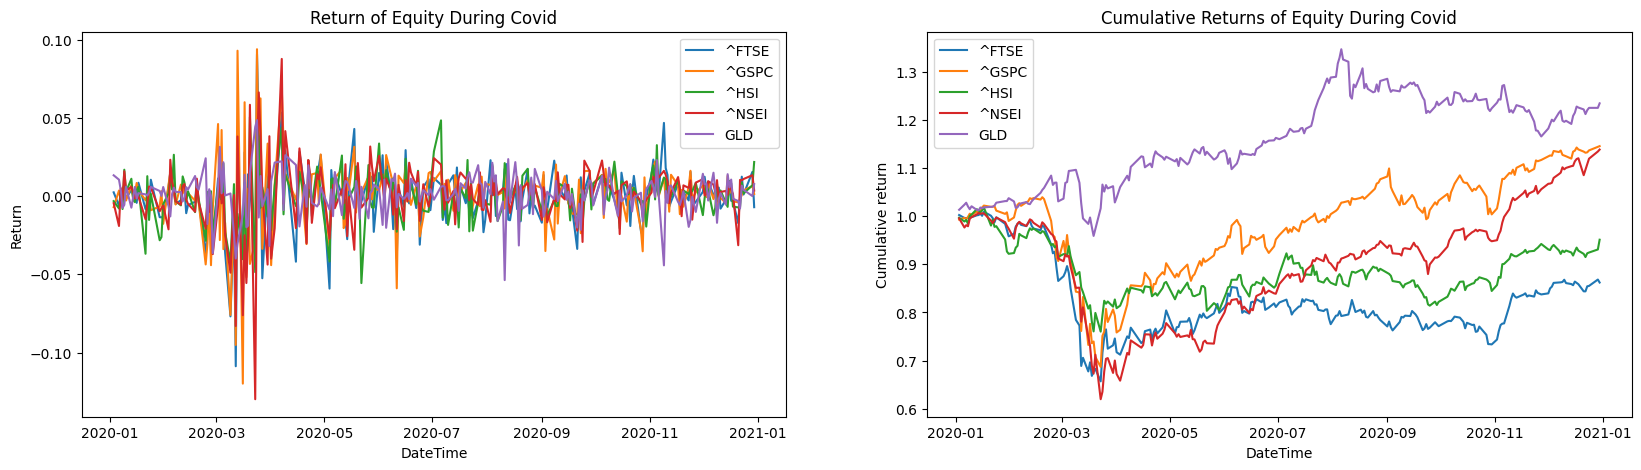

In [368]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))

sns.lineplot(data=return_CovidData, dashes=False, ax=axes[0])
axes[0].set_ylabel('Return')
axes[0].set_title('Return of Equity During Covid')


sns.lineplot(data=cumprod_return_CovidData, dashes=False, ax=axes[1])
axes[1].set_ylabel('Cumulative return')
axes[1].set_title('Cumulative Returns of Equity During Covid')


**Bond**

In [369]:
bond_CovidData=df_bond.loc[Start_Date1:End_Date1]
bond_CovidData.head()

US_Price  IN_Price  UK_Price  CHI_Price
Date                                               
2020-12-31     0.916     5.894     0.196      3.203
2020-12-30     0.926     5.899     0.211      3.192
2020-12-29     0.940     5.927     0.213      3.205
2020-12-28     0.923     5.925     0.253      3.213
2020-12-24     0.926     5.929     0.257      3.259

In [370]:
# Return
bond_return_CovidData=bond_CovidData.pct_change().dropna()
bond_return_CovidData.head()

US_Price  IN_Price  UK_Price  CHI_Price
Date                                               
2020-12-30  0.010917  0.000848  0.076531  -0.003434
2020-12-29  0.015119  0.004747  0.009479   0.004073
2020-12-28 -0.018085 -0.000337  0.187793   0.002496
2020-12-24  0.003250  0.000675  0.015810   0.014317
2020-12-23  0.020518  0.003542  0.108949  -0.004603

In [371]:
# Cumulative Return
cumprod_cum_return_CovidData=(1+bond_return_CovidData).cumprod()
cumprod_cum_return_CovidData.head()

US_Price  IN_Price  UK_Price  CHI_Price
Date                                               
2020-12-30  1.010917  1.000848  1.076531   0.996566
2020-12-29  1.026201  1.005599  1.086735   1.000624
2020-12-28  1.007642  1.005260  1.290816   1.003122
2020-12-24  1.010917  1.005938  1.311224   1.017484
2020-12-23  1.031659  1.009501  1.454082   1.012800

Text(0.5, 1.0, 'Cumulative Returns of Bond During Covid')

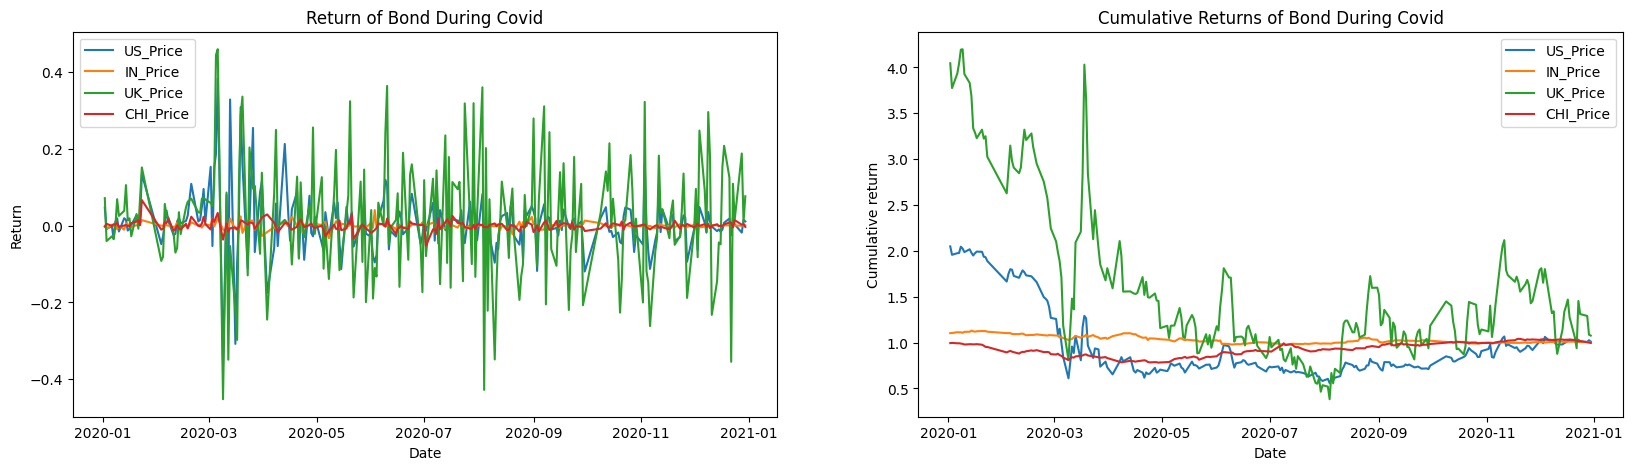

In [372]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))

sns.lineplot(data=bond_return_CovidData, dashes=False, ax=axes[0])
axes[0].set_ylabel('Return')
axes[0].set_title('Return of Bond During Covid')


sns.lineplot(data=cumprod_cum_return_CovidData, dashes=False, ax=axes[1])
axes[1].set_ylabel('Cumulative return')
axes[1].set_title('Cumulative Returns of Bond During Covid')